In [1]:
import pandas as pd
import numpy as np
import sklearn as skl

In [2]:
df=pd.read_csv('survival.csv',header=0)
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [4]:
# Dropping irrelevant columns
df.drop(['encounter_id','patient_id','hospital_id','Unnamed: 83'],inplace=True,axis=1)

In [5]:
df=df.fillna(df.median()) #Mean imputation for numeric features

C:\Users\SUGAM\AppData\Local\Temp/ipykernel_21936/4186921608.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.median()) #Mean imputation for numeric features


In [6]:
df = df.fillna(df.mode().iloc[0]) # Mode imputation for categorical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            91713 non-null  float64
 1   bmi                            91713 non-null  float64
 2   elective_surgery               91713 non-null  int64  
 3   ethnicity                      91713 non-null  object 
 4   gender                         91713 non-null  object 
 5   height                         91713 non-null  float64
 6   icu_admit_source               91713 non-null  object 
 7   icu_id                         91713 non-null  int64  
 8   icu_stay_type                  91713 non-null  object 
 9   icu_type                       91713 non-null  object 
 10  pre_icu_los_days               91713 non-null  float64
 11  weight                         91713 non-null  float64
 12  apache_2_diagnosis             91713 non-null 

In [7]:
df.describe()

,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,...,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,62.433548,29.128570,0.183736,169.648256,508.357692,0.835766,83.917765,184.252789,556.425298,0.201106,...,0.041879,0.000850,0.015570,0.223436,0.012888,0.025961,0.007011,0.004100,0.020477,0.086302
std,16.393595,8.124165,0.387271,10.716719,228.989661,2.487756,24.645926,85.686007,460.764423,0.400829,...,0.207821,0.029151,0.123806,0.416551,0.112792,0.159021,0.083438,0.063898,0.141626,0.280811
min,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,23.787760,0.000000,162.560000,369.000000,0.035417,67.300000,113.000000,203.010000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,122.000000,409.020000,0.000000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,32.653061,0.000000,177.800000,679.000000,0.409028,96.300000,301.000000,703.030000,0.000000,...,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,308.000000,2201.050000,1.000000,...,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


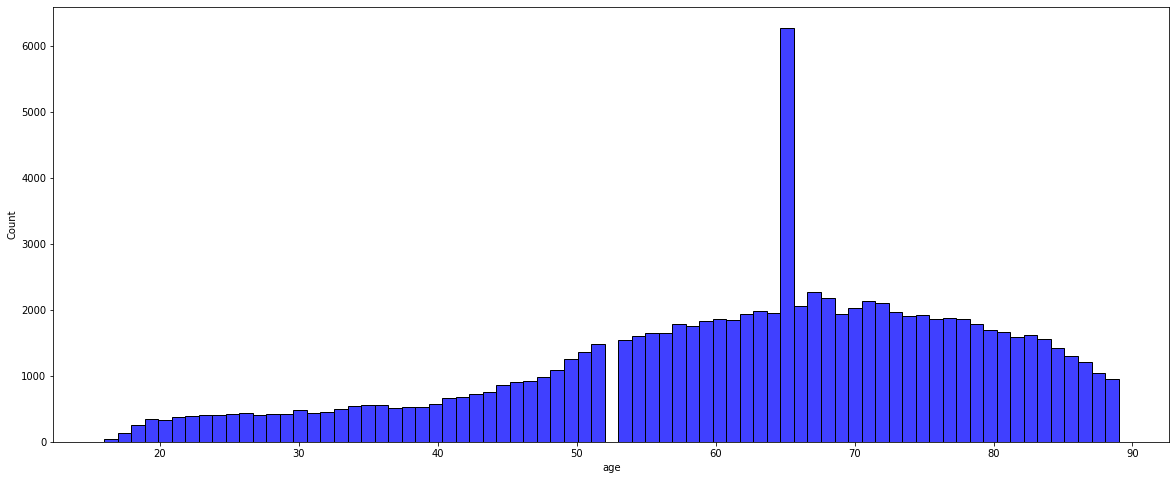

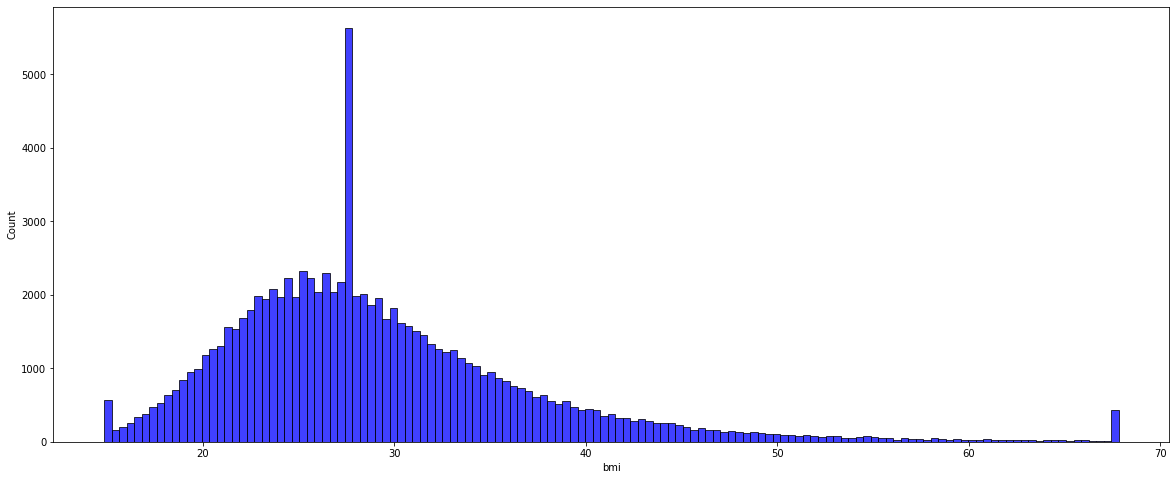

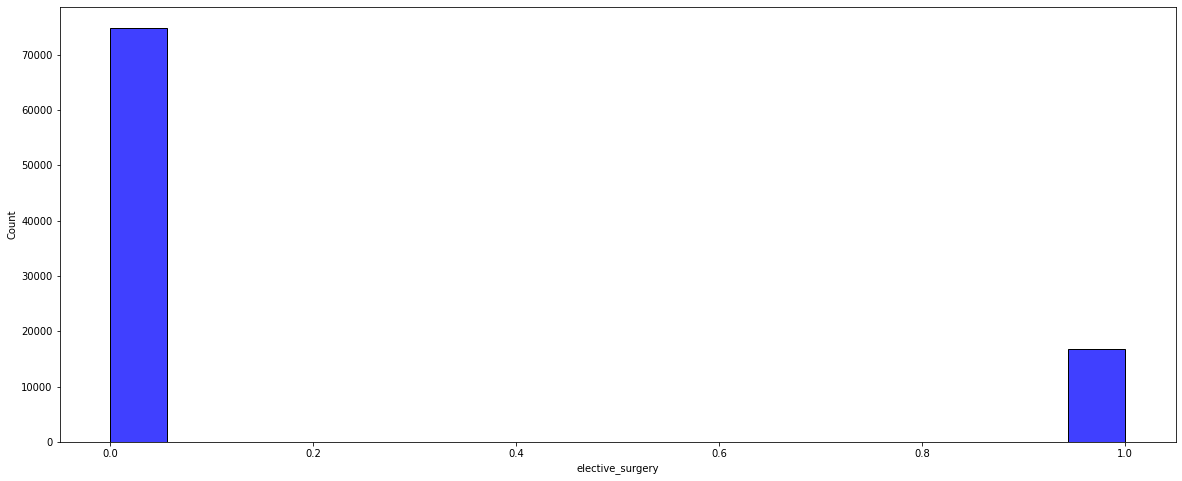

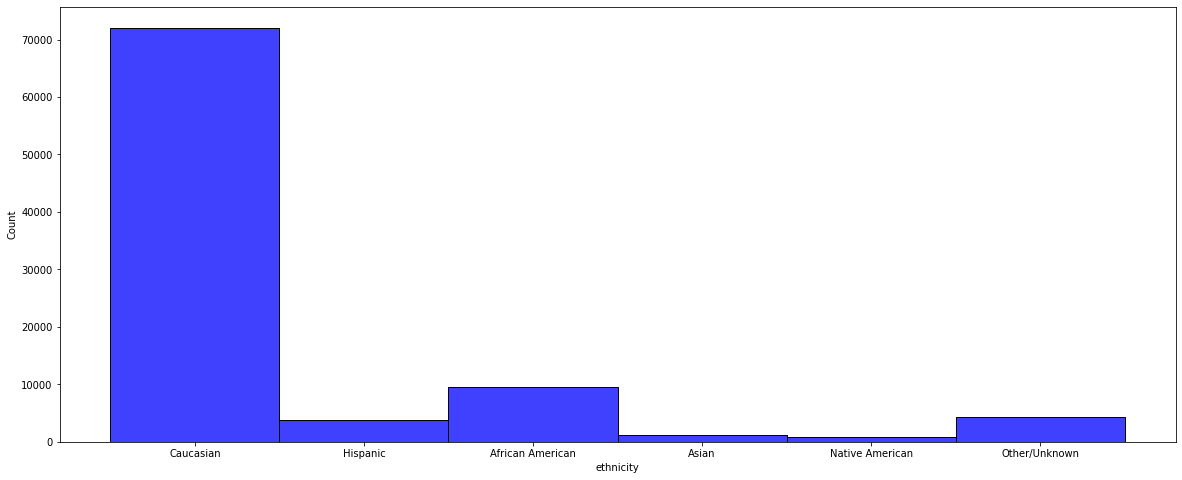

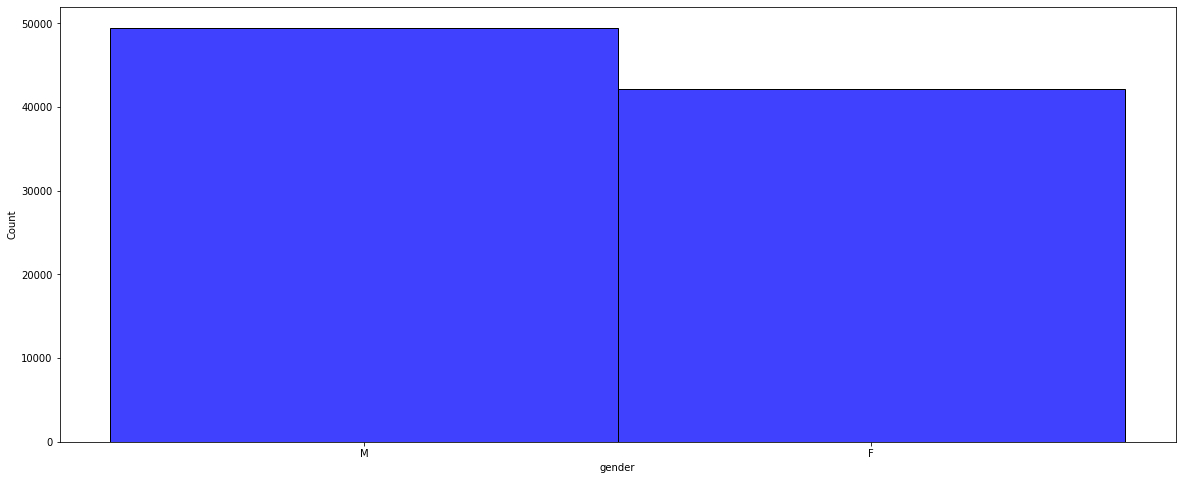

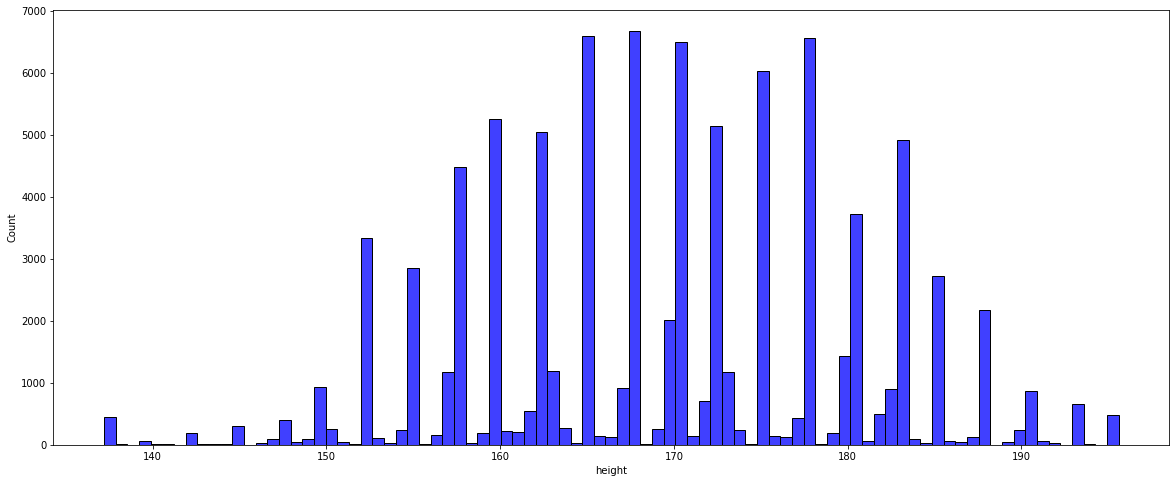

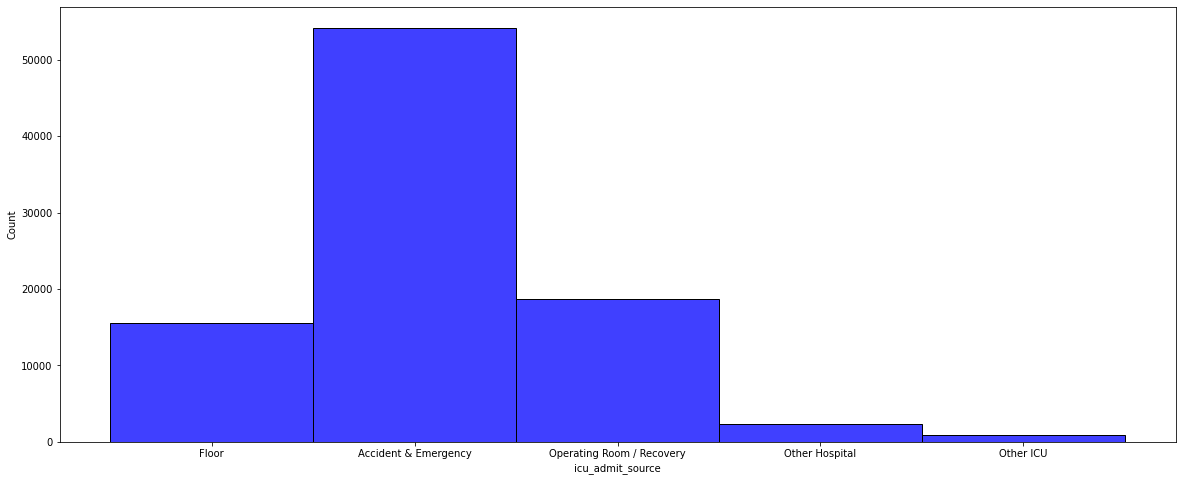

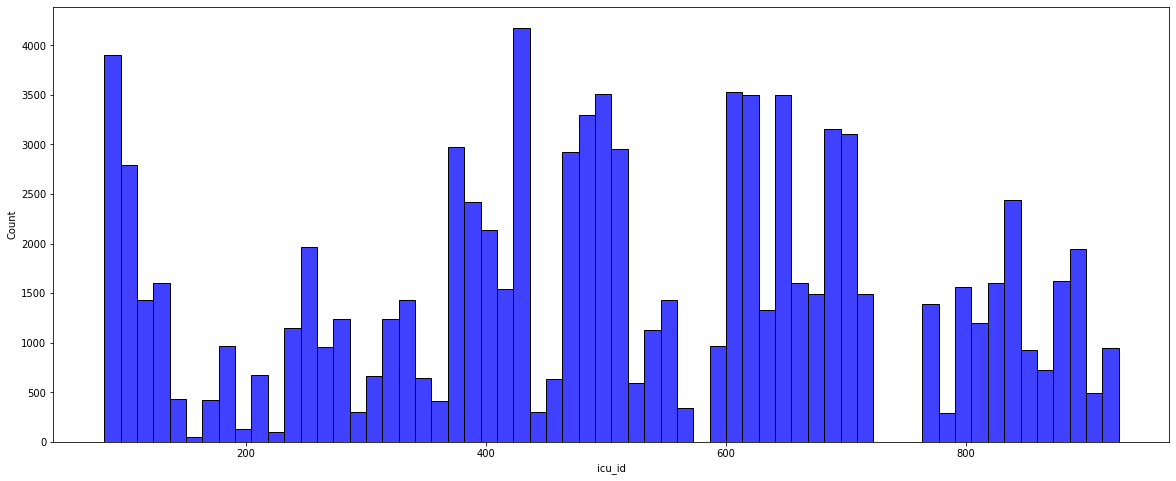

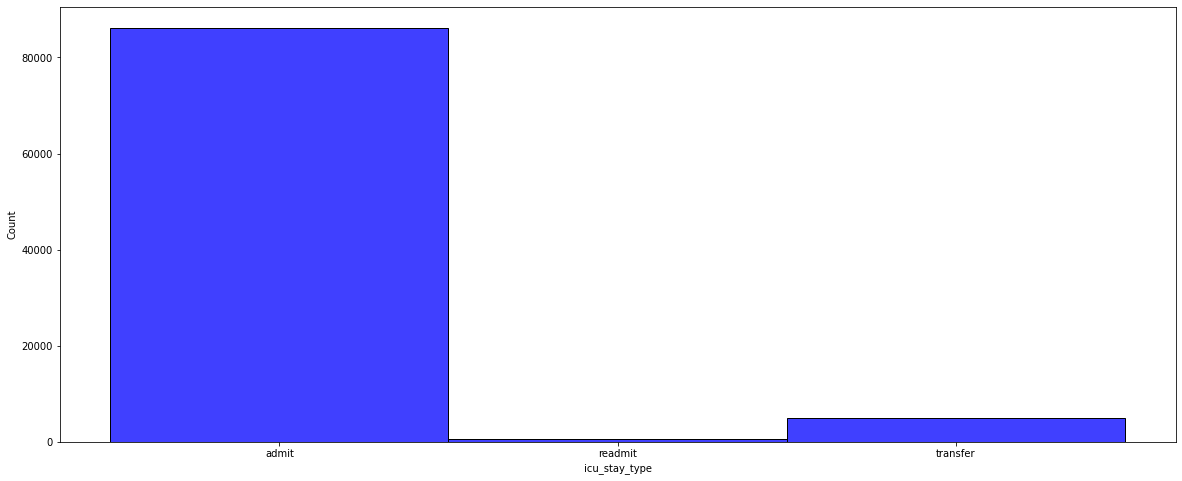

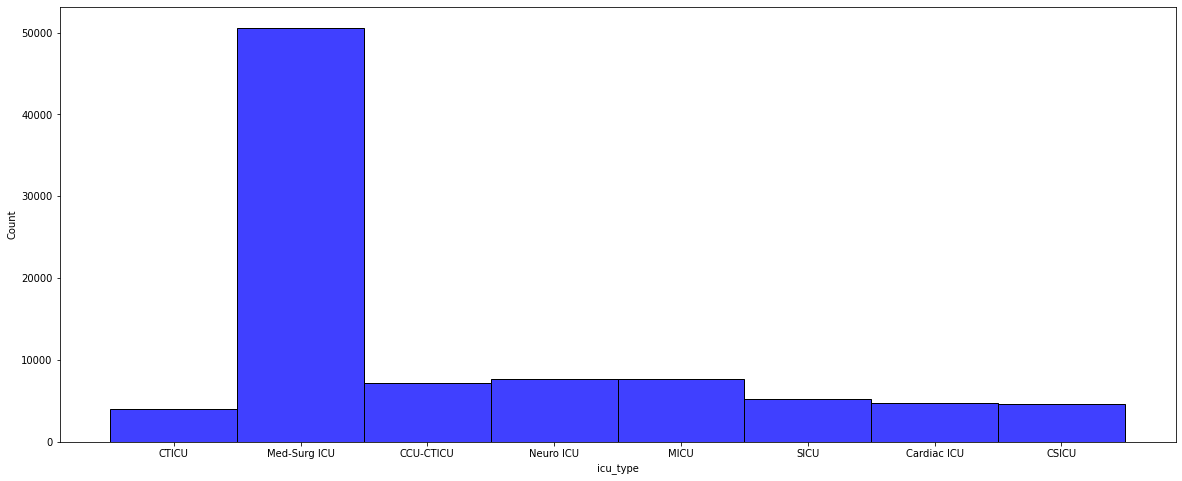

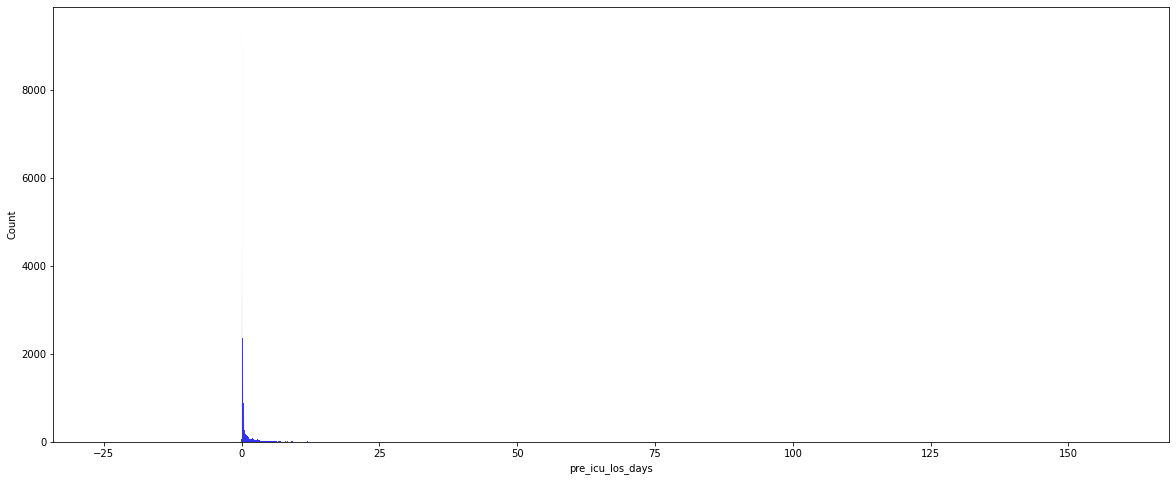

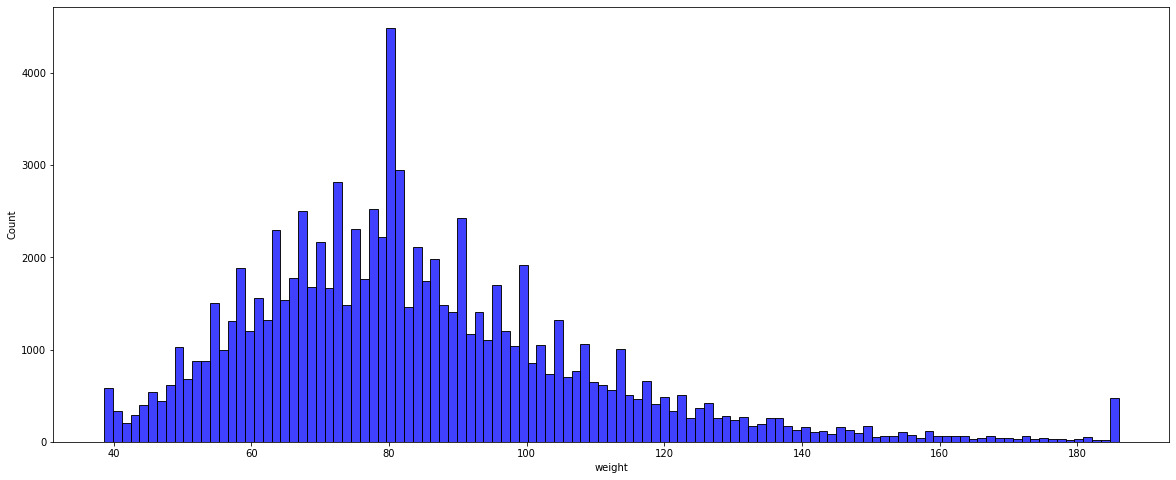

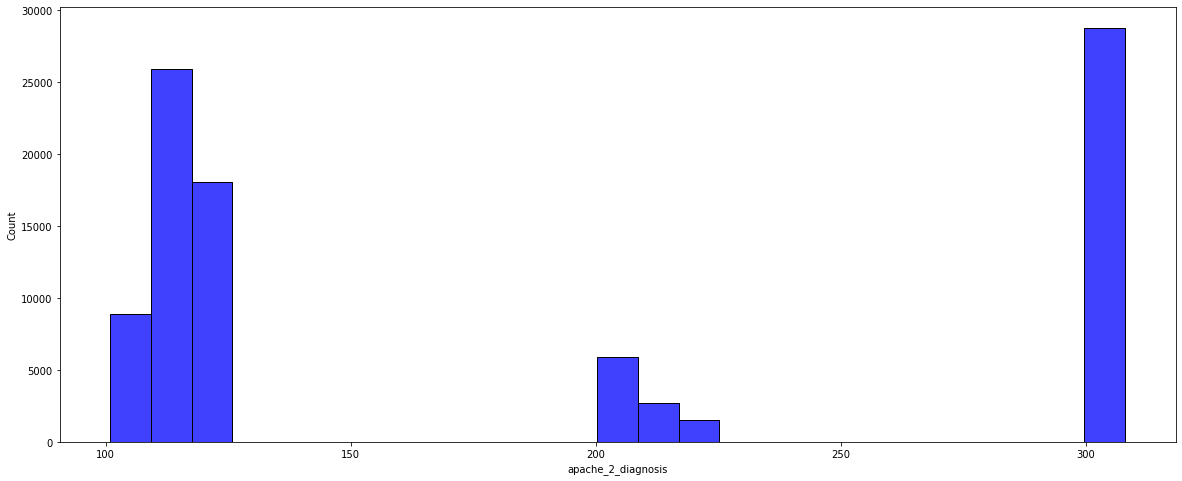

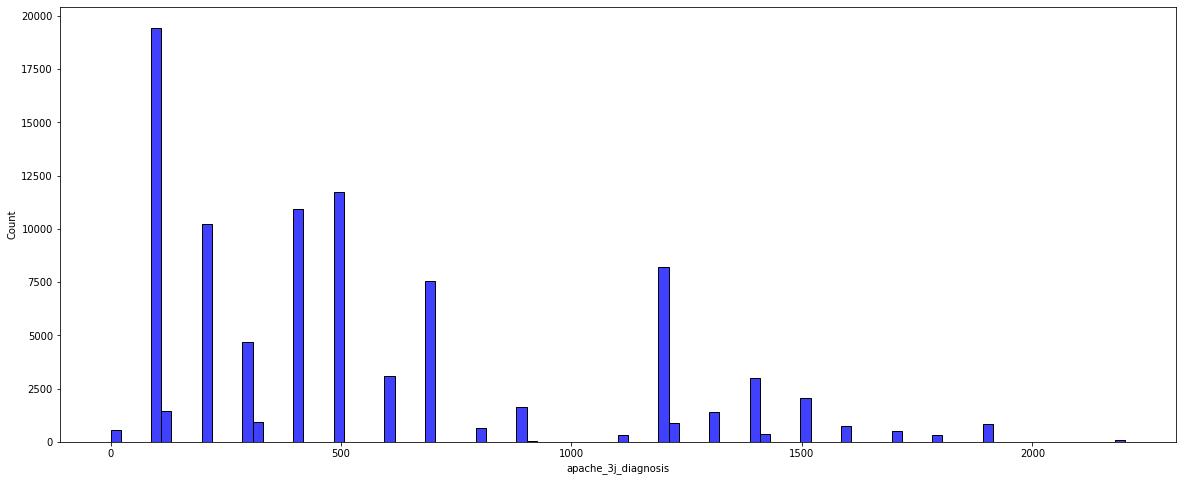

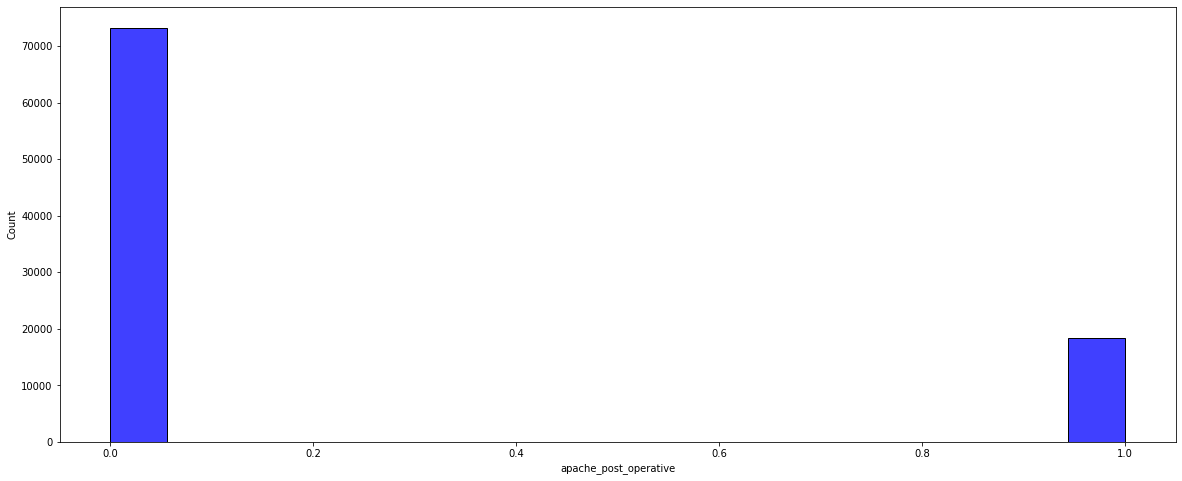

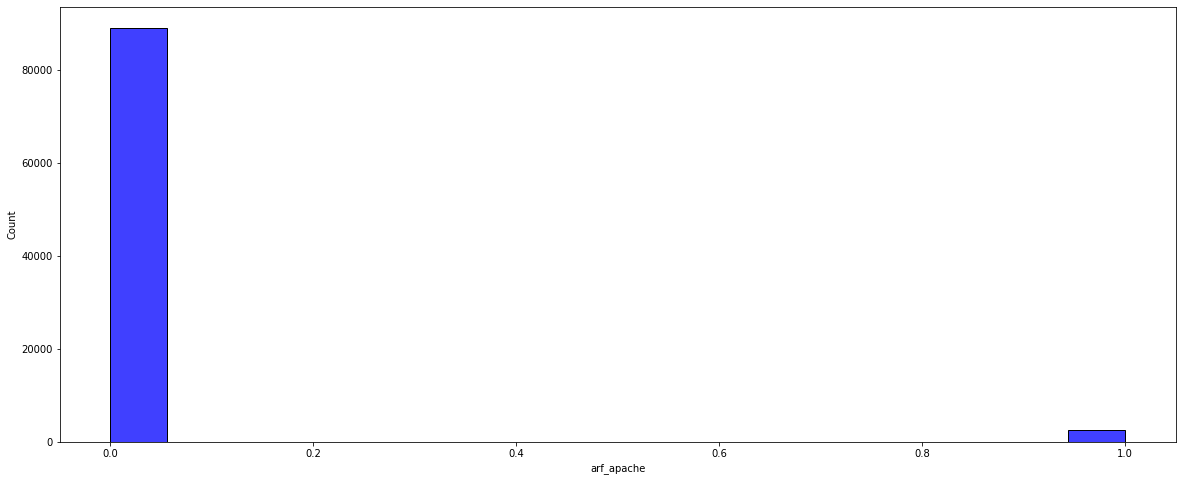

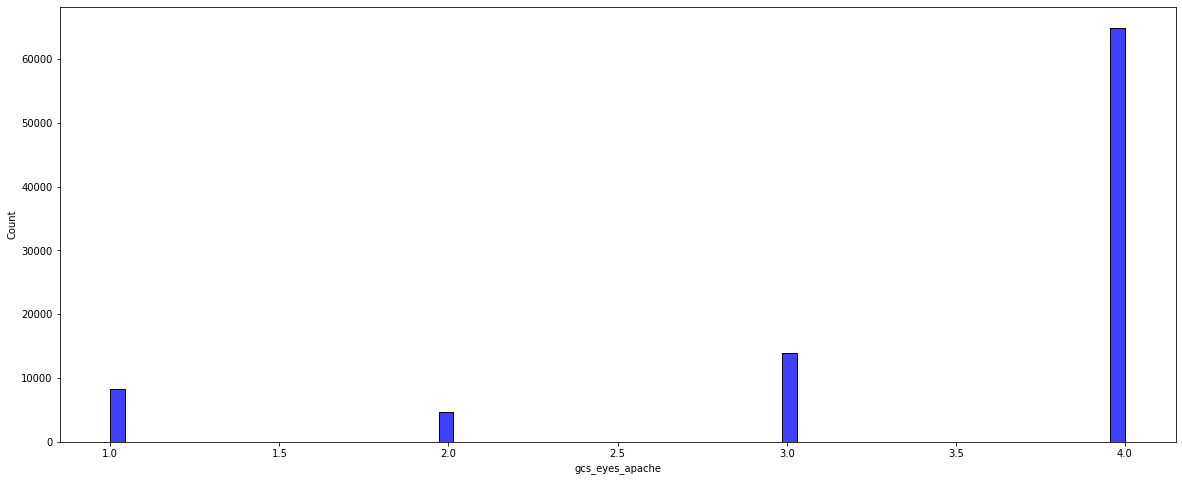

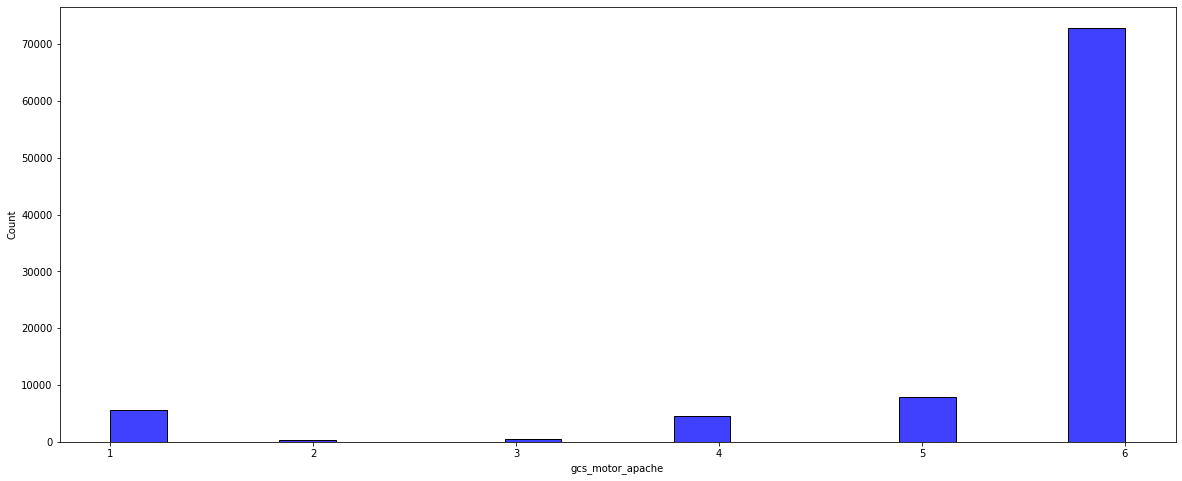

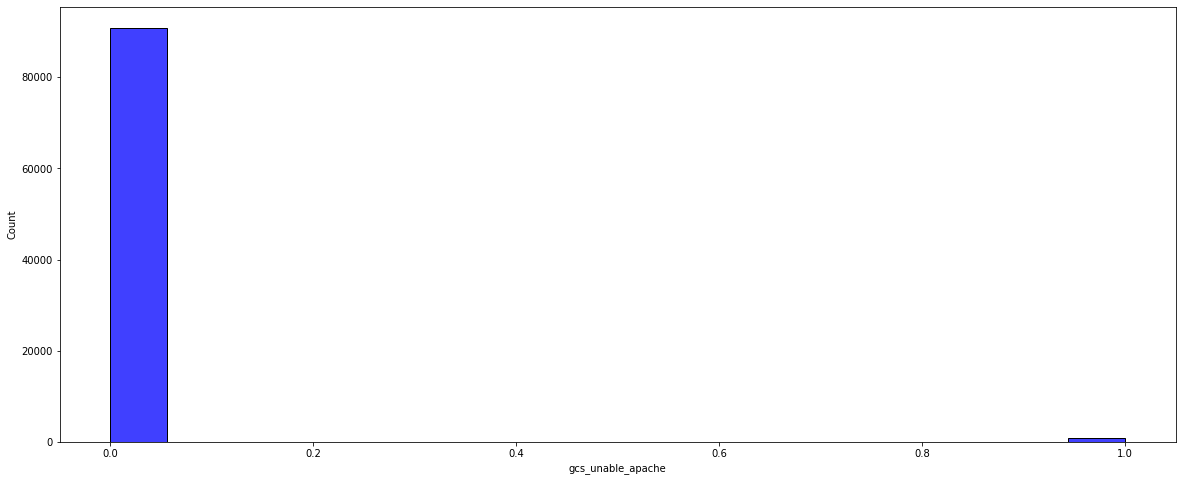

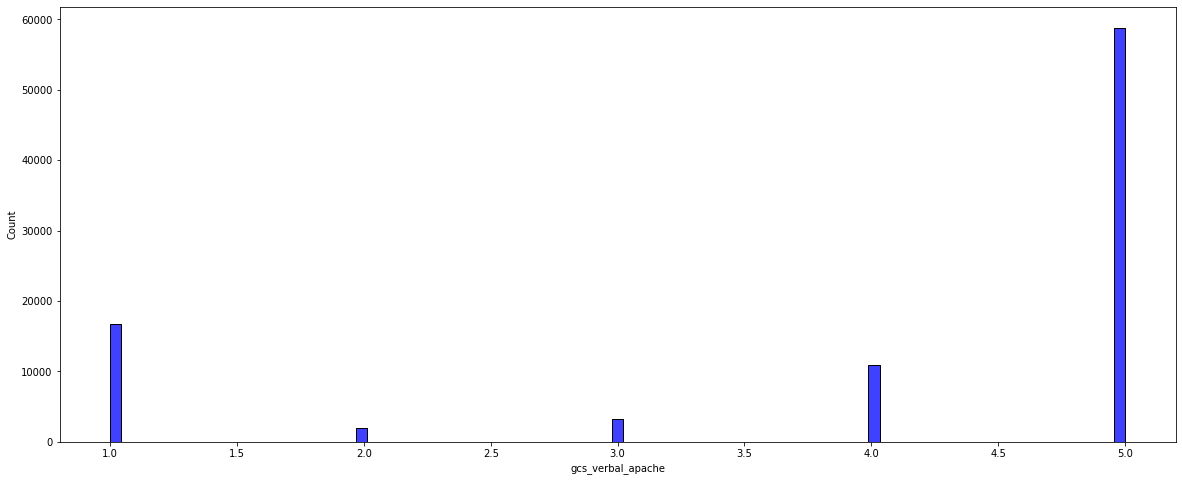

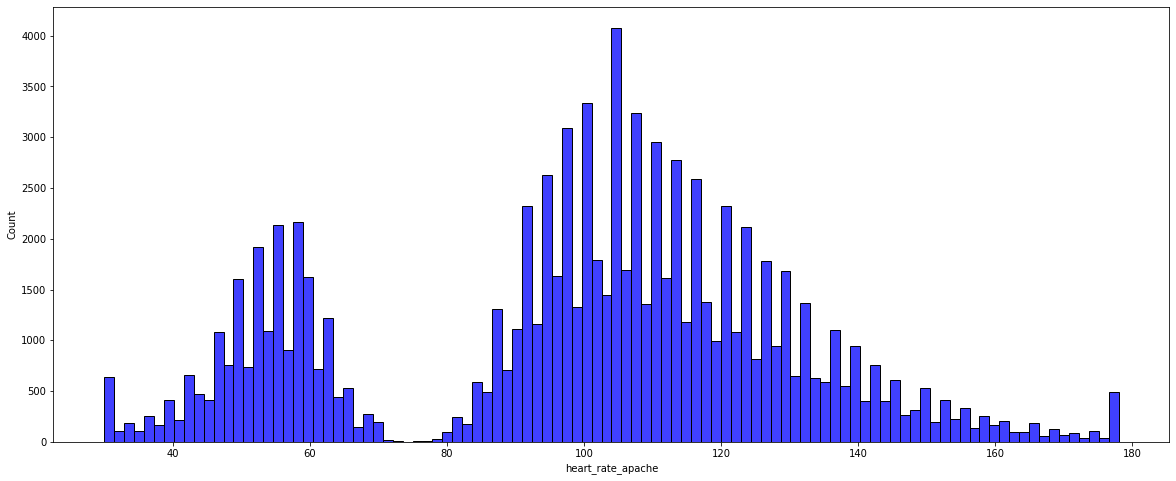

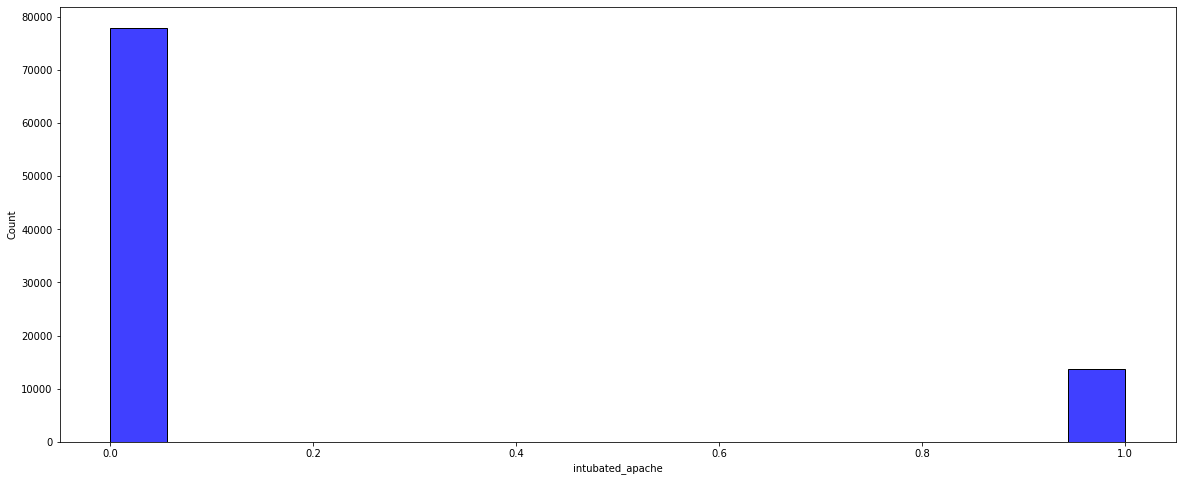

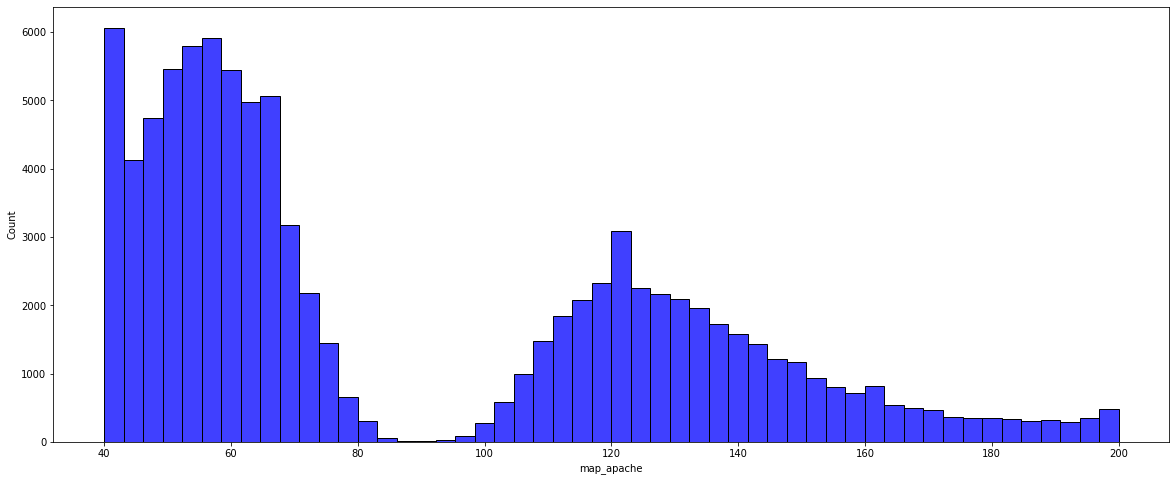

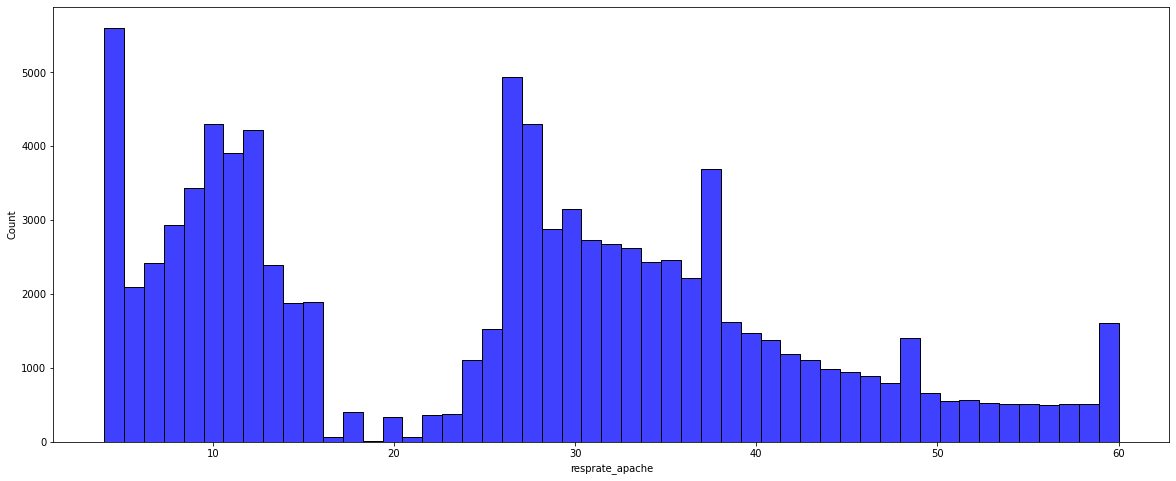

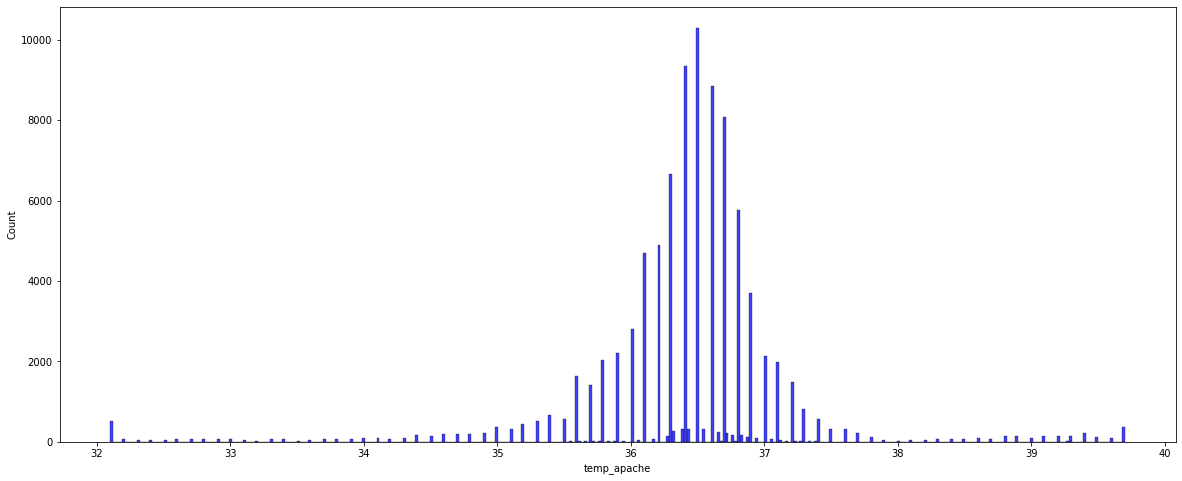

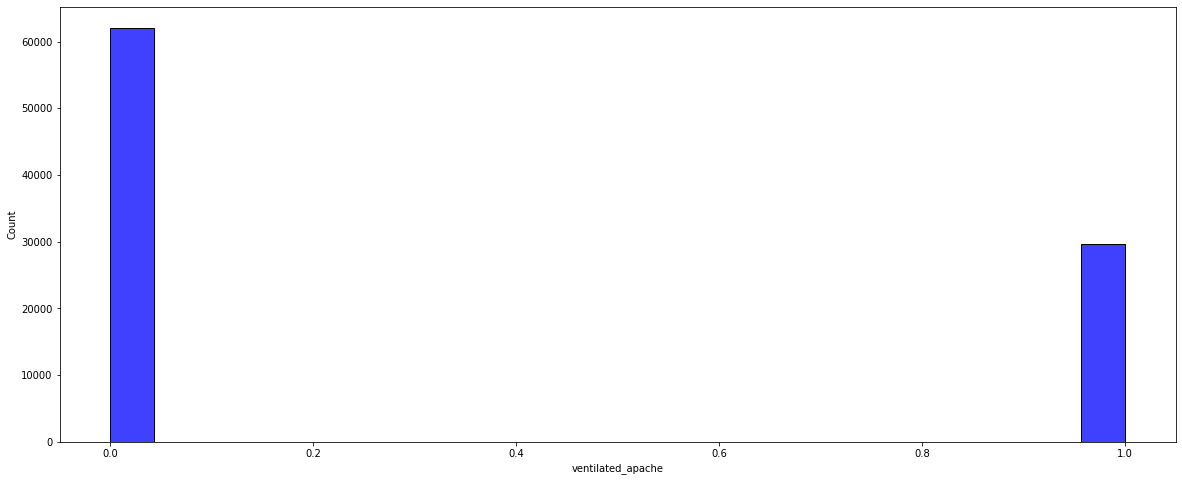

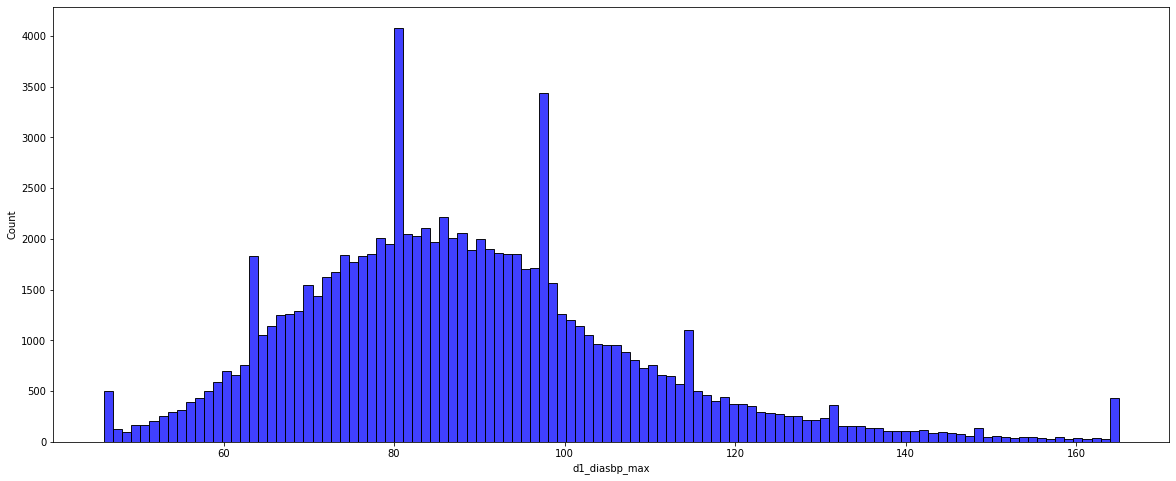

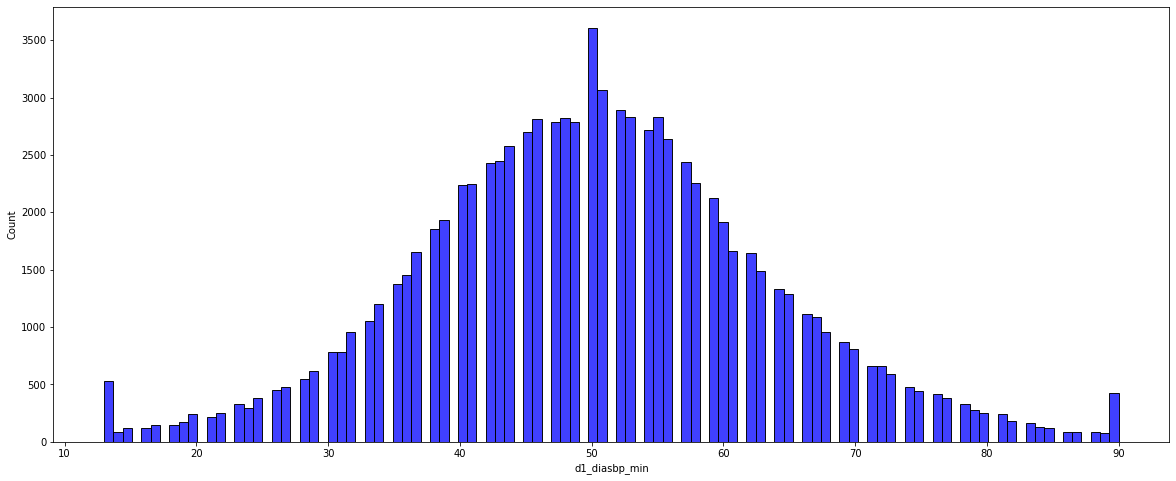

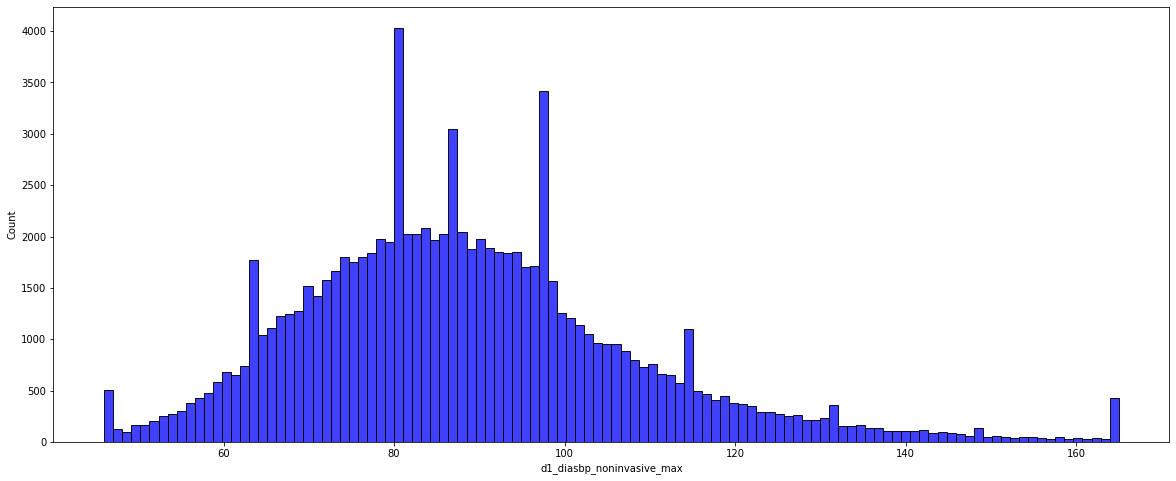

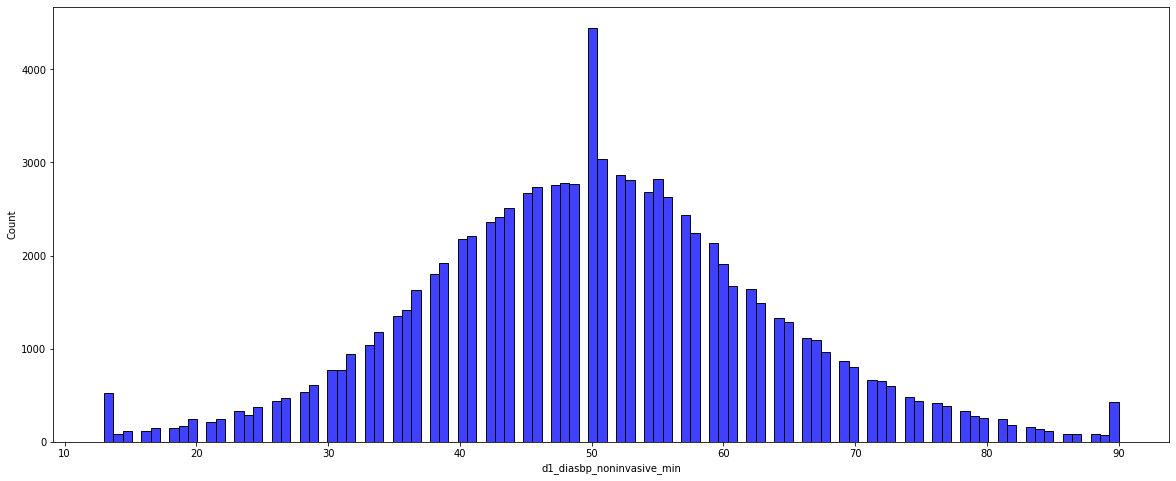

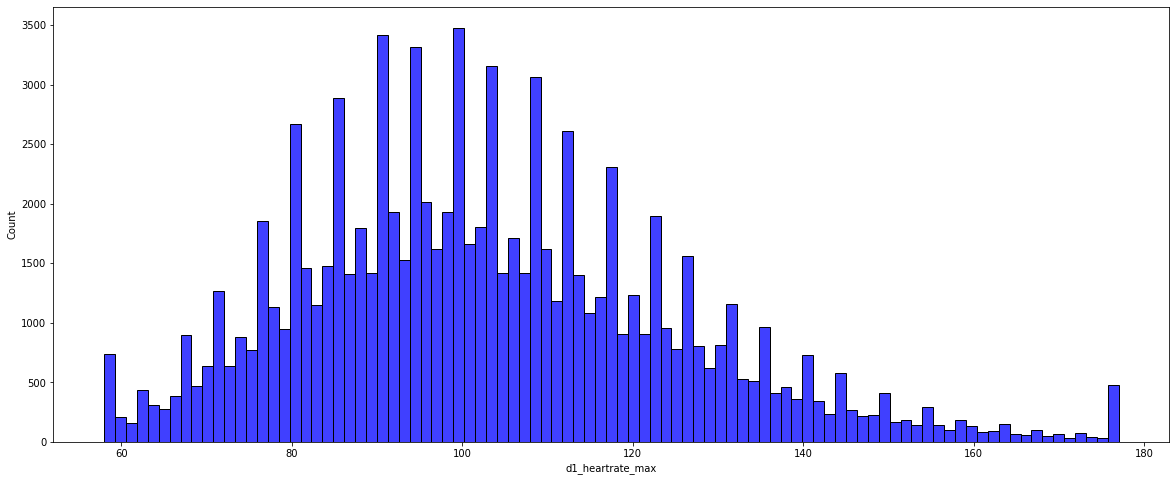

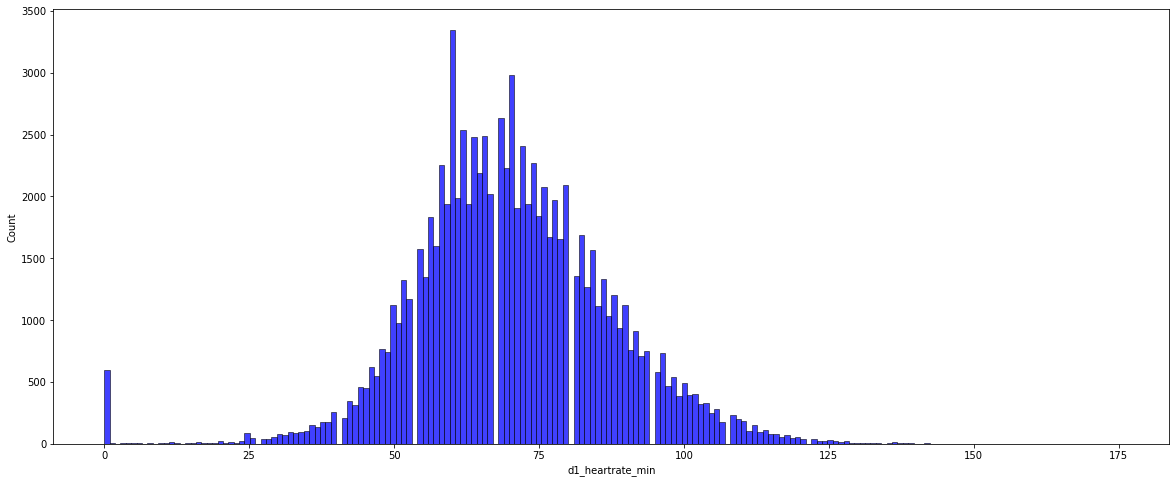

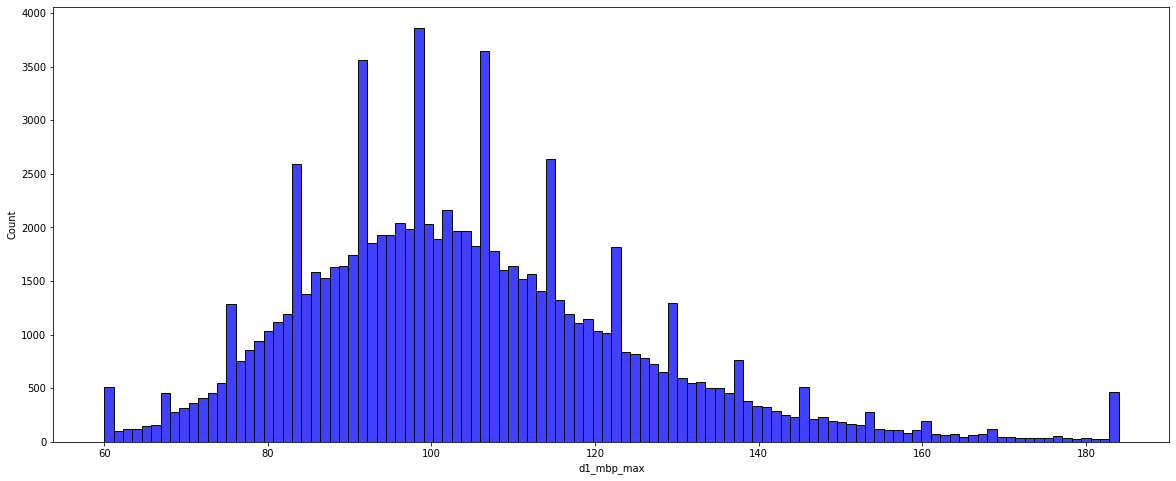

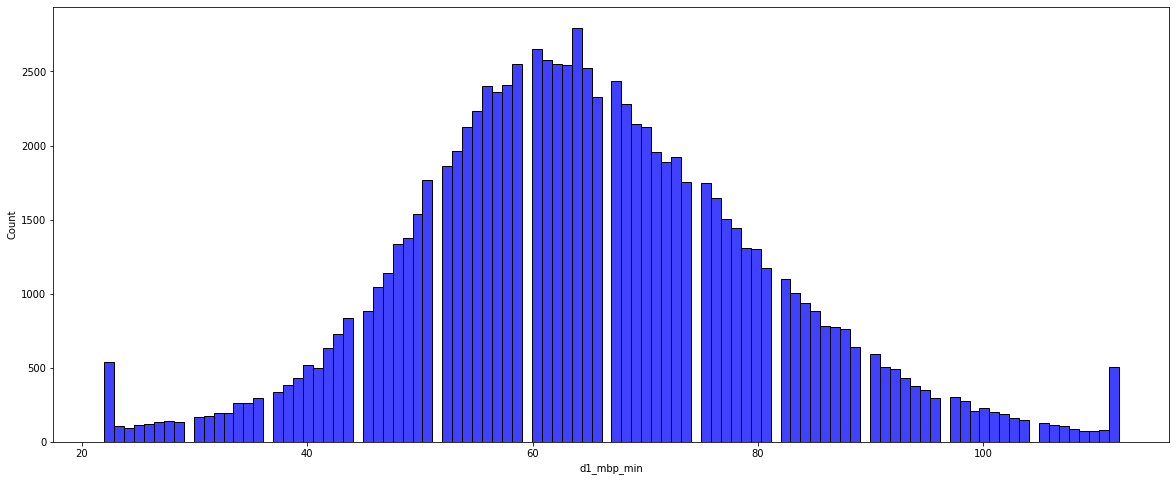

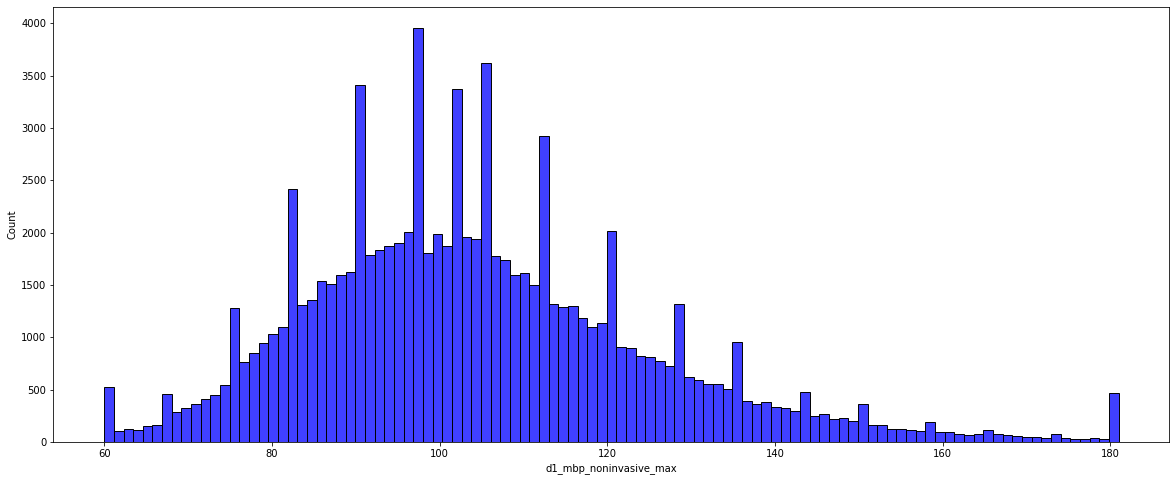

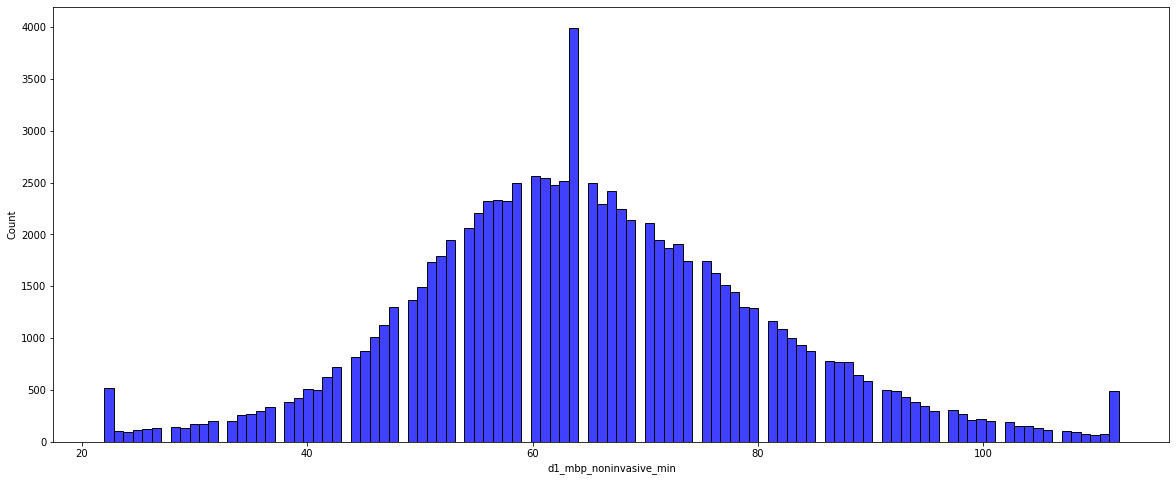

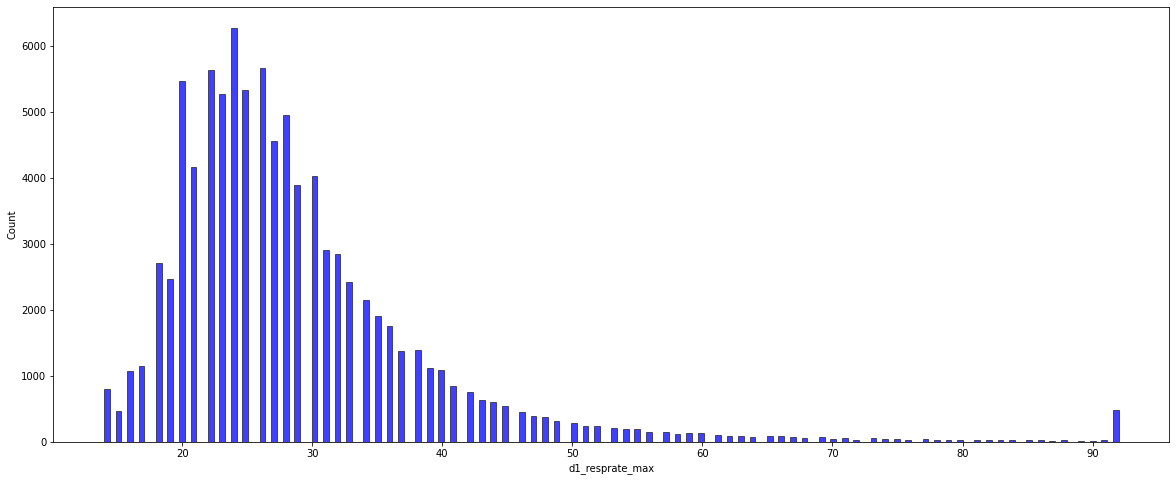

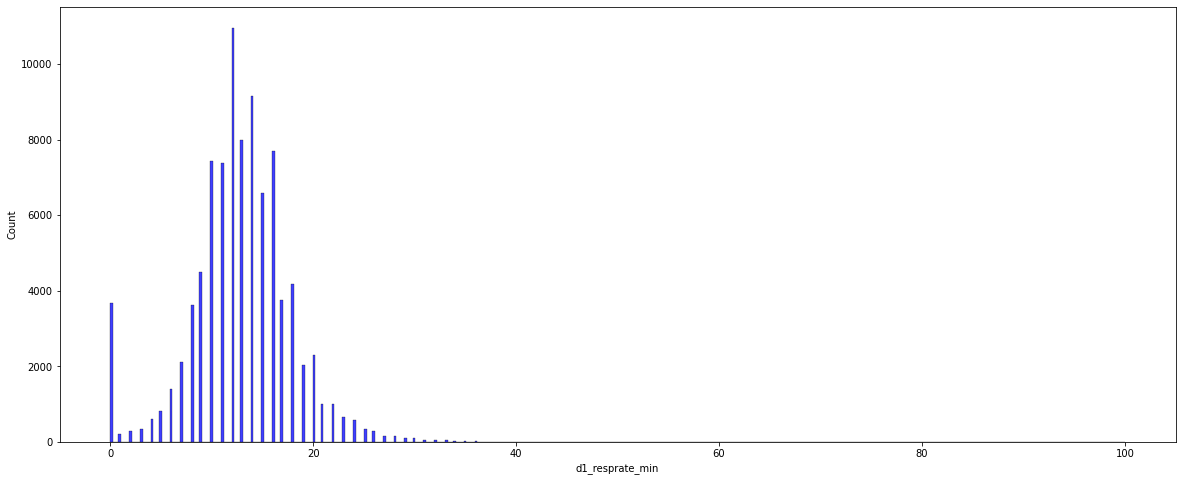

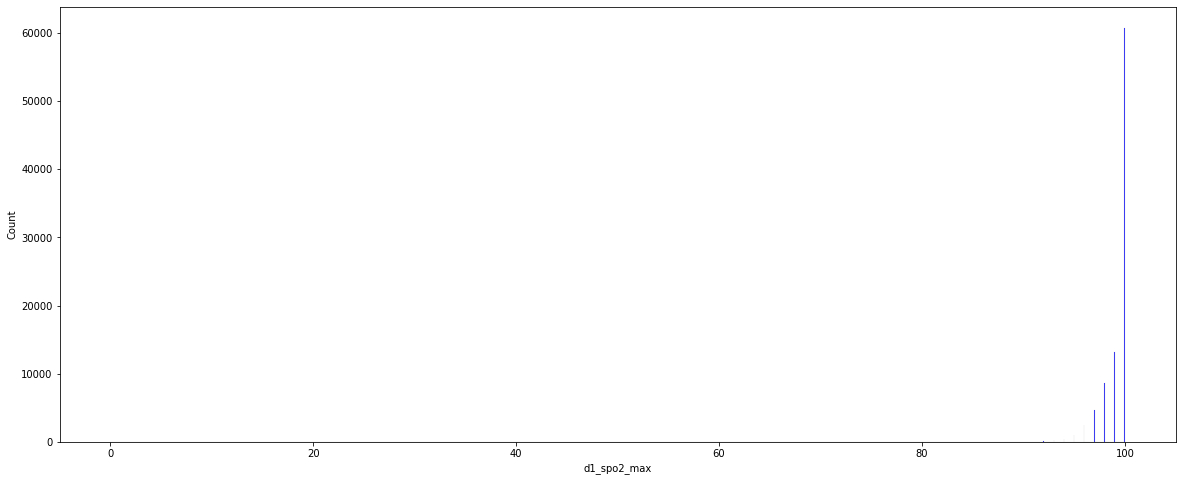

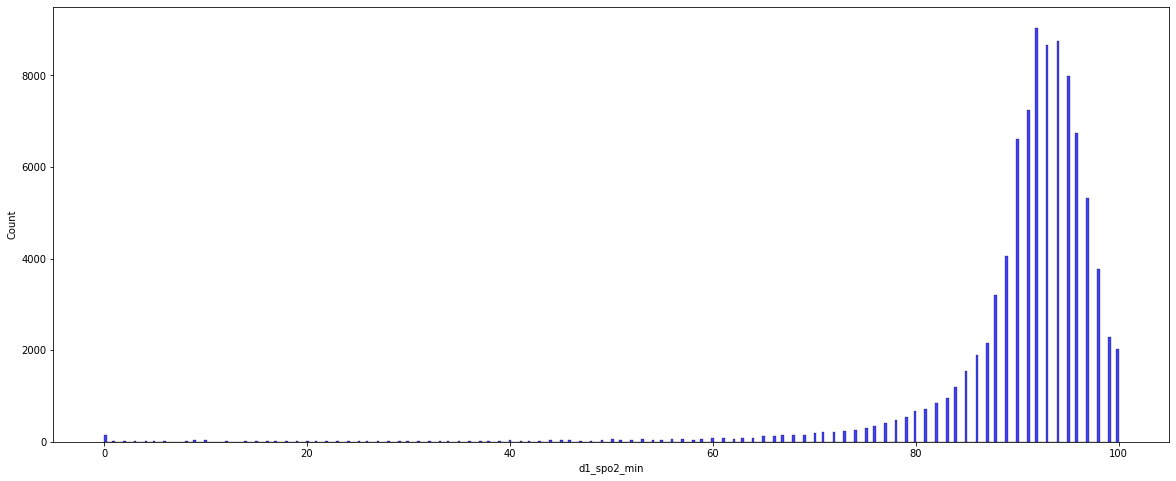

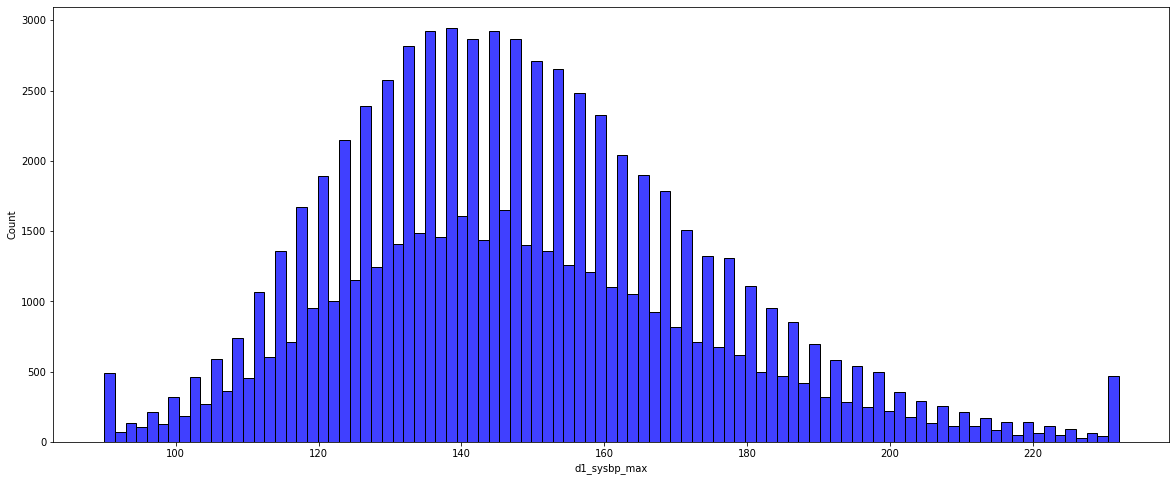

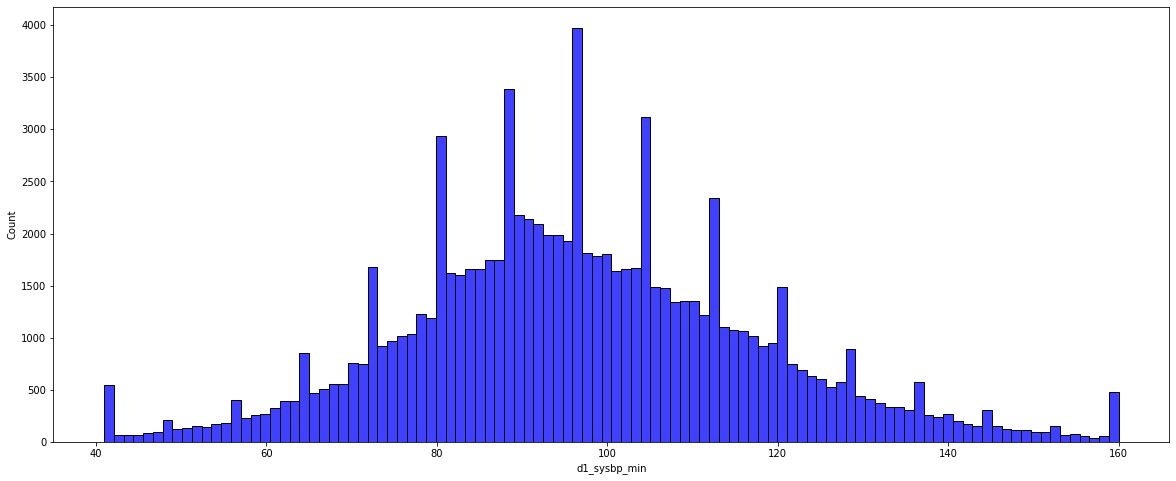

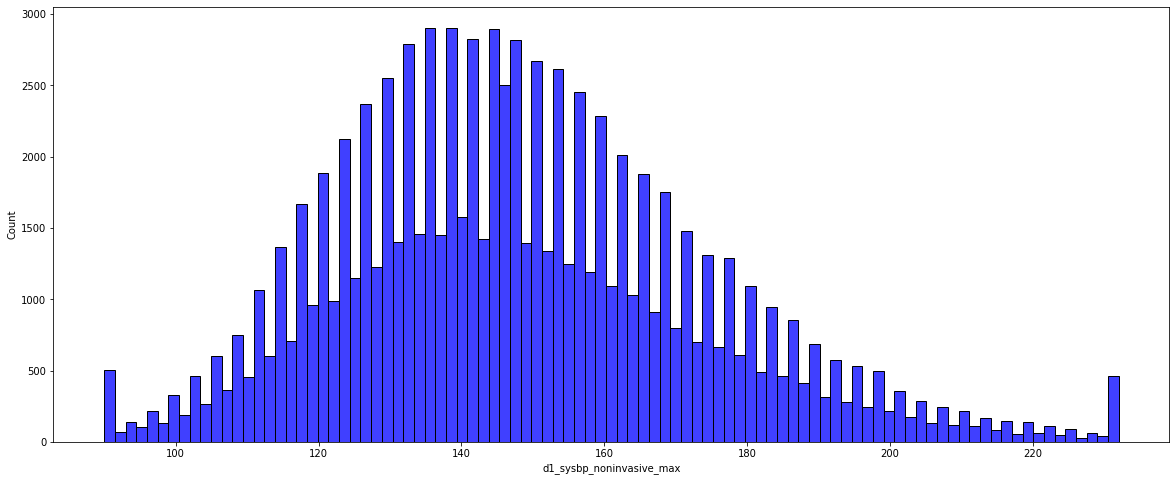

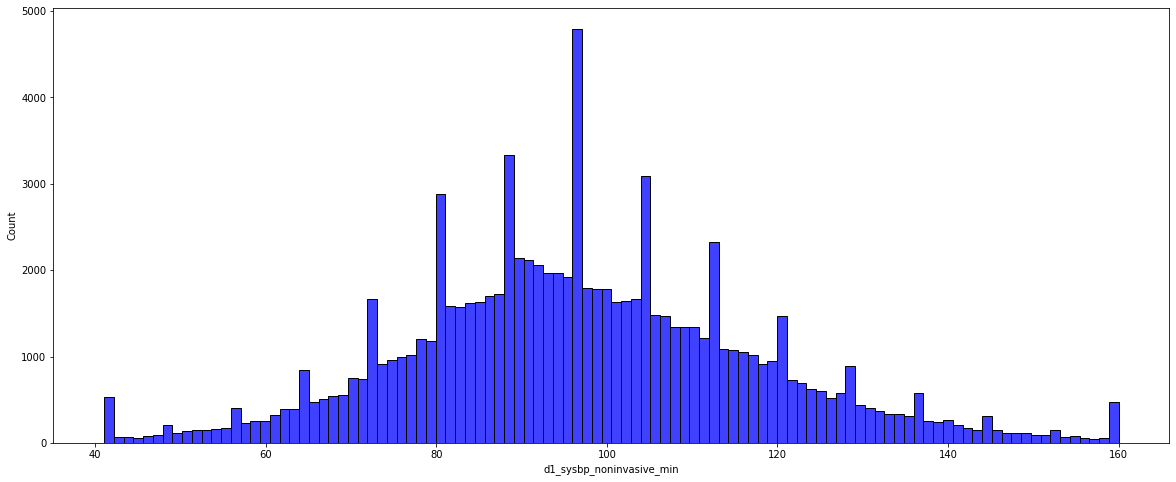

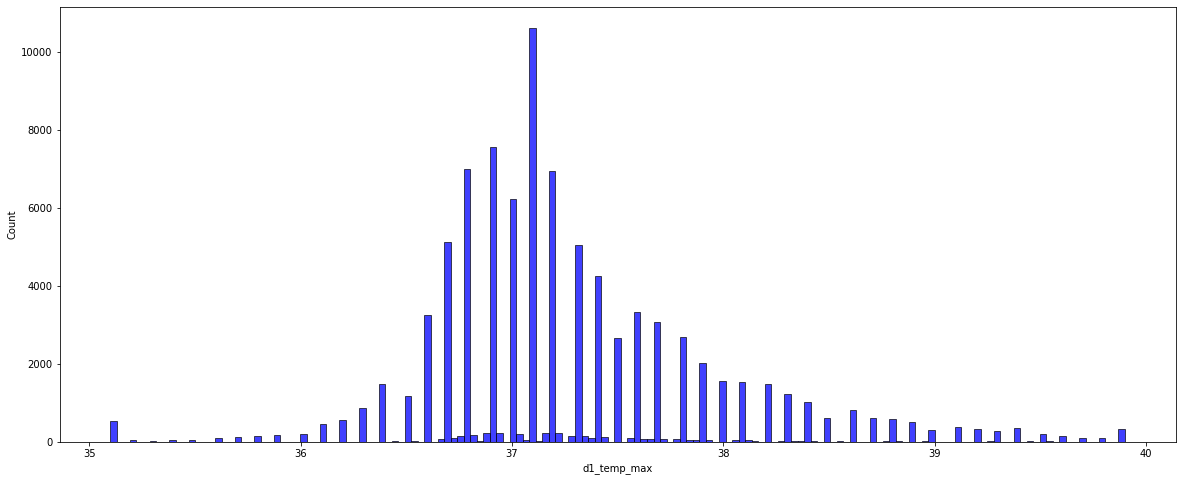

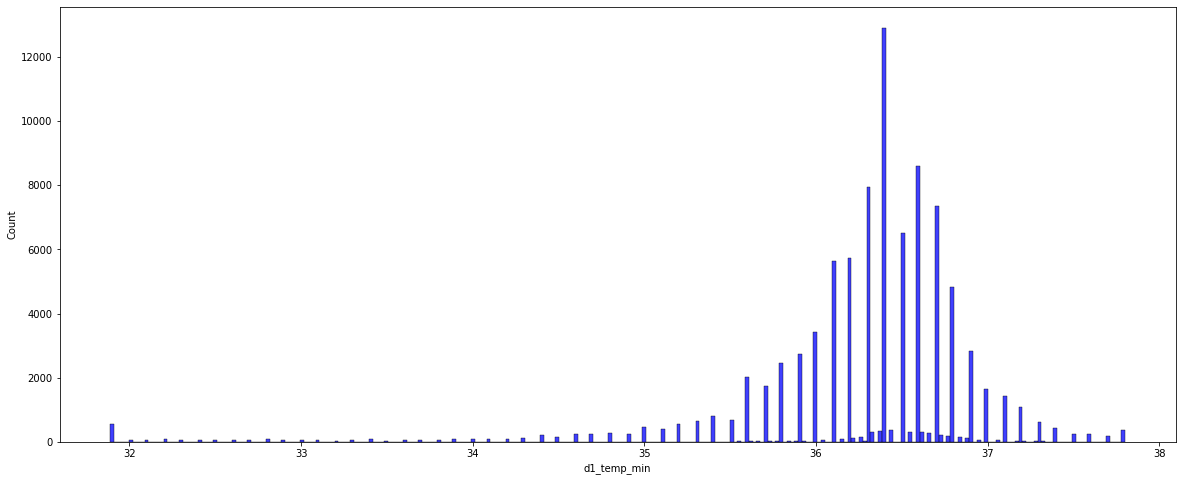

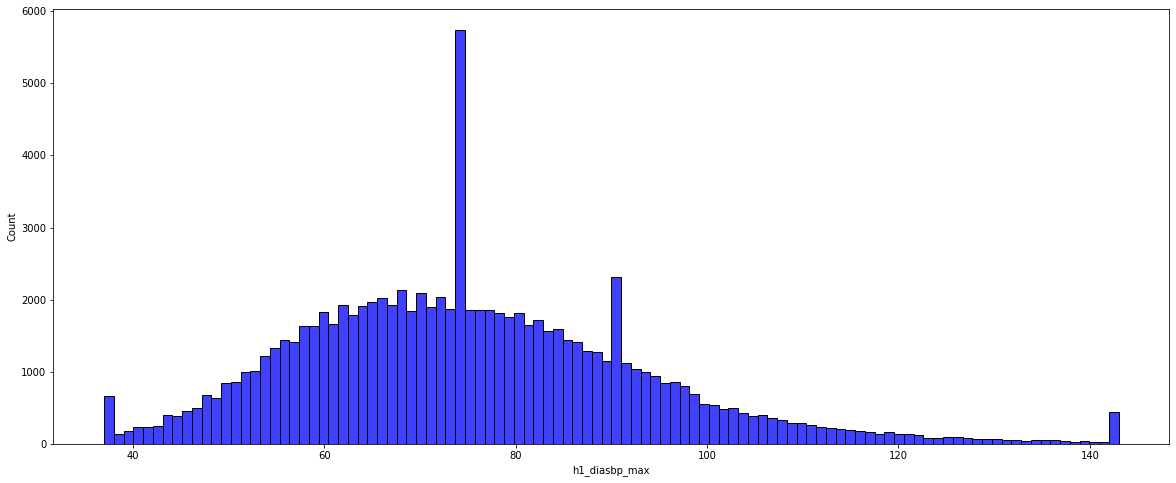

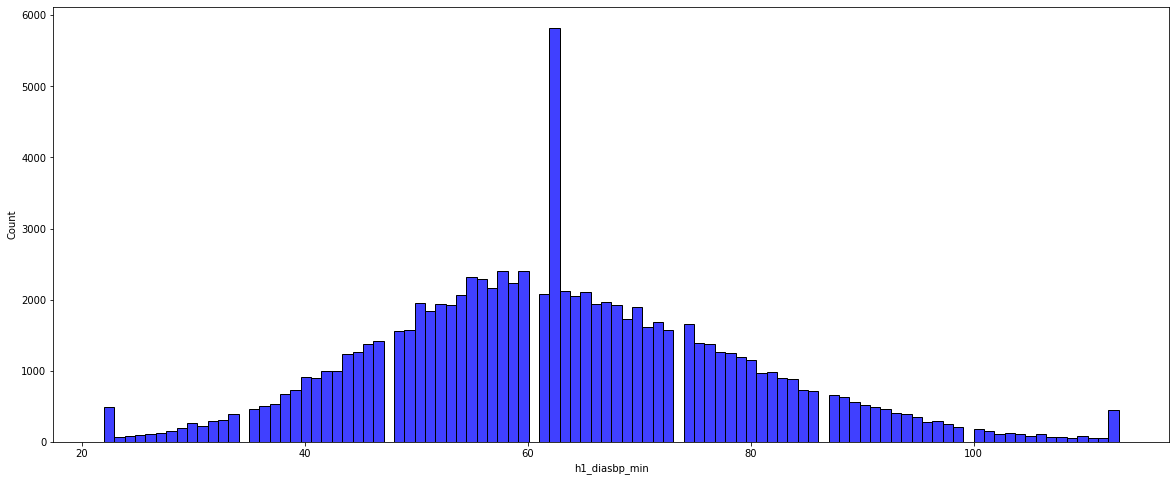

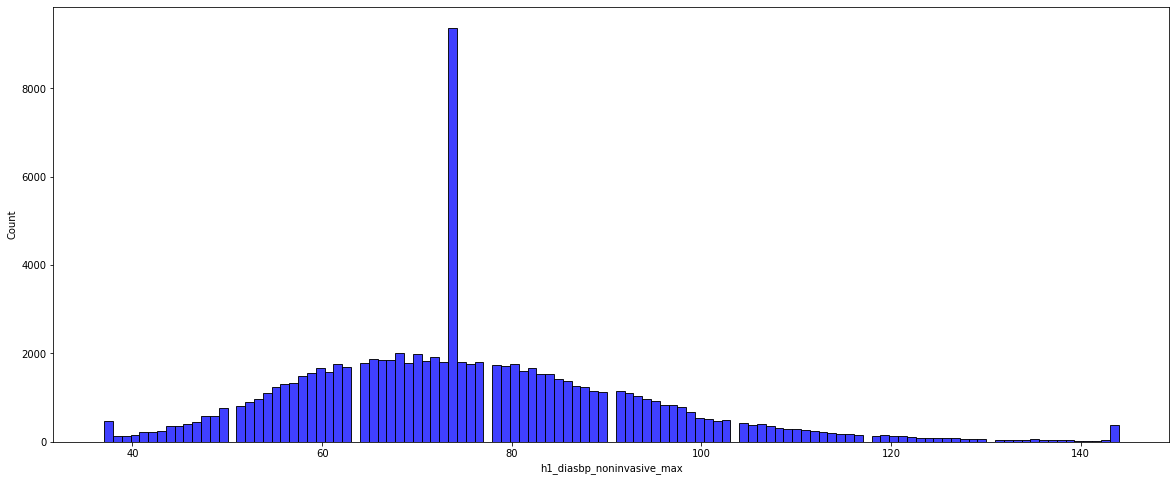

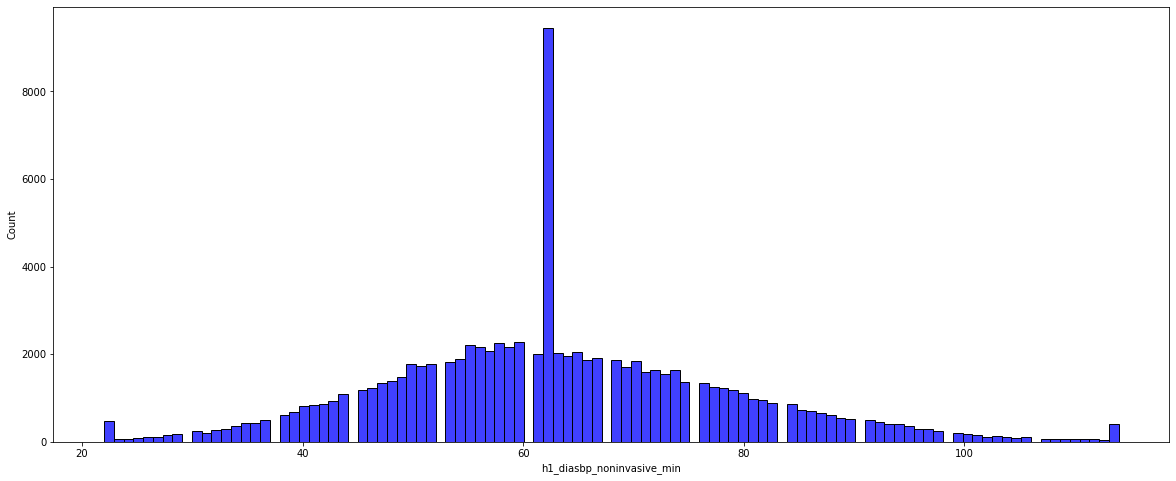

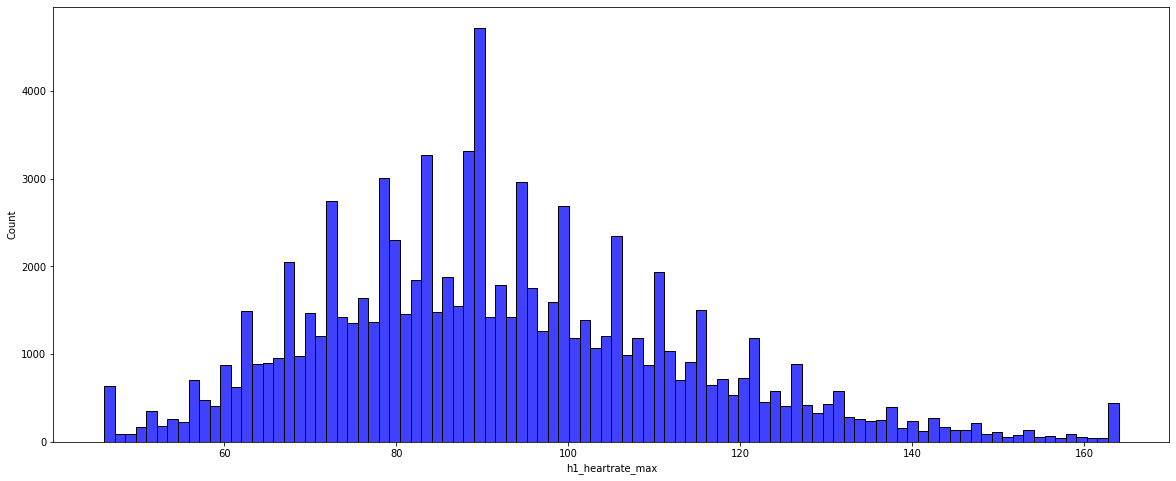

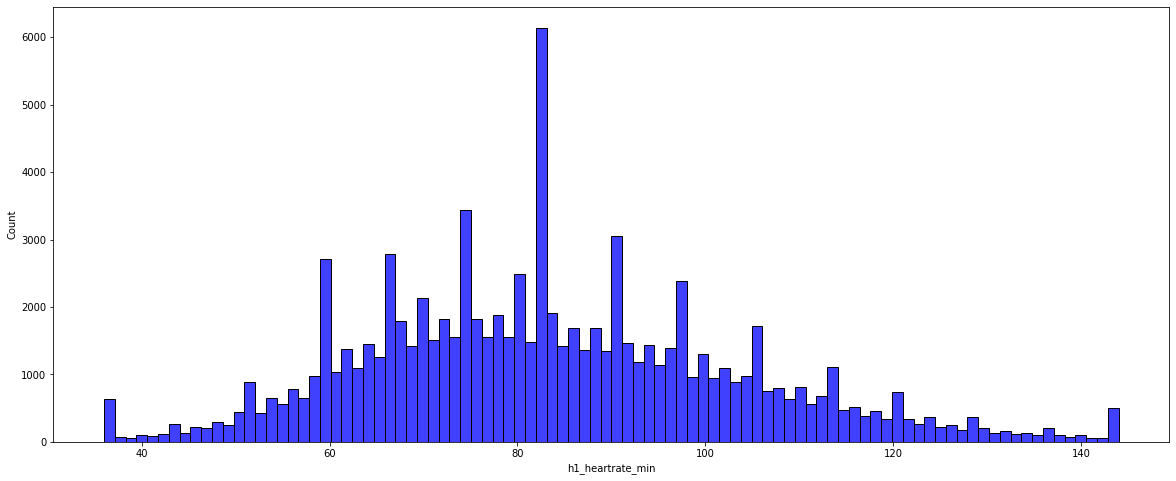

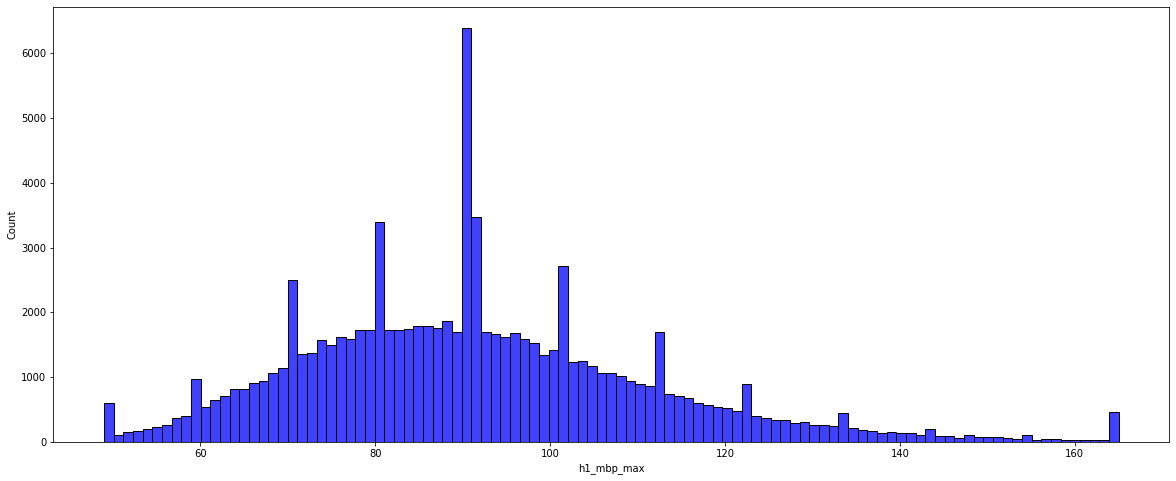

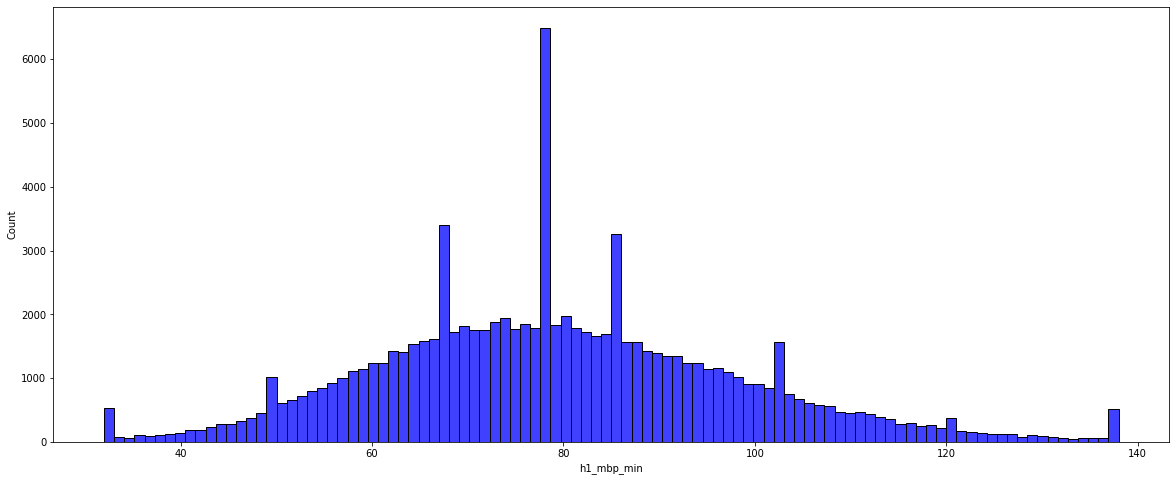

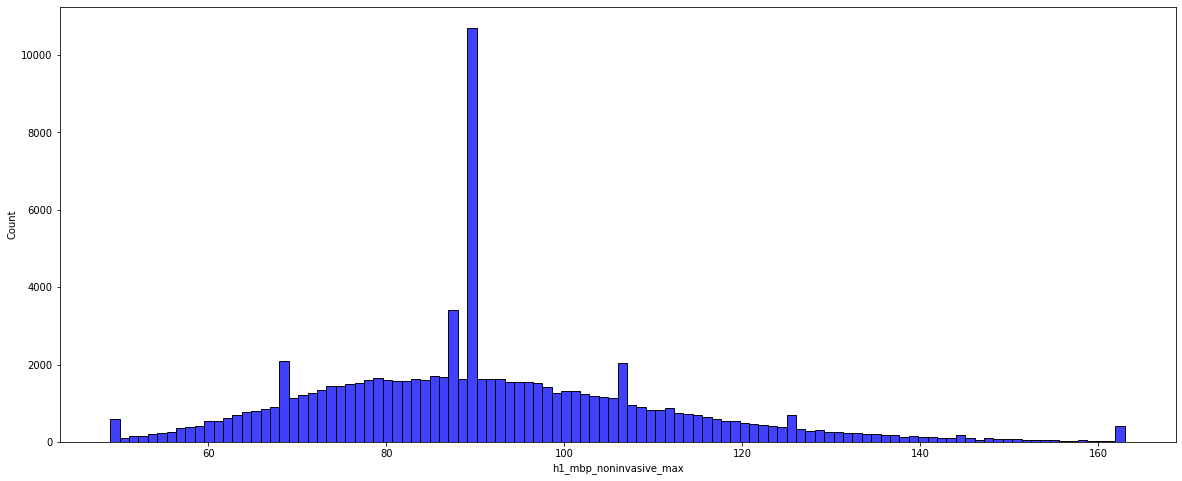

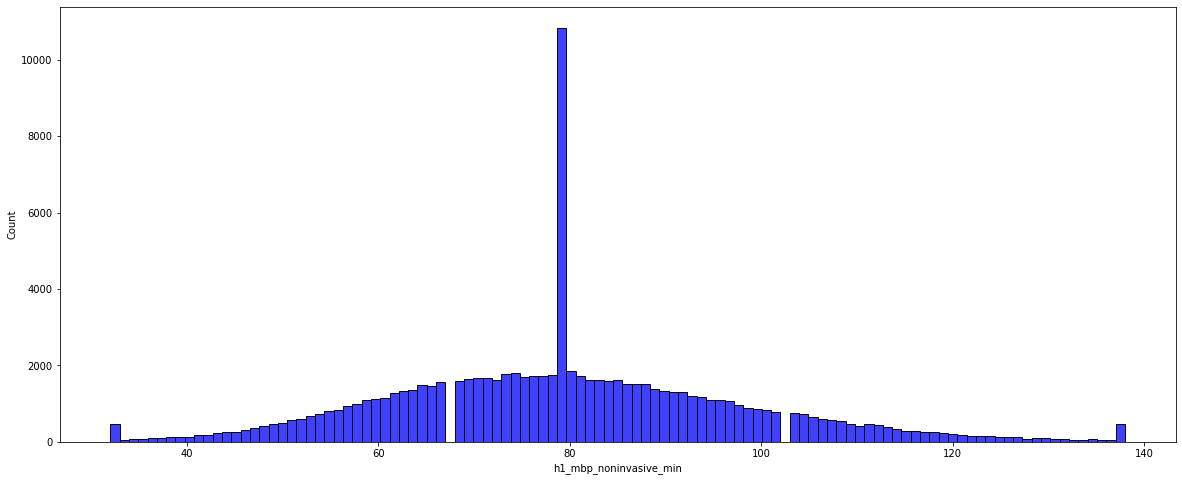

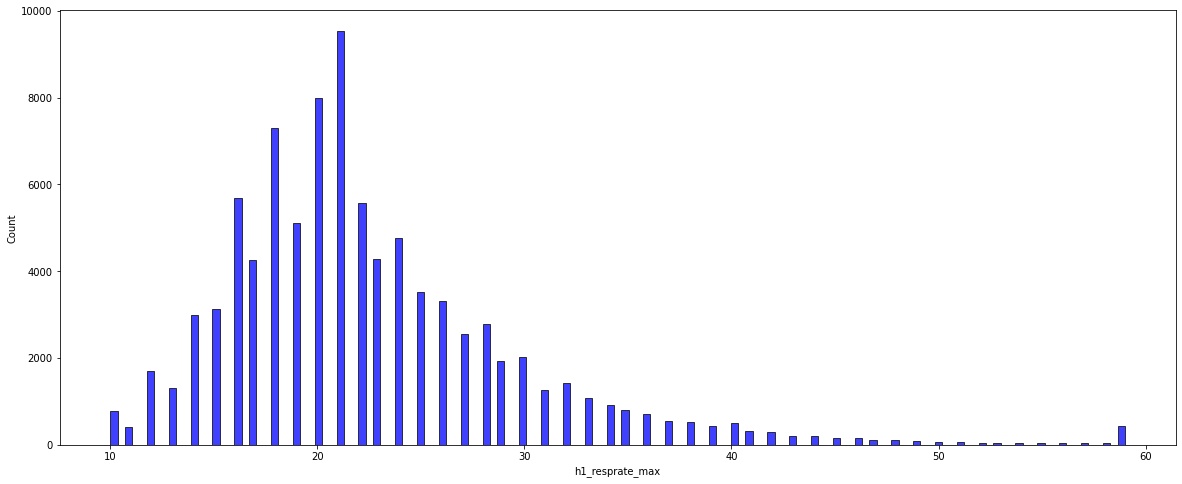

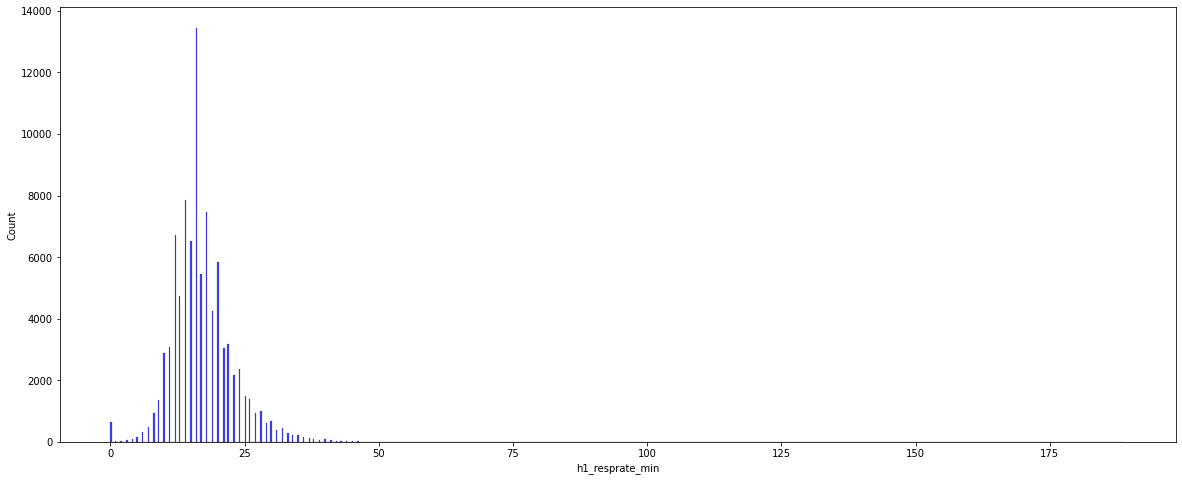

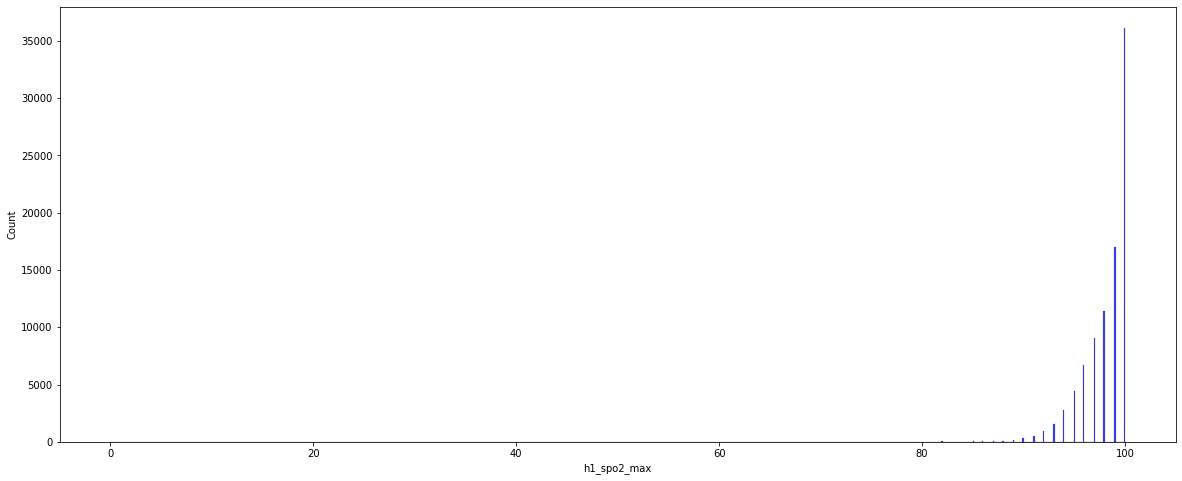

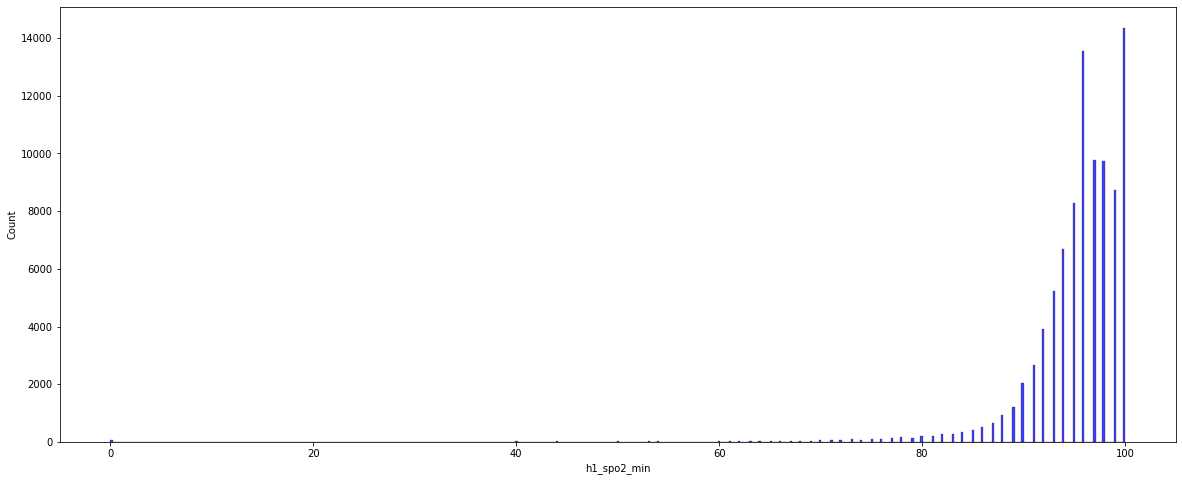

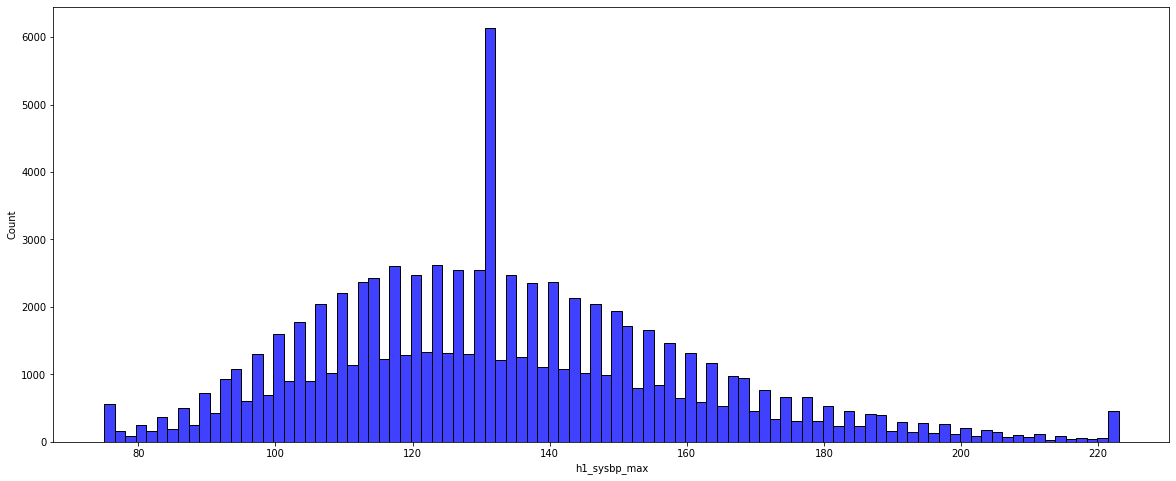

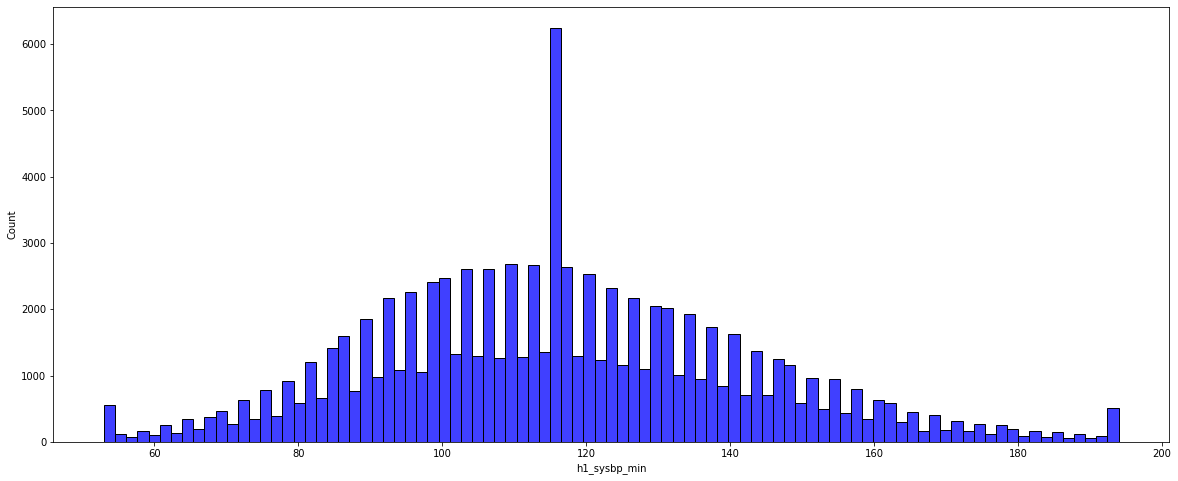

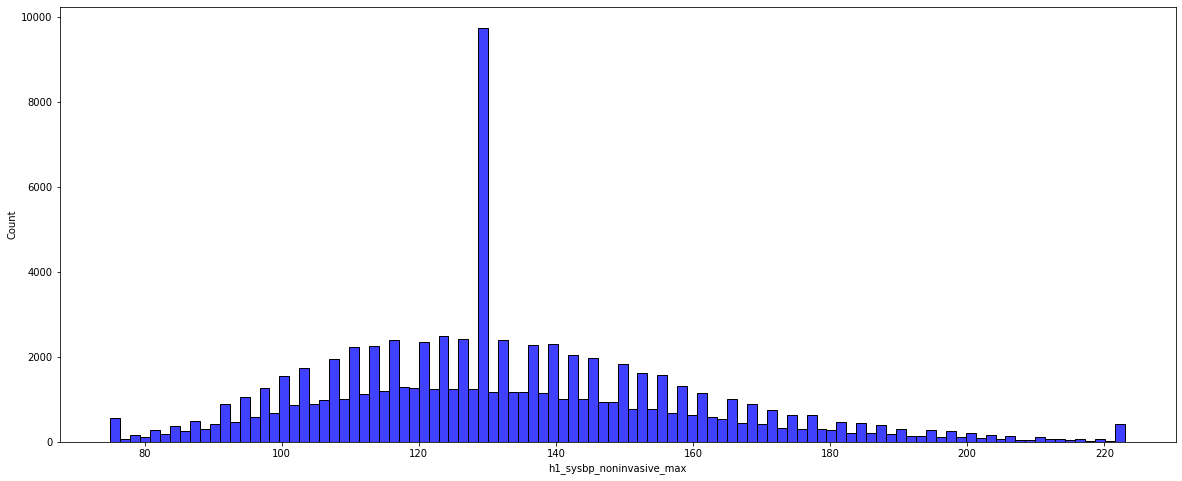

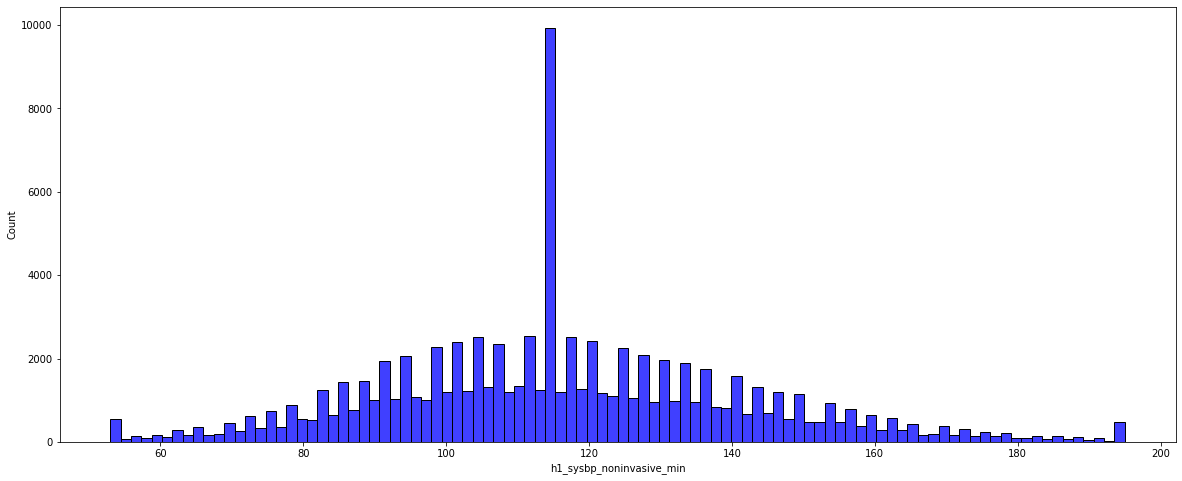

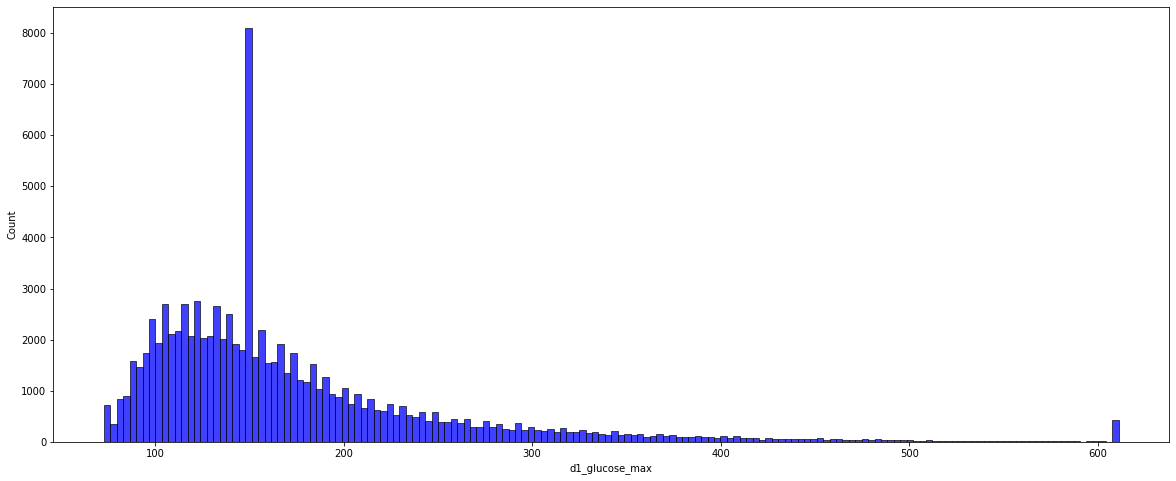

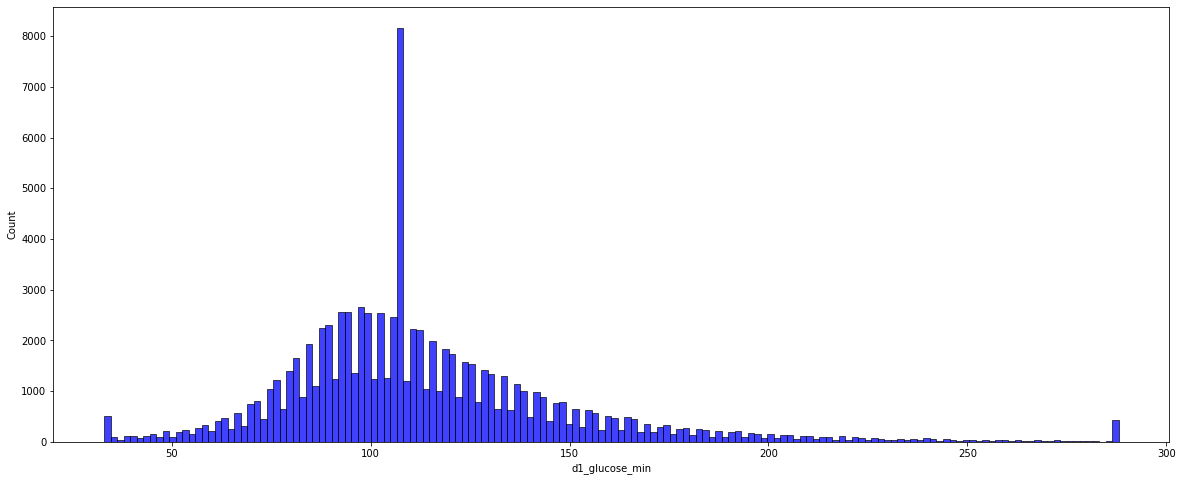

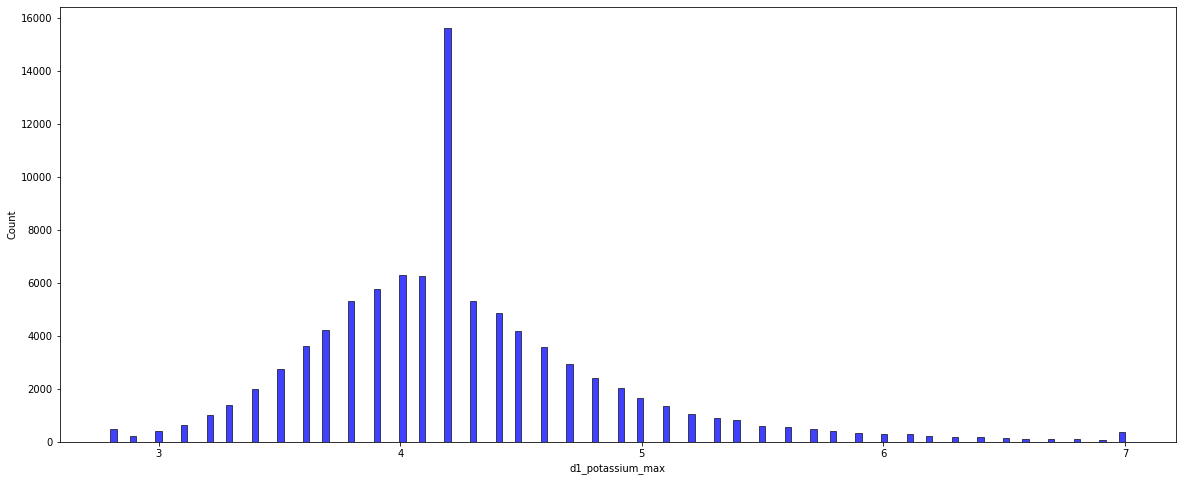

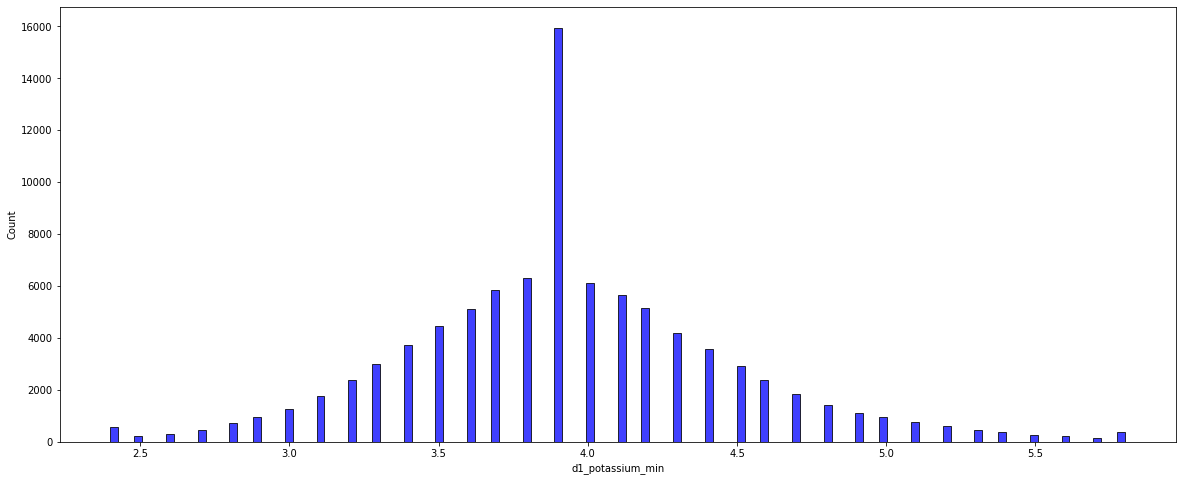

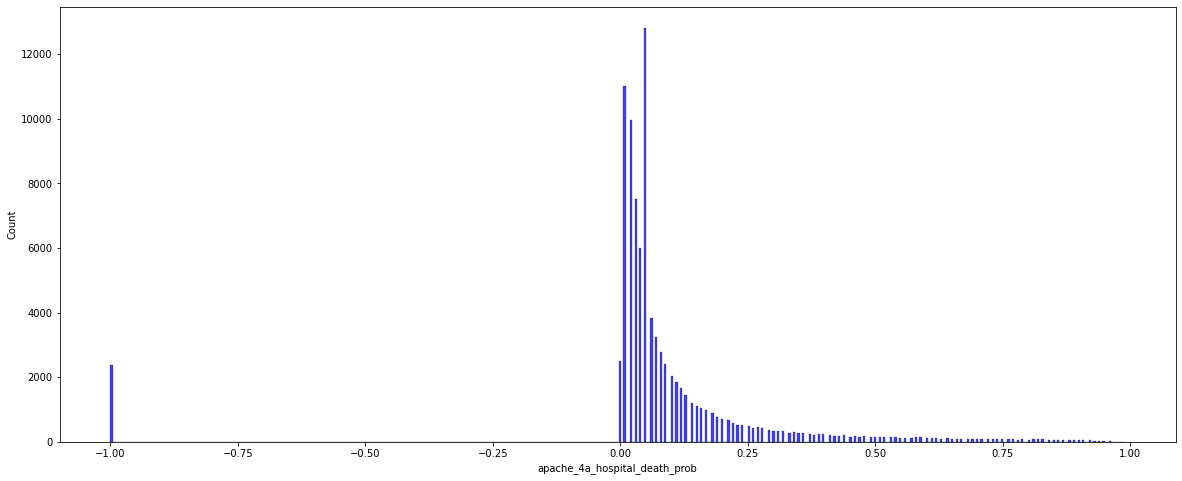

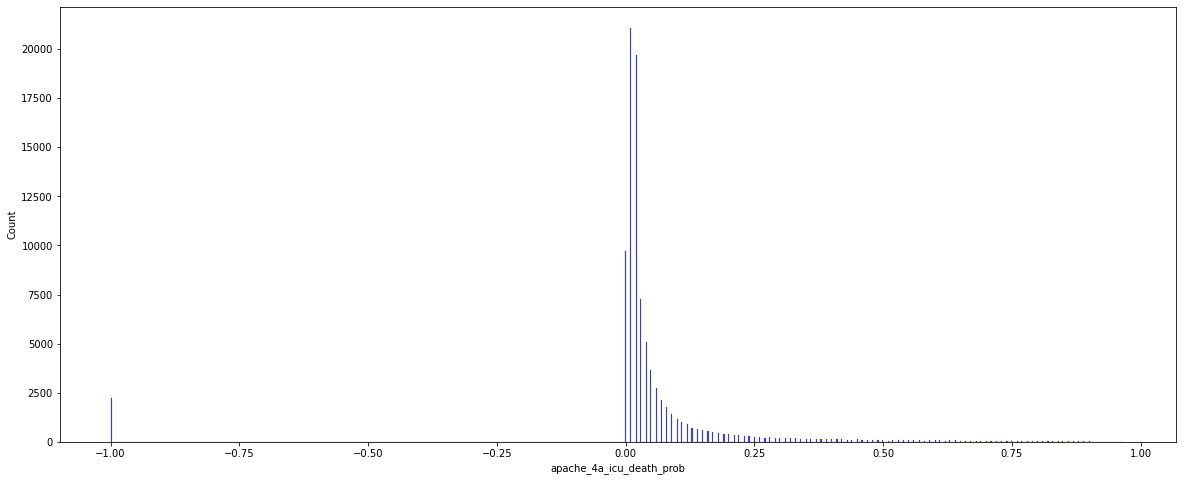

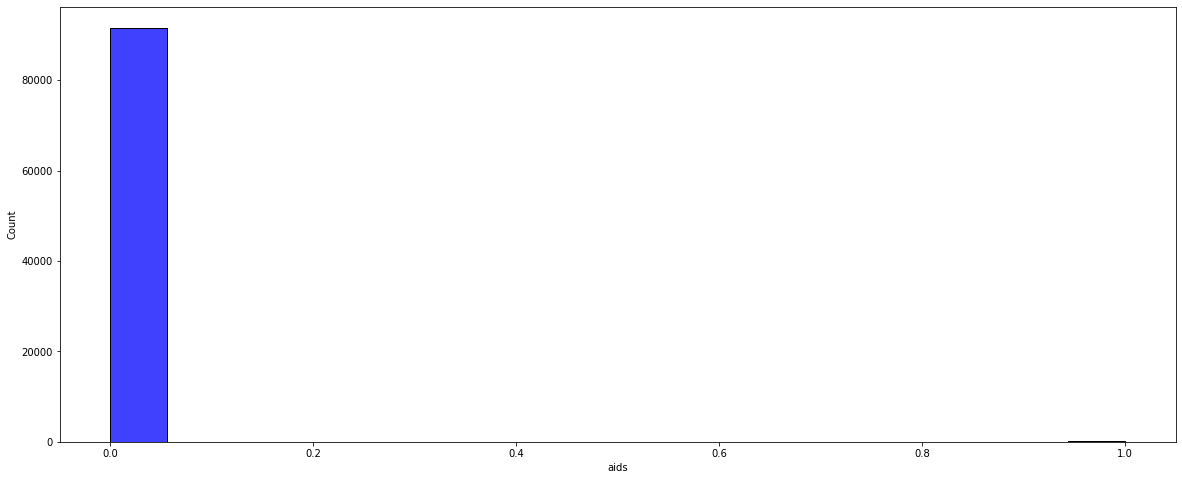

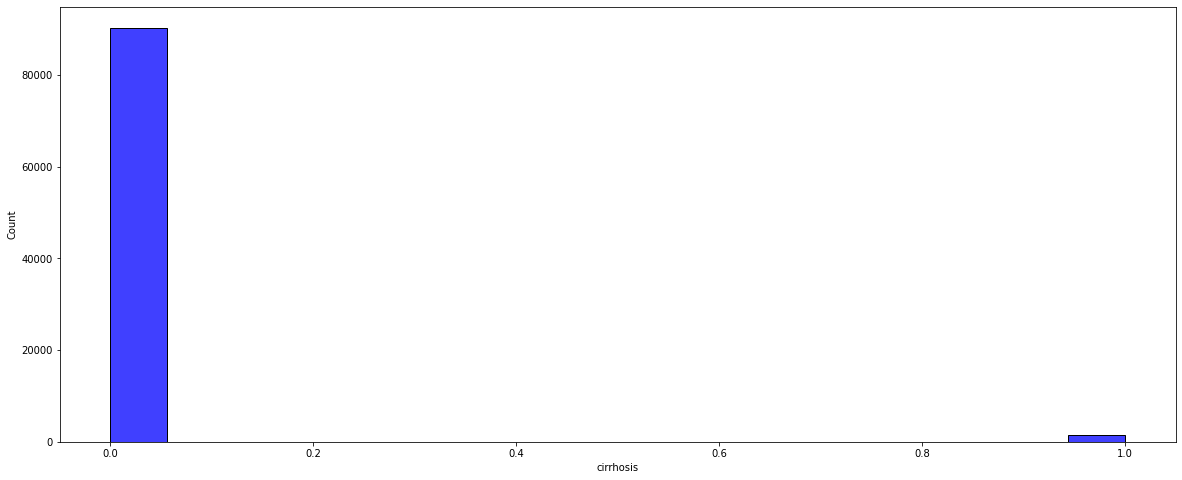

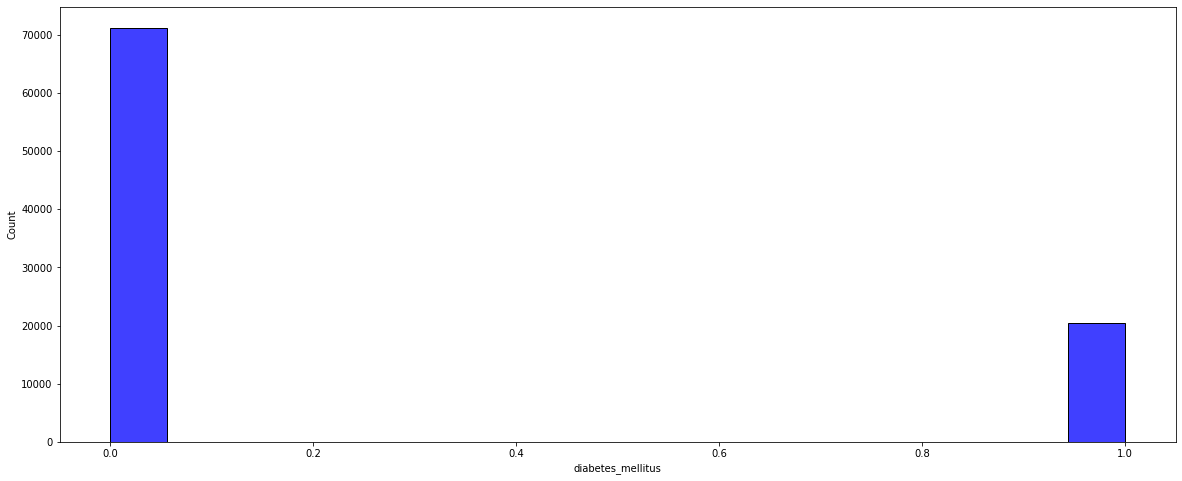

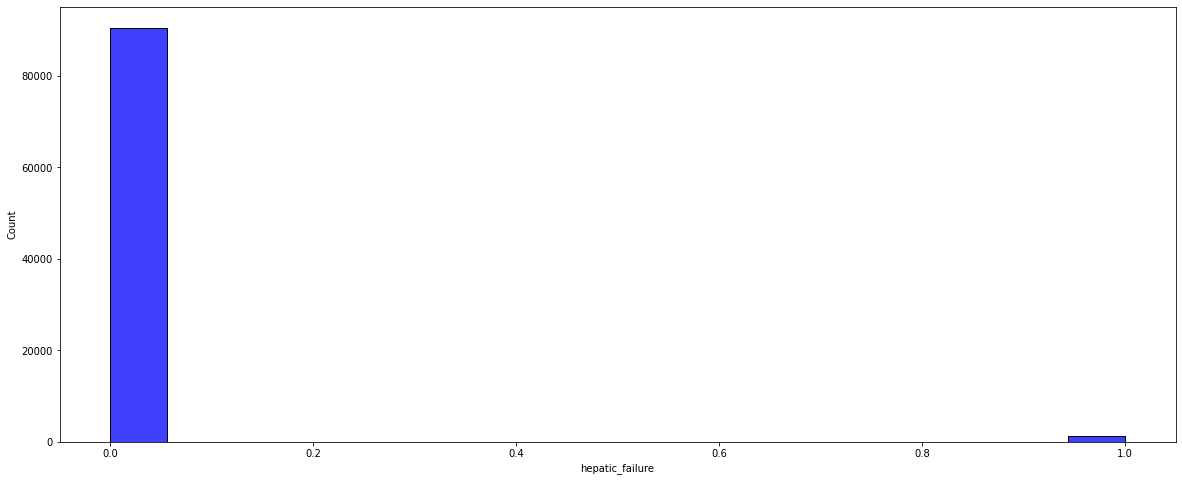

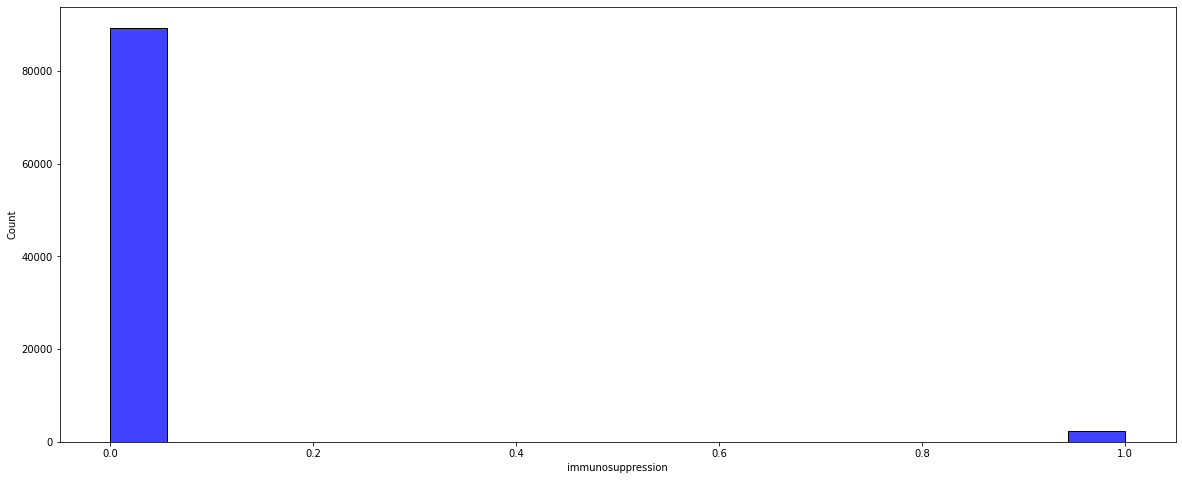

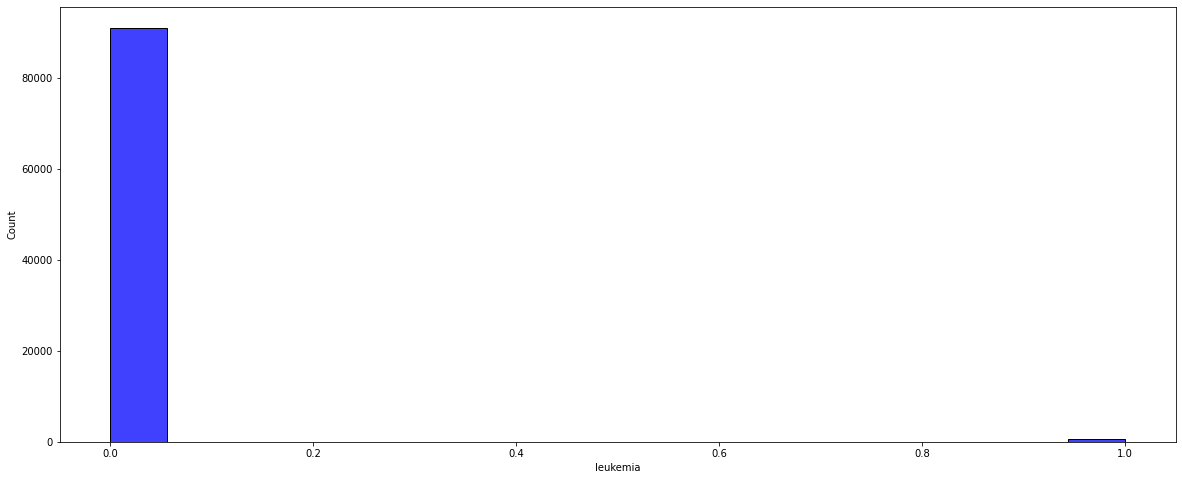

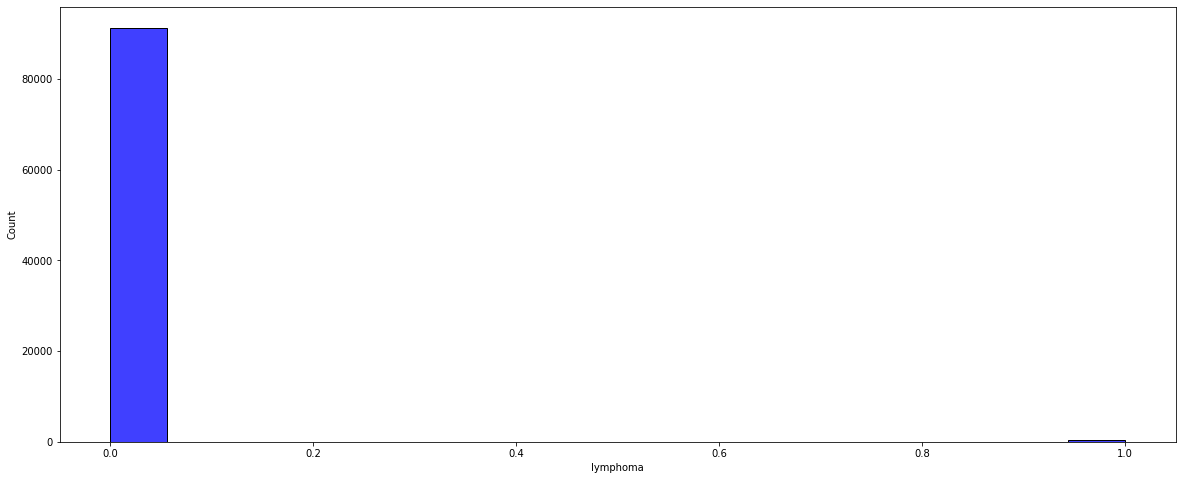

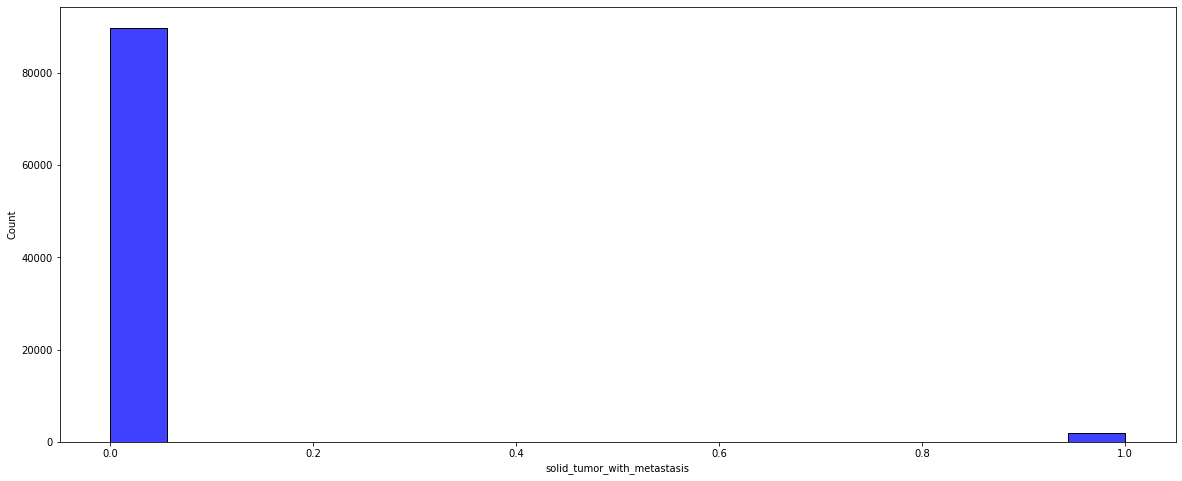

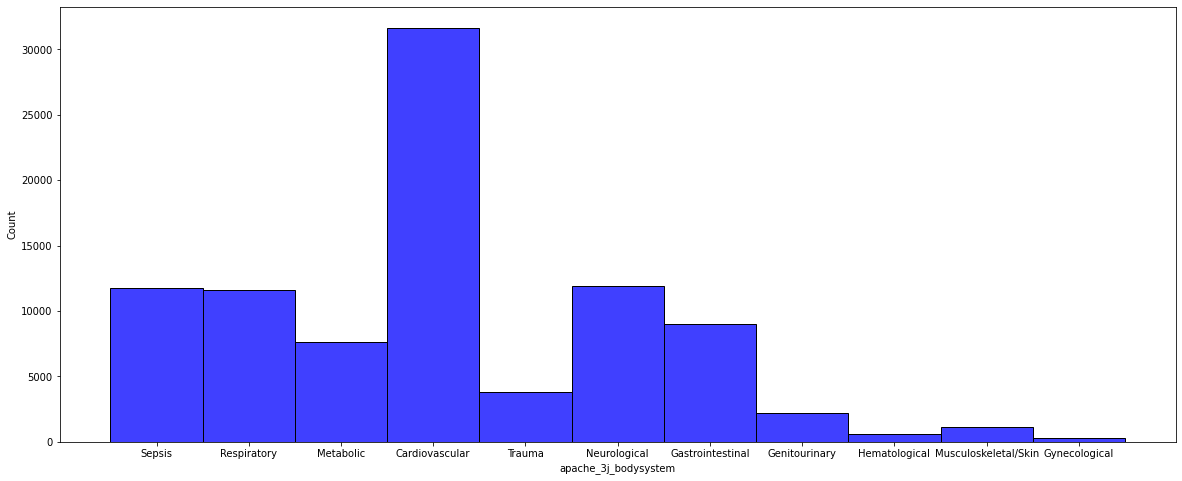

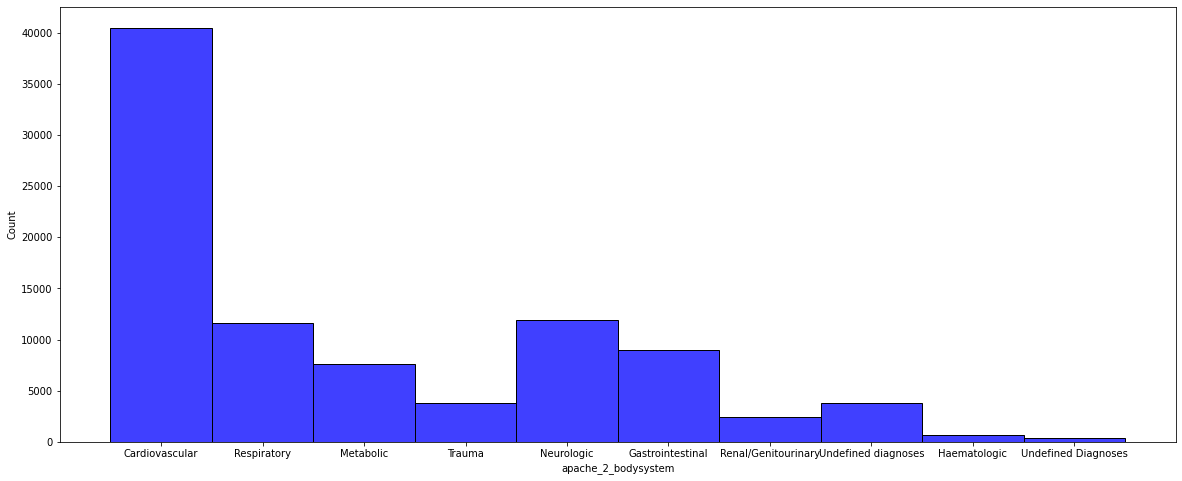

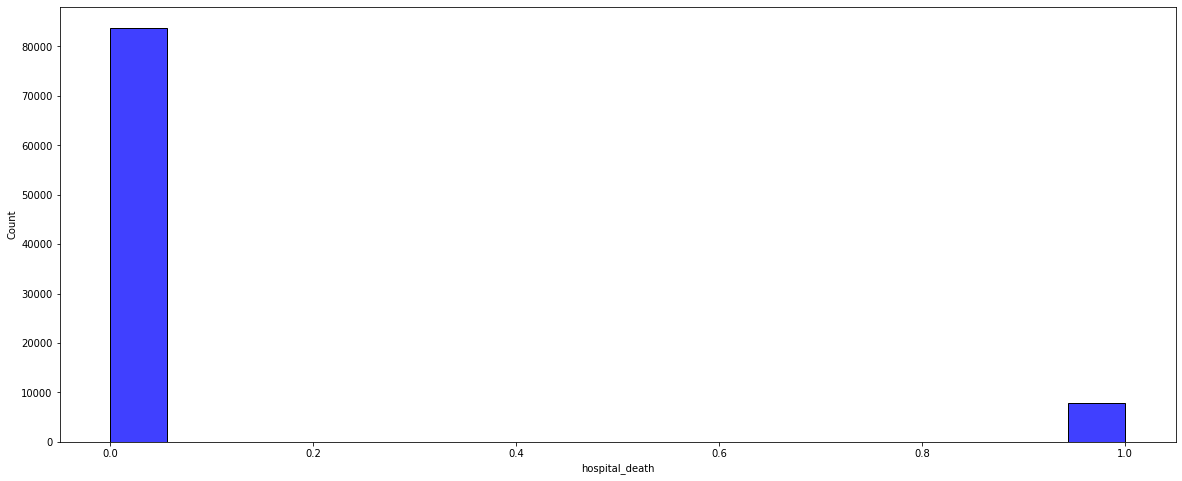

In [30]:
#Plotting the counts
import matplotlib.pyplot as plt
import seaborn as sns 
for col in df.columns:
    plt.figure(figsize=(20,8))
    sns.histplot(df[col], color="blue")
    plt.show()

c:\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


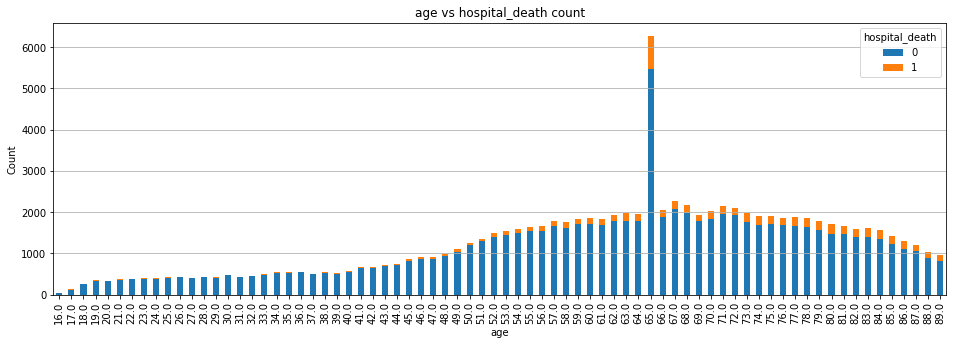

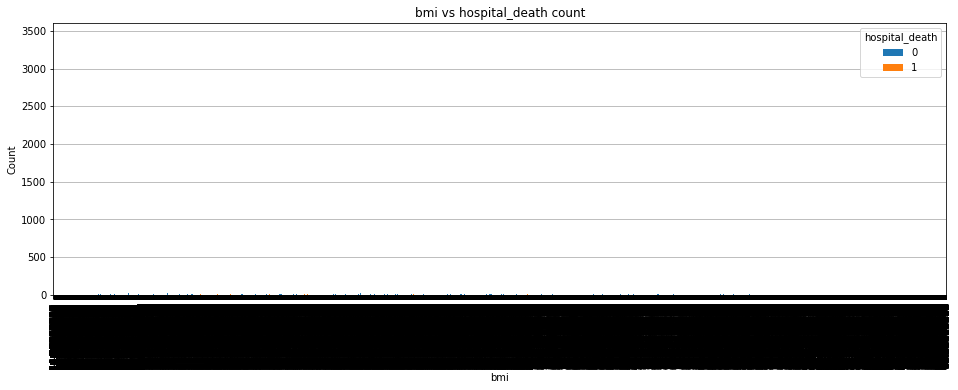

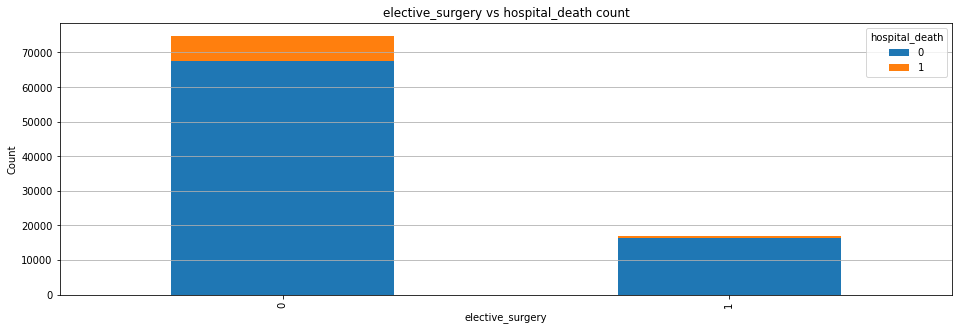

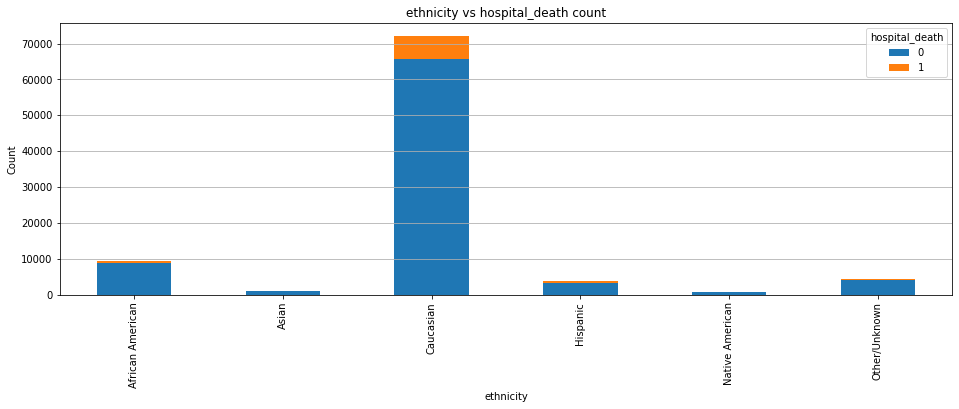

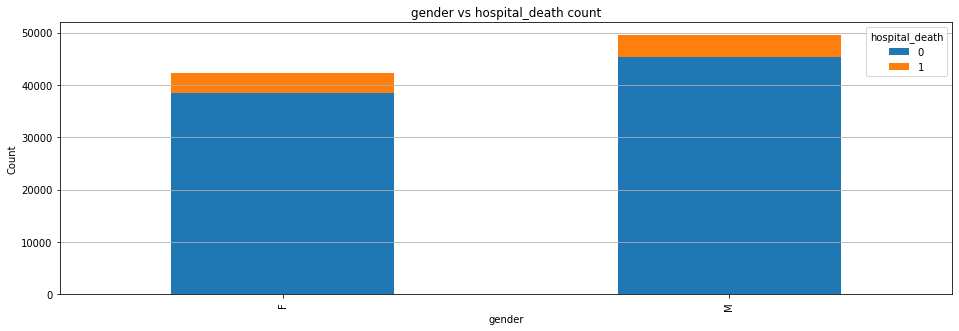

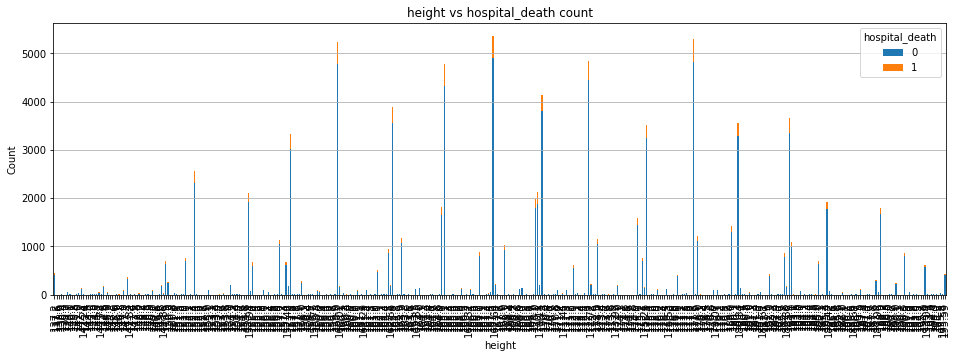

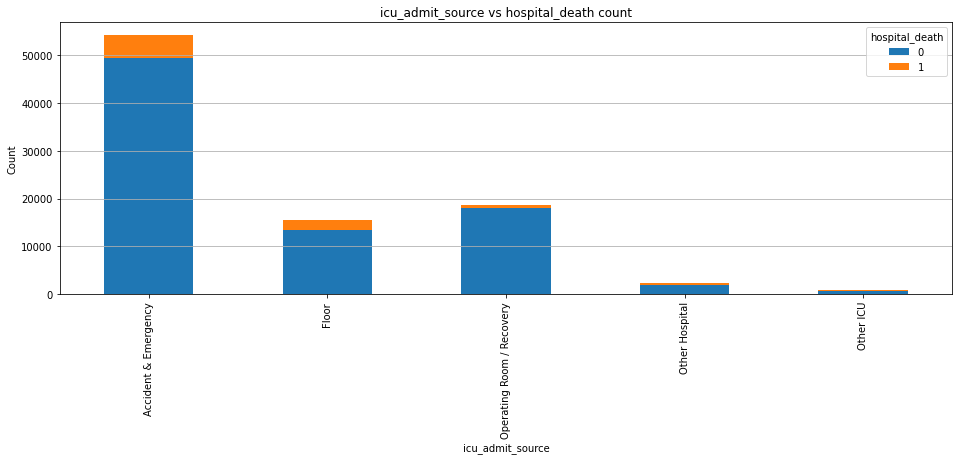

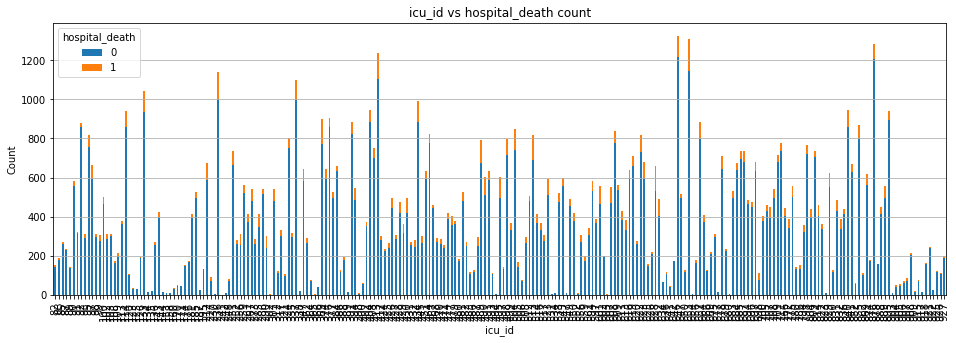

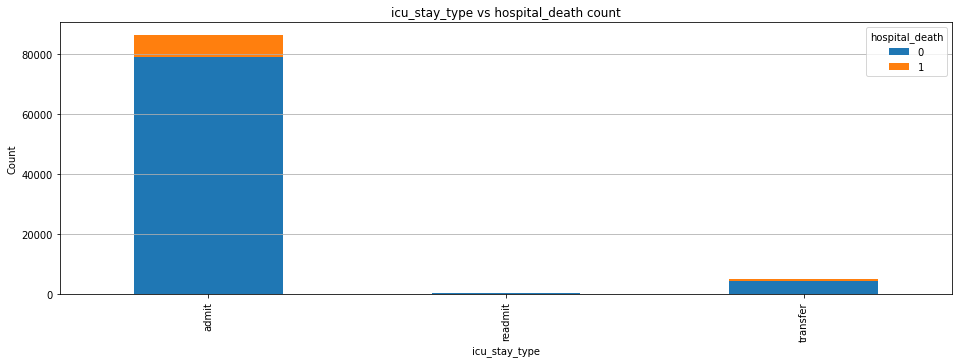

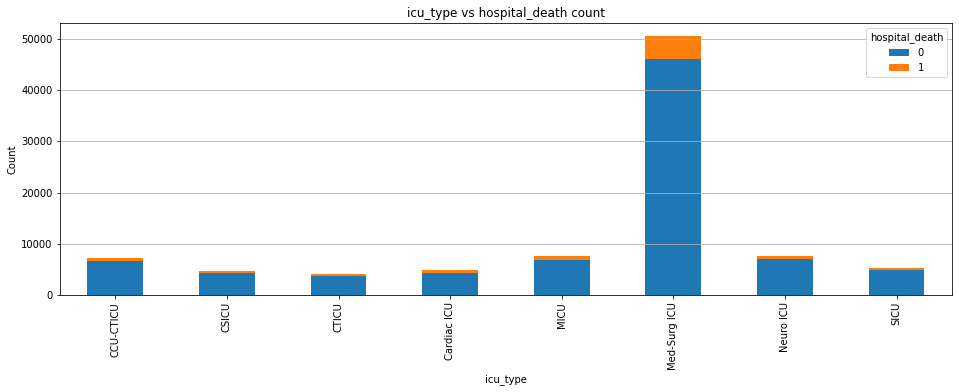

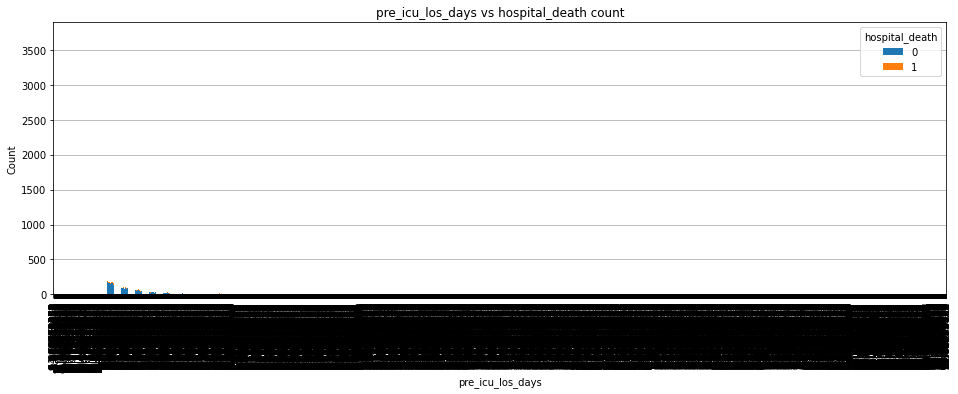

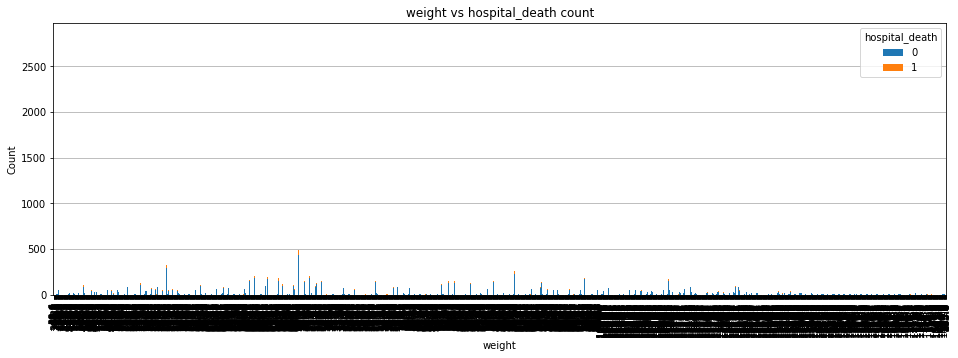

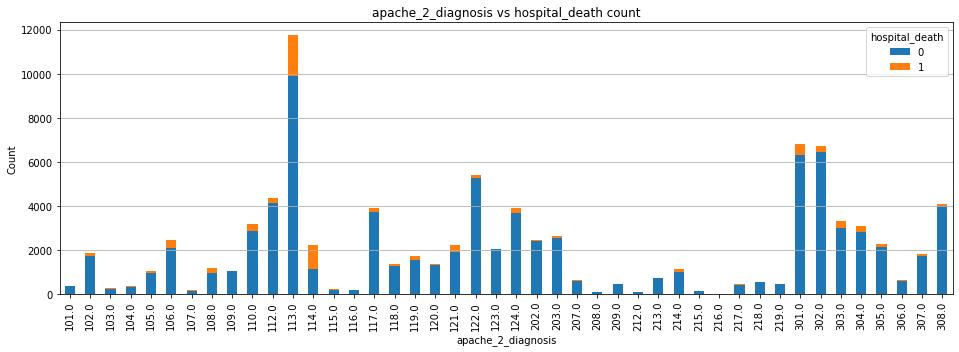

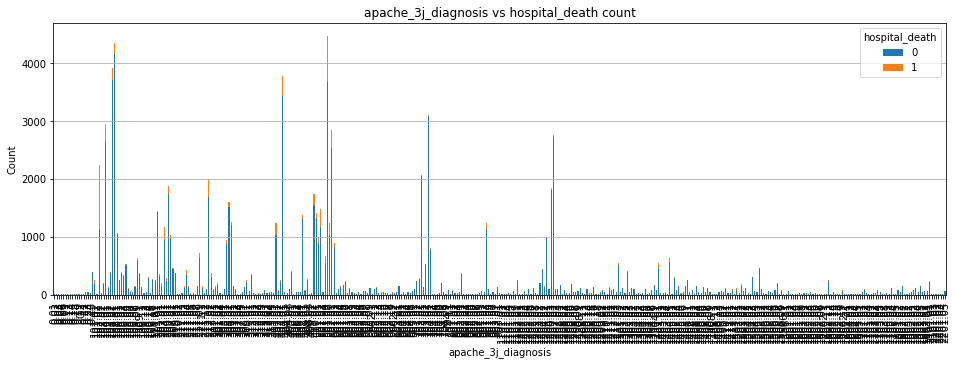

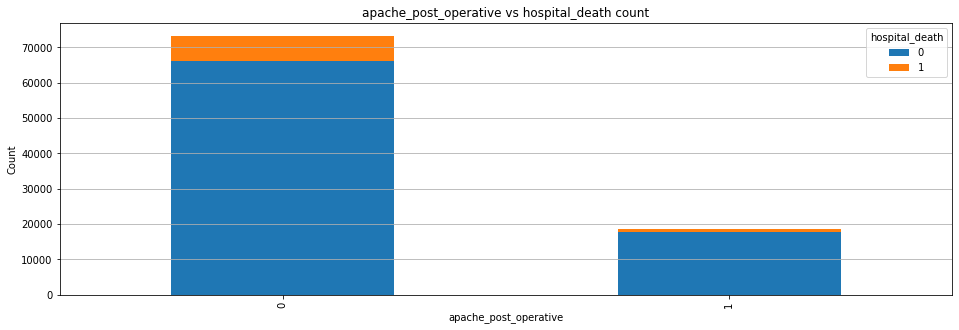

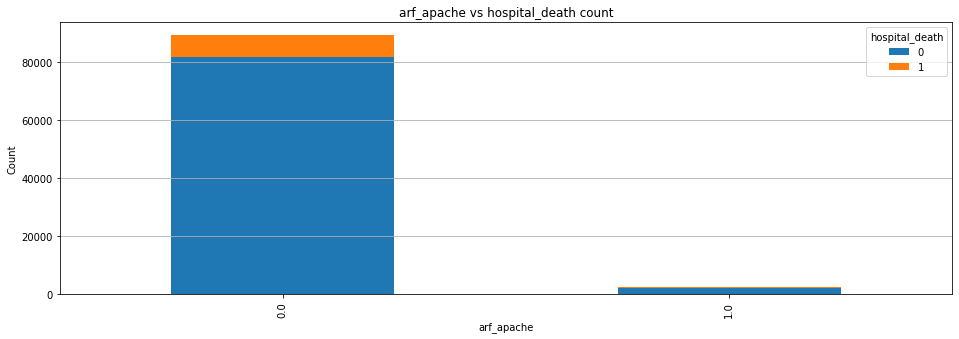

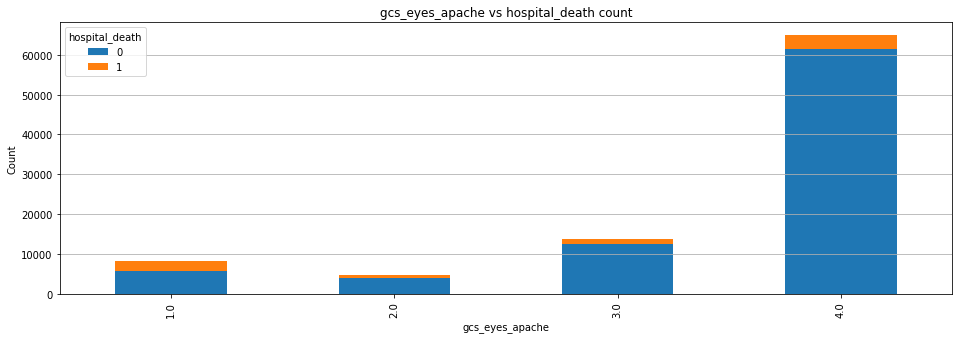

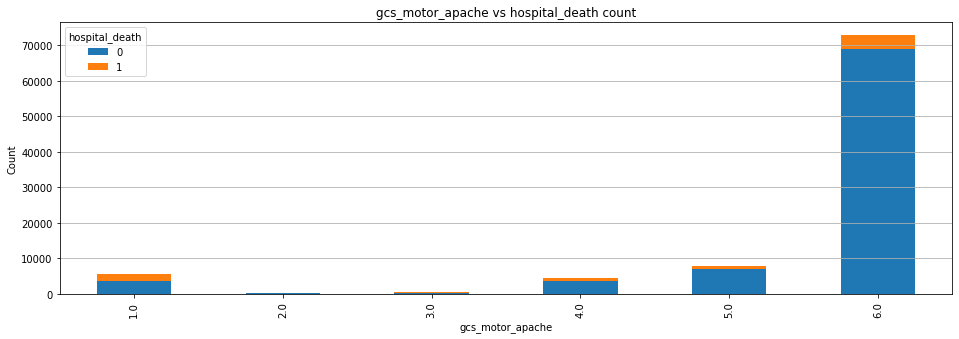

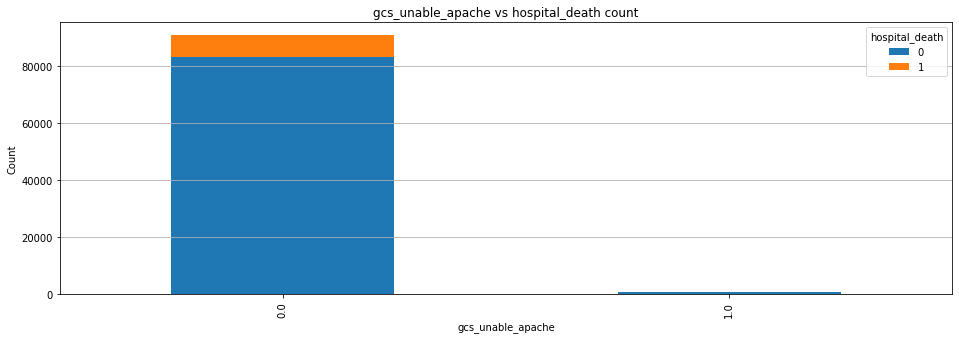

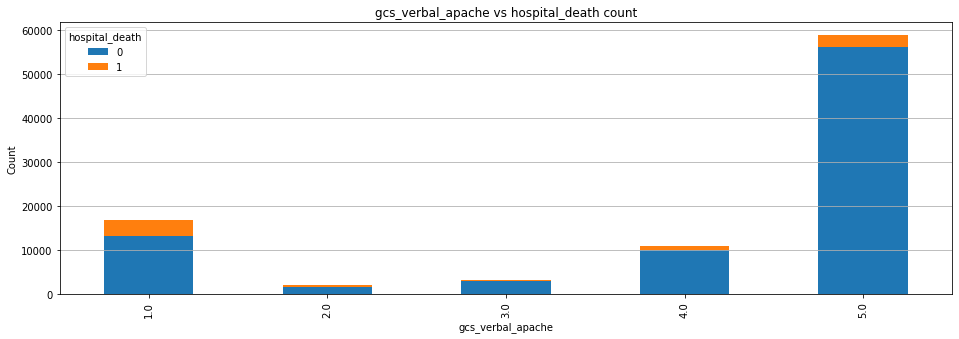

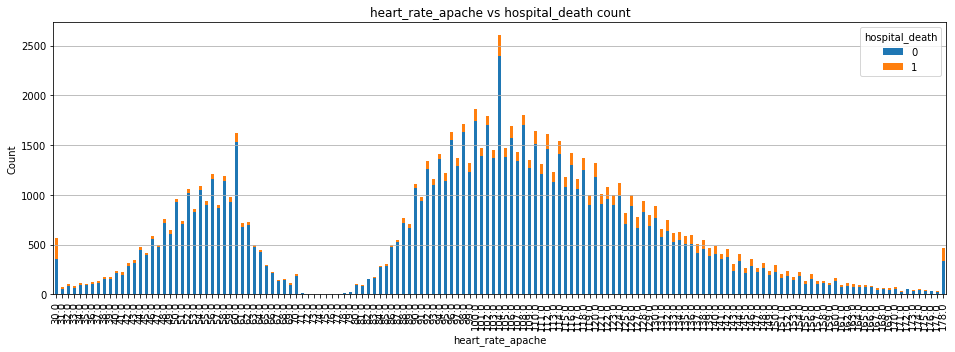

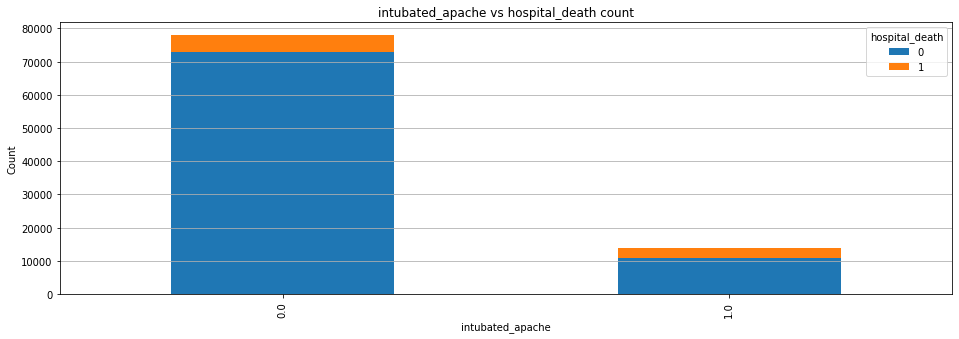

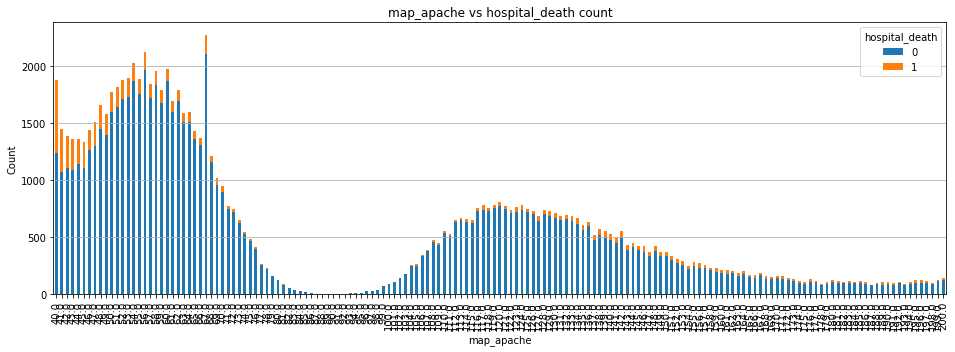

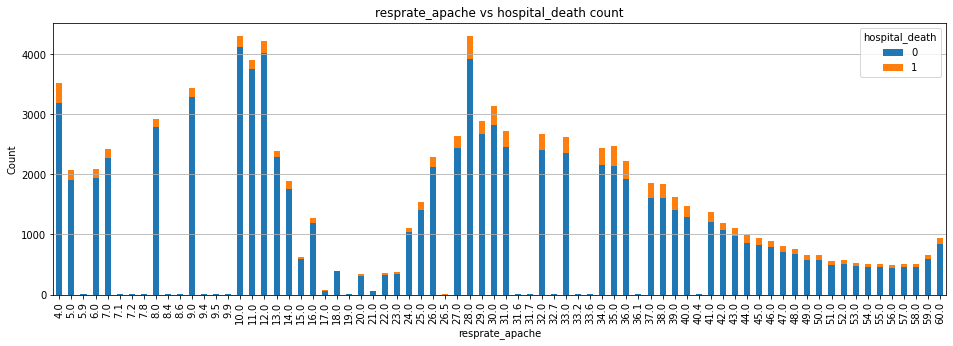

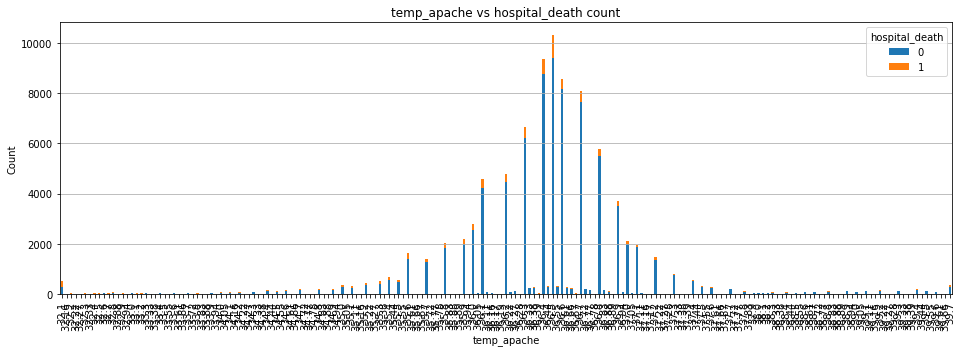

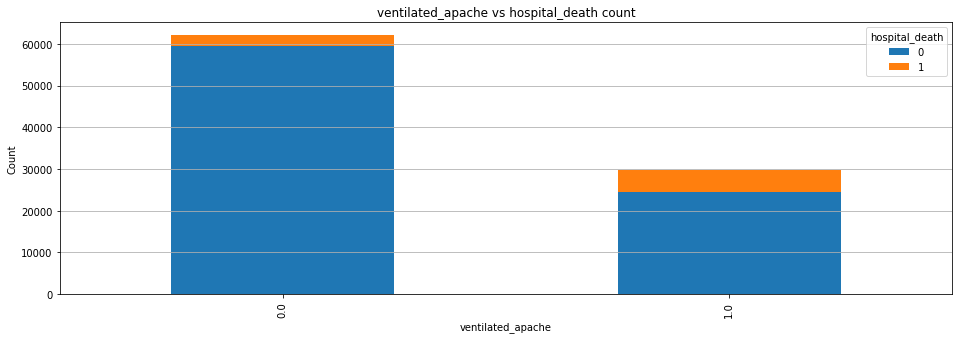

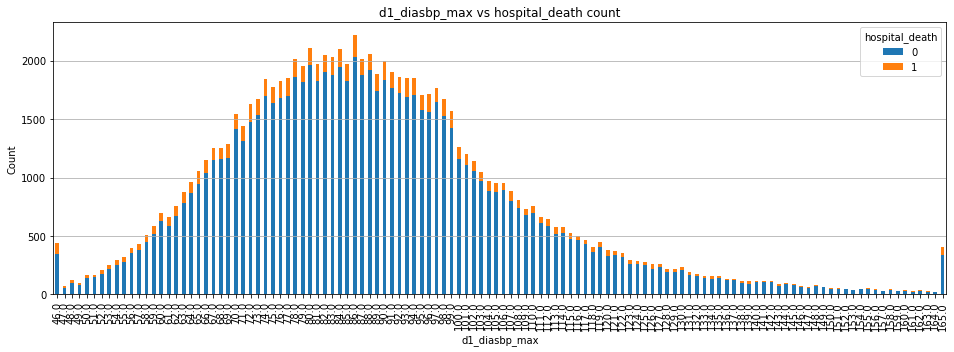

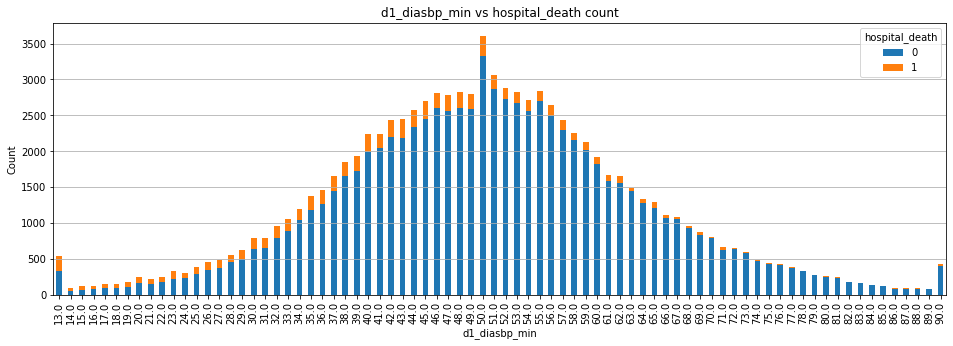

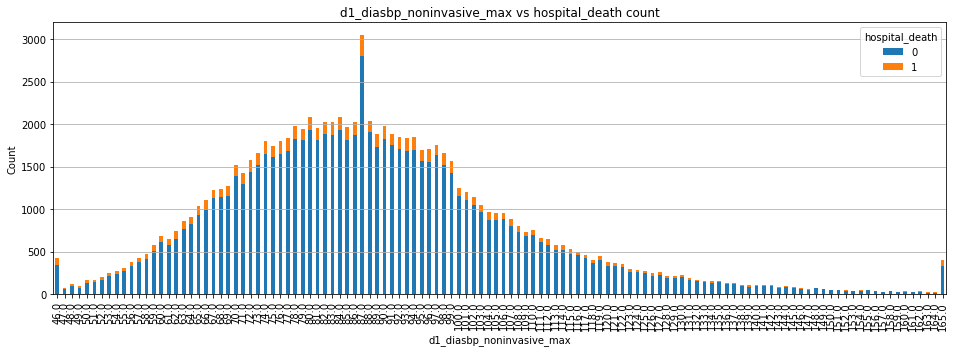

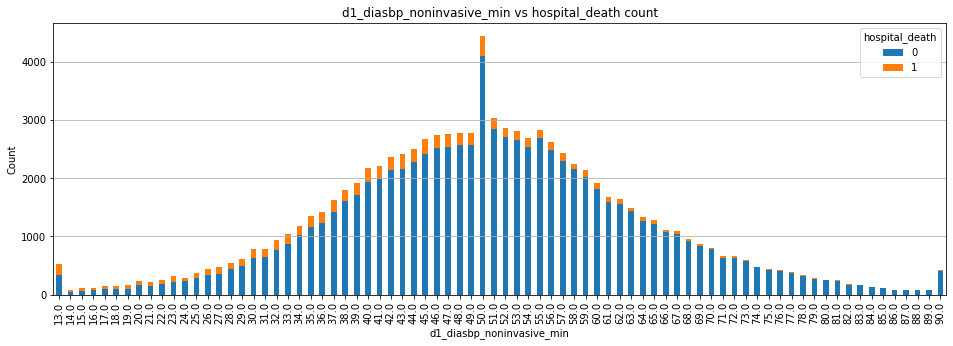

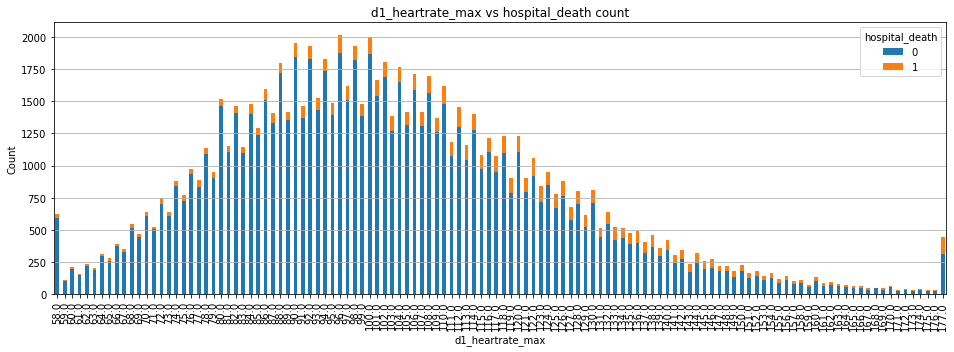

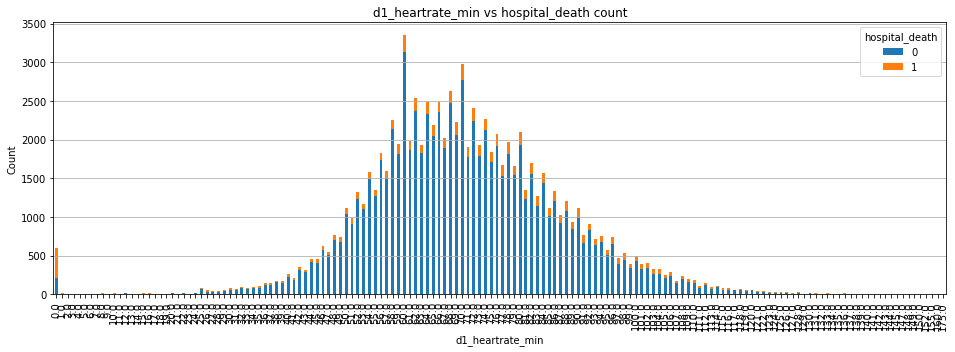

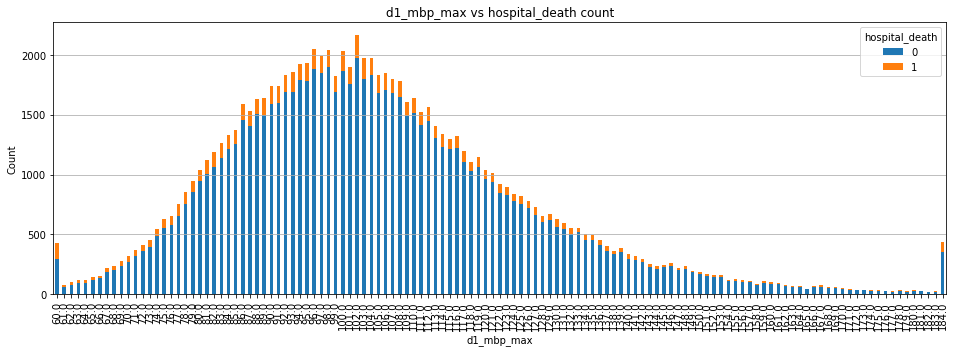

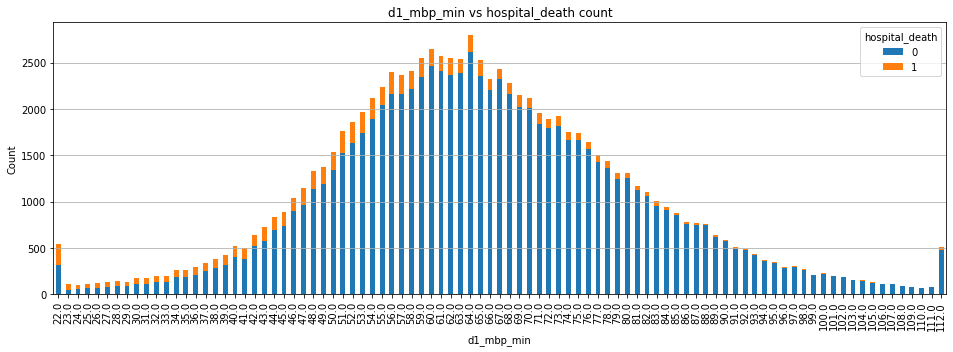

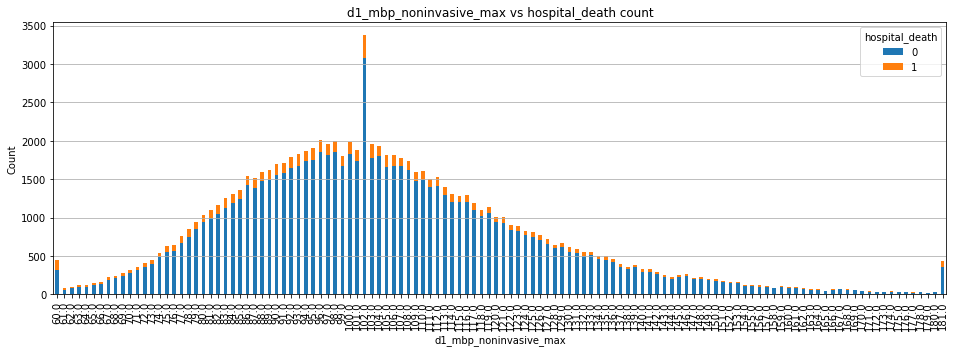

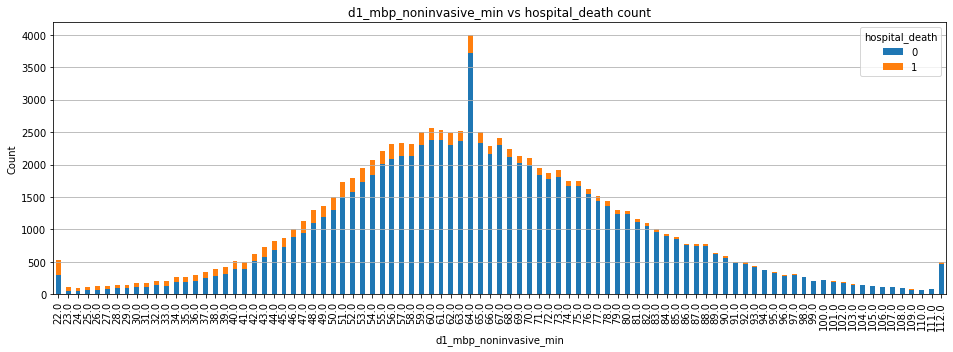

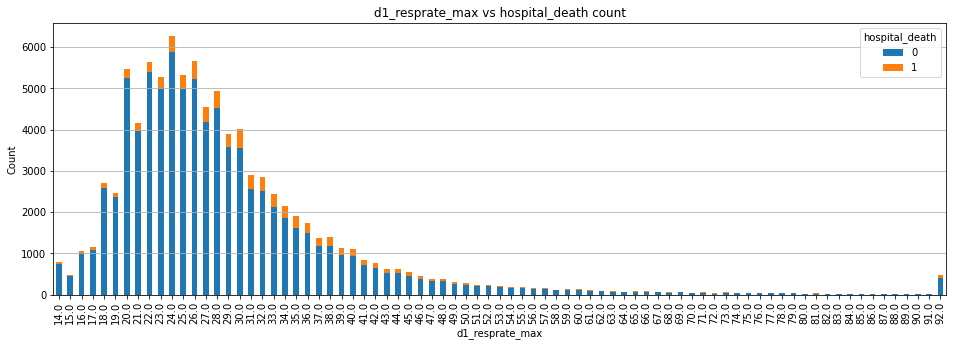

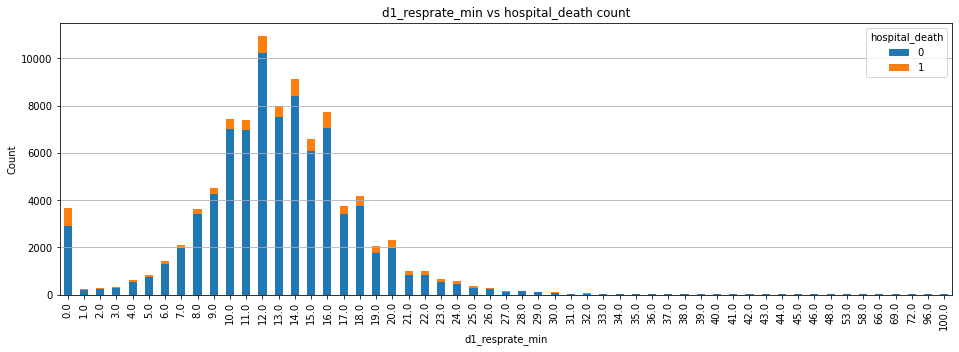

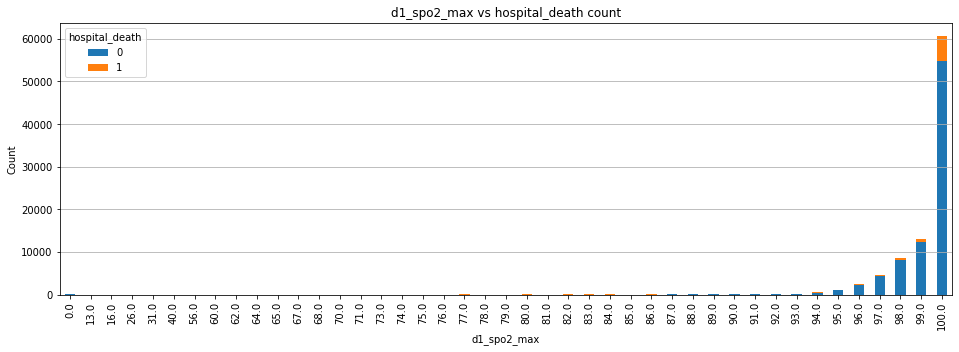

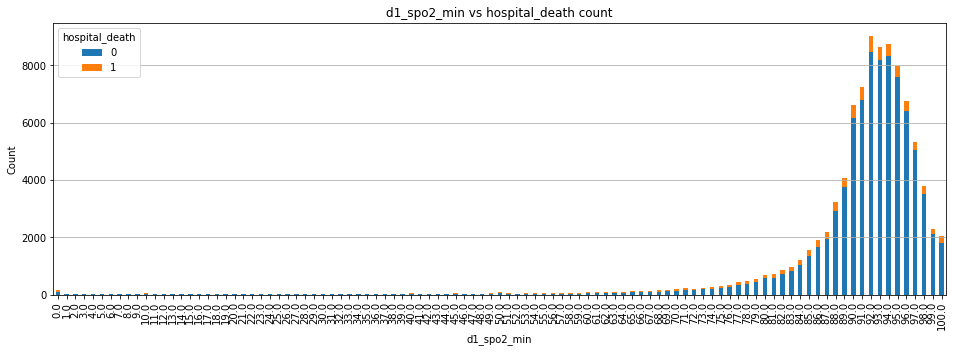

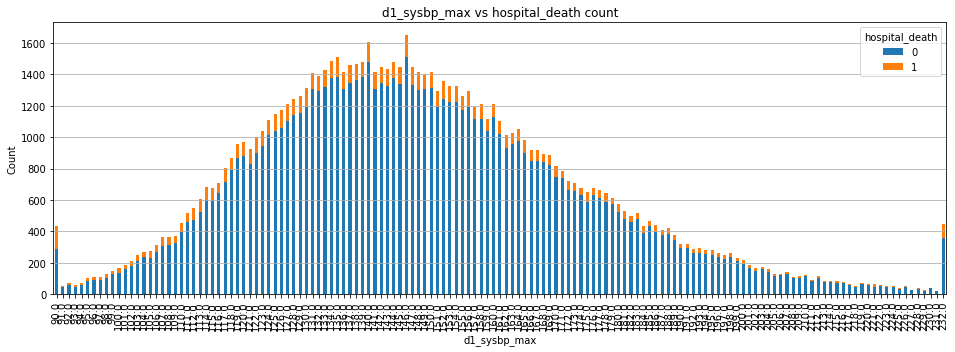

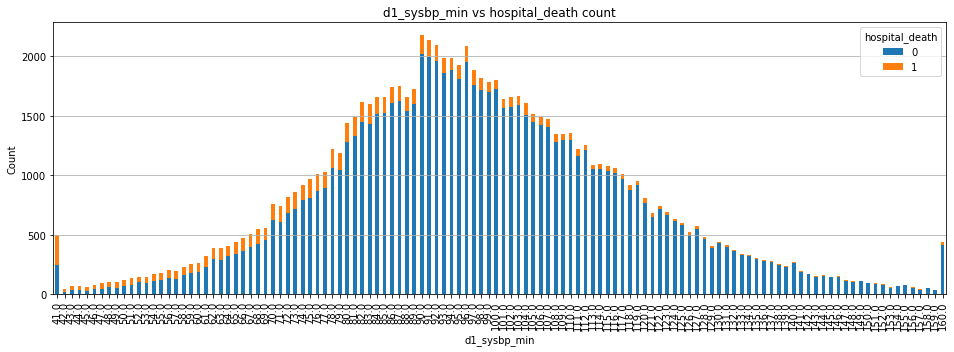

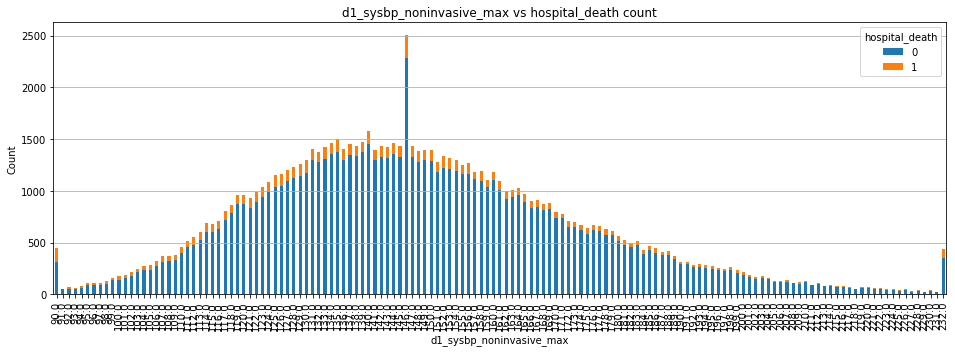

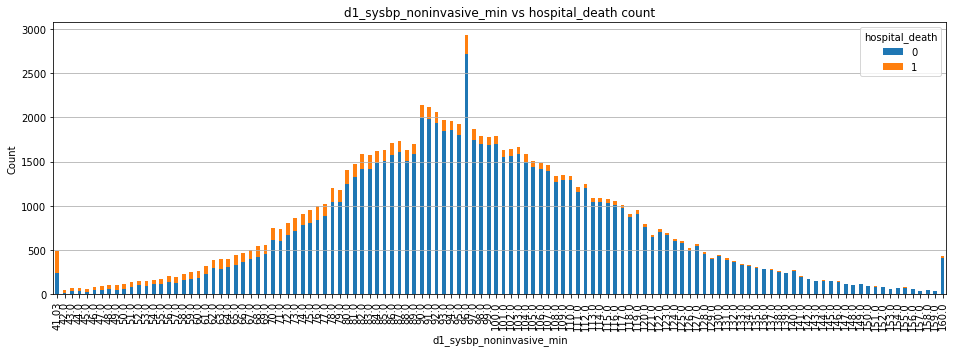

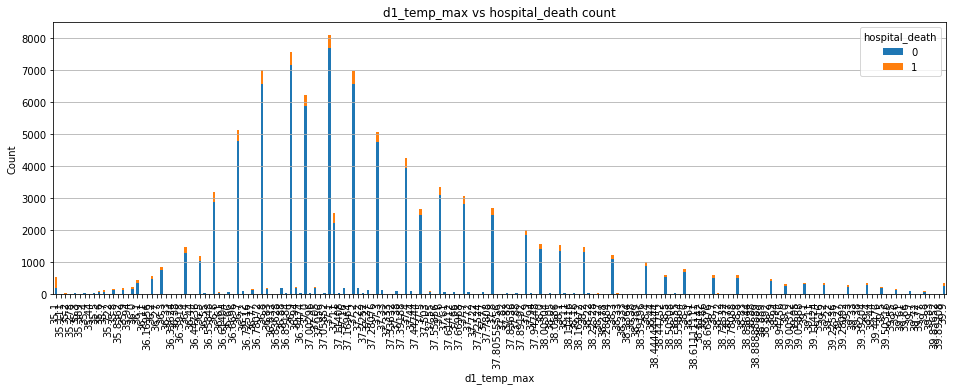

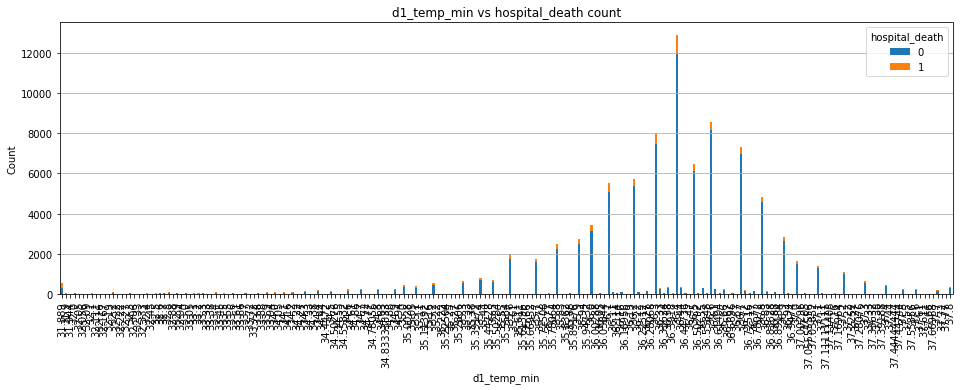

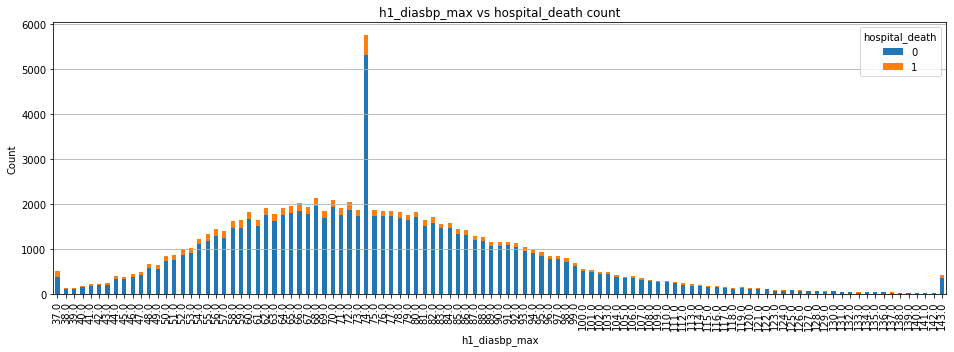

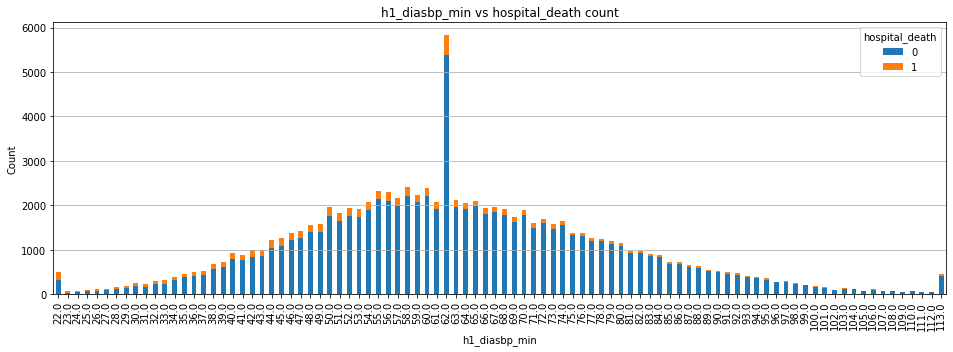

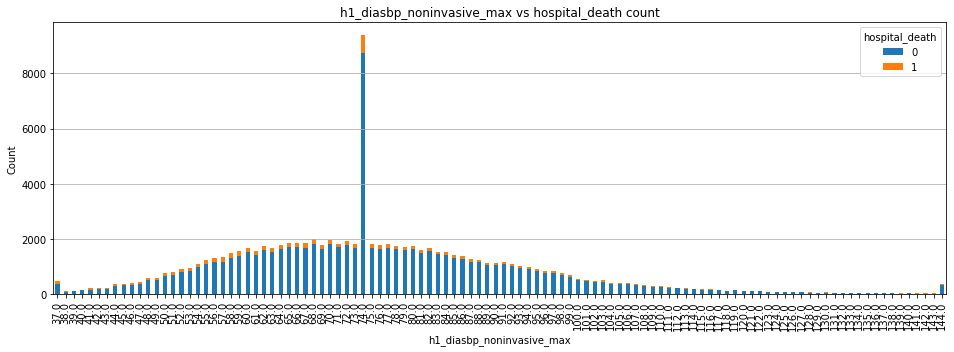

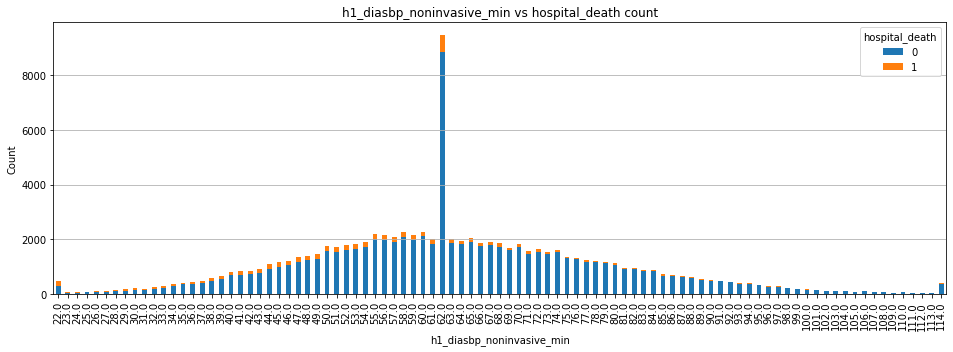

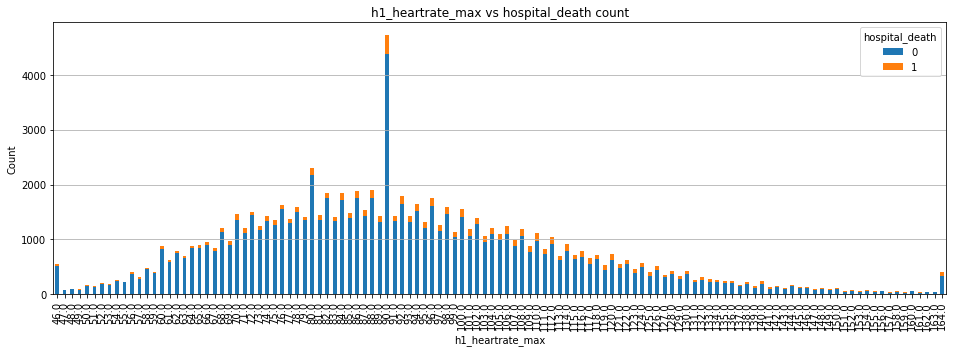

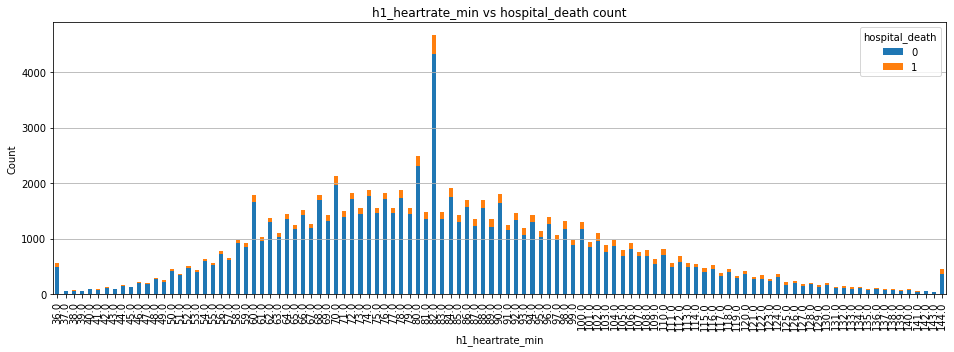

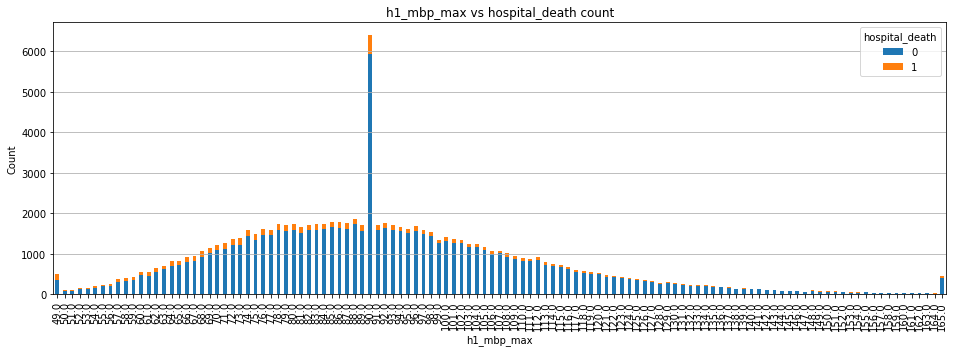

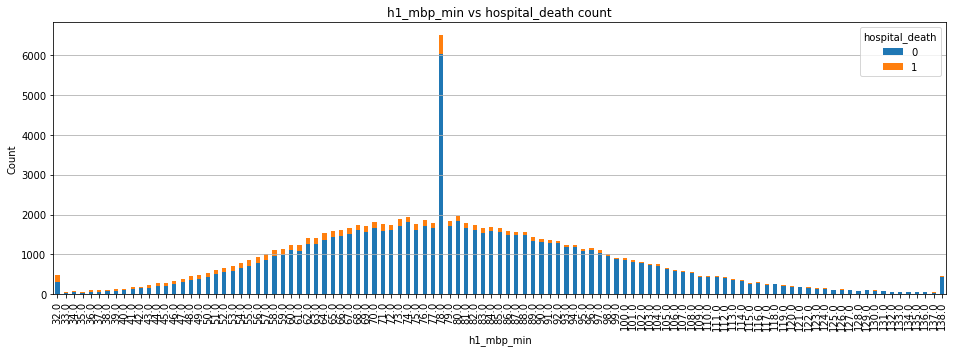

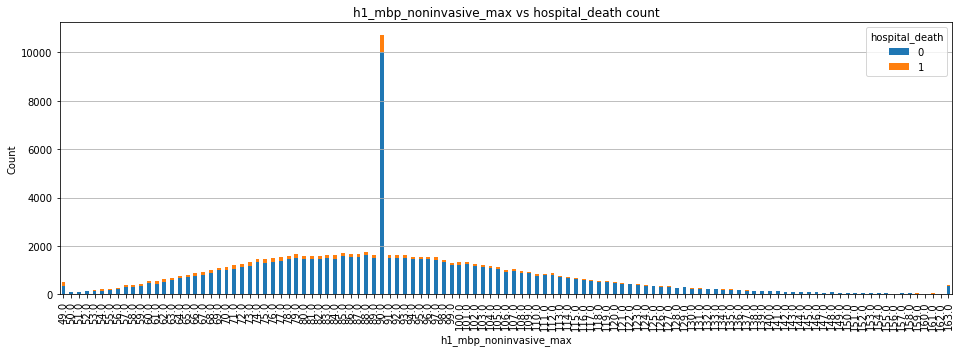

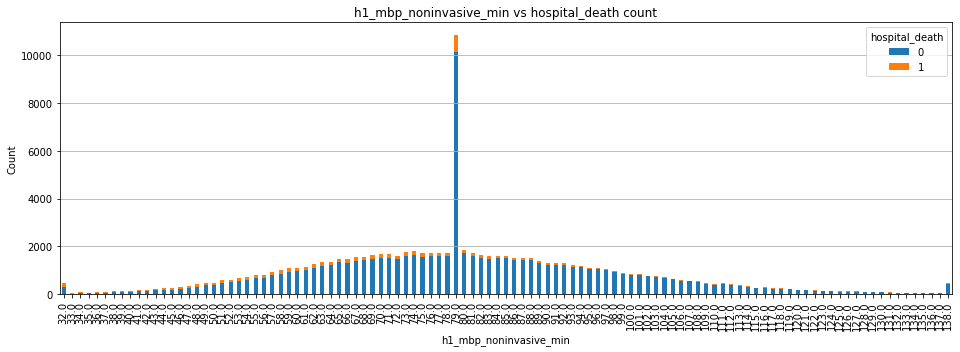

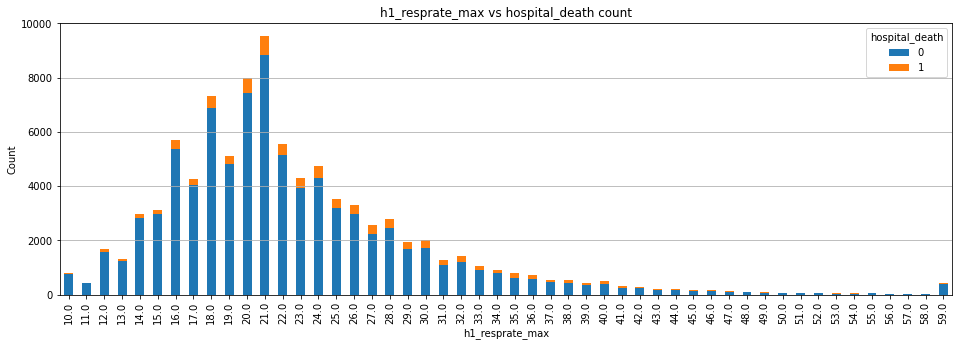

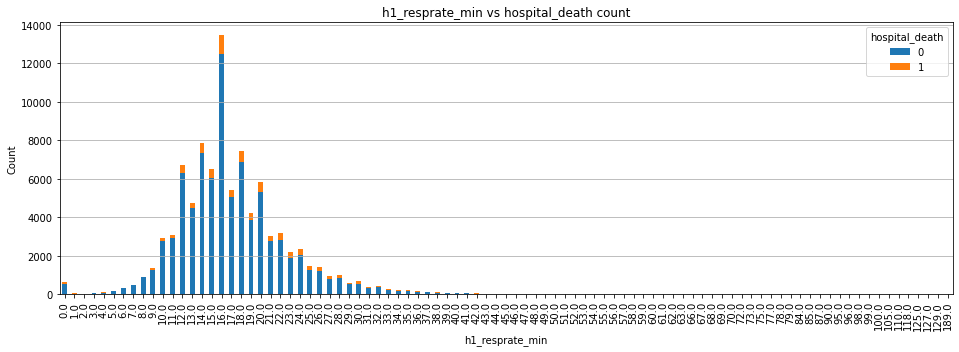

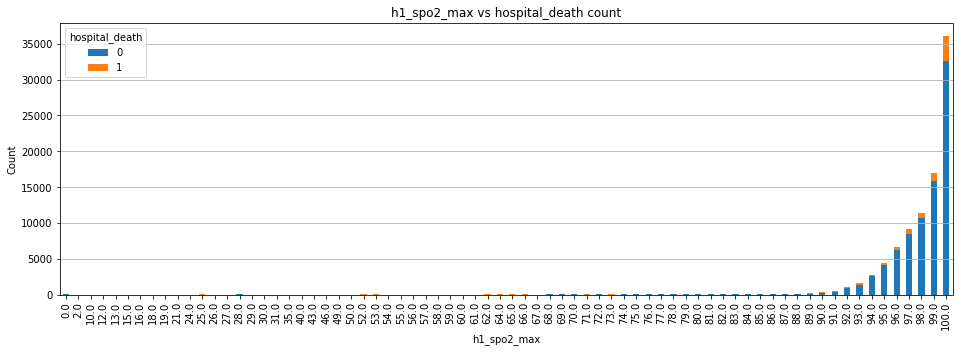

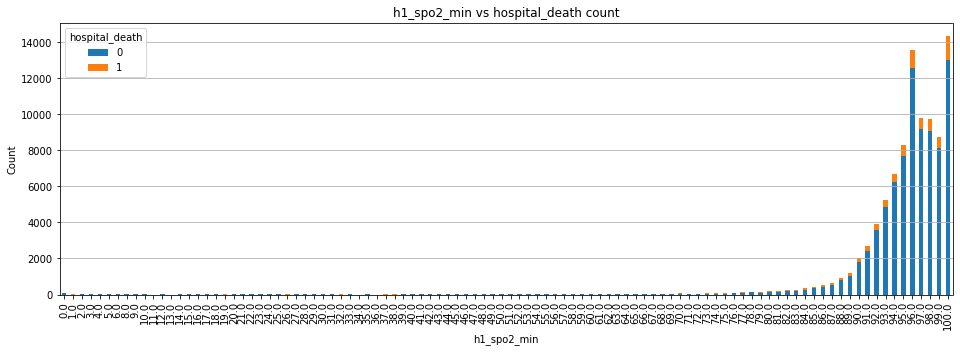

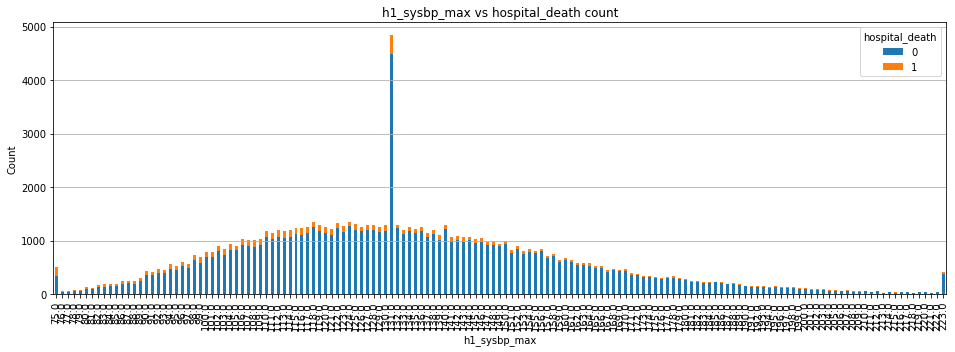

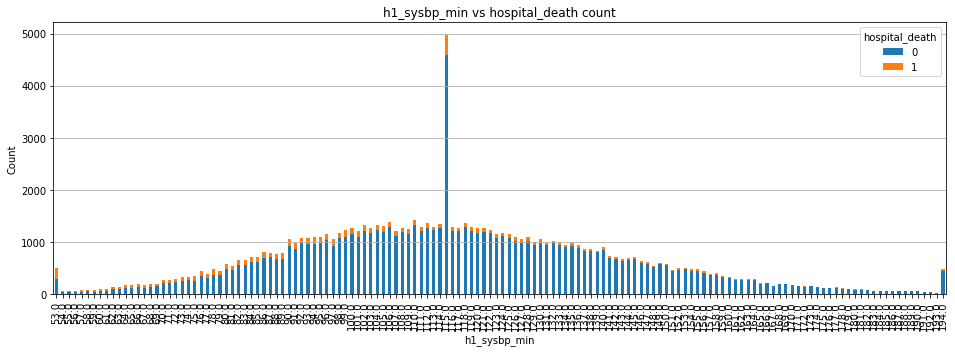

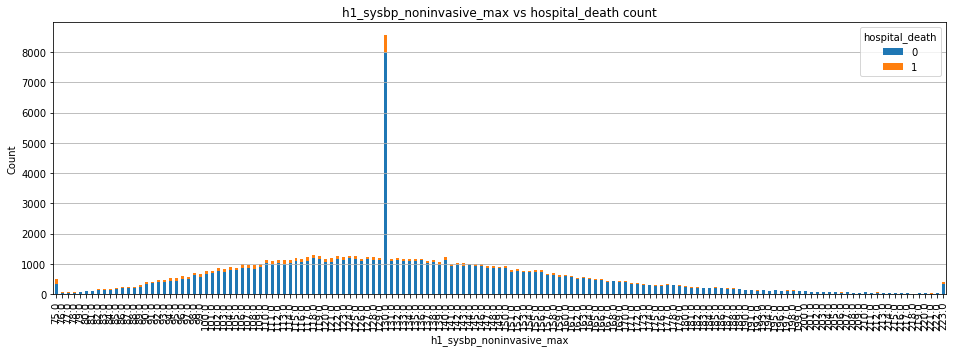

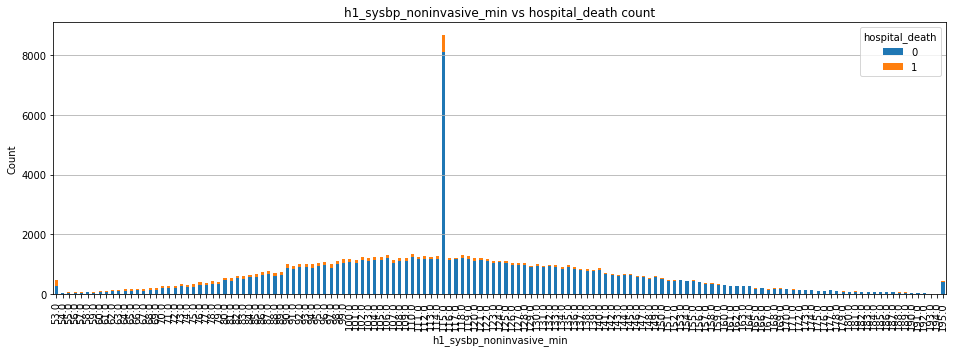

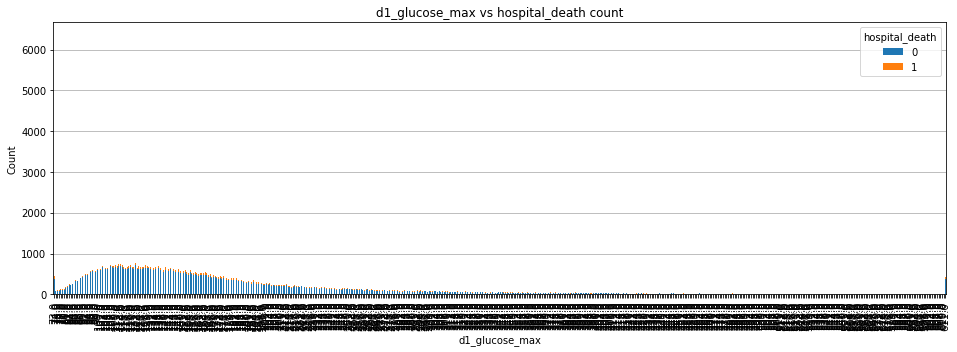

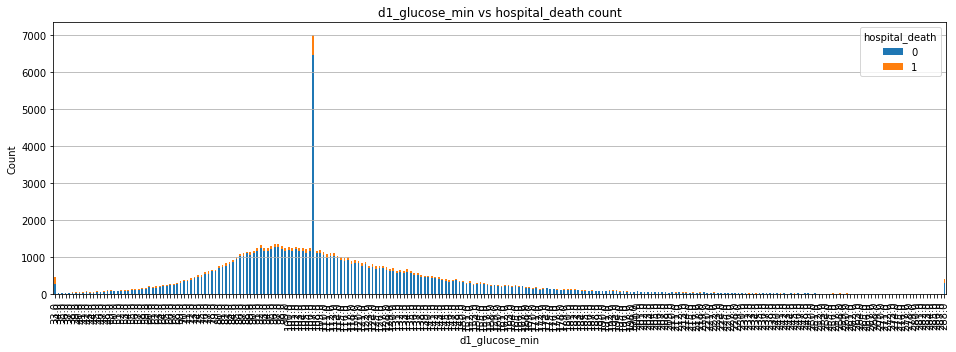

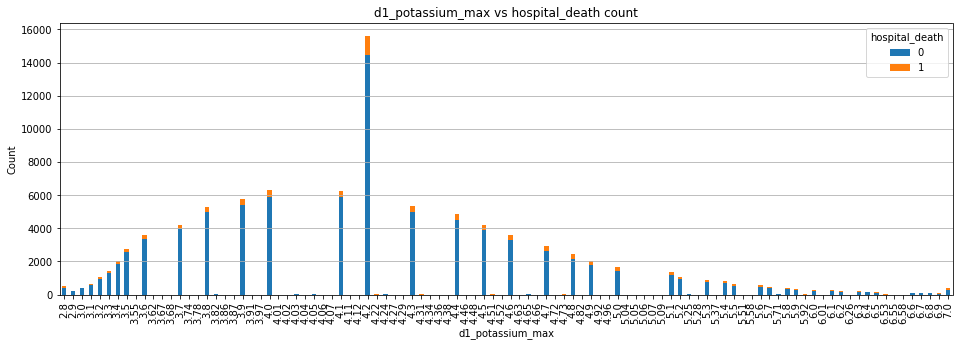

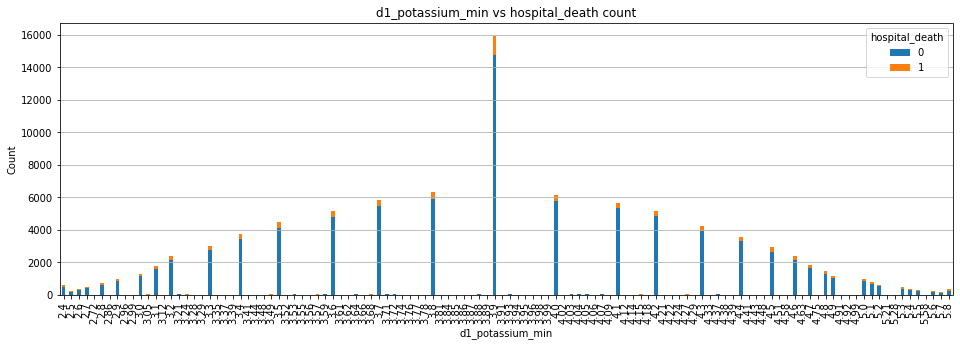

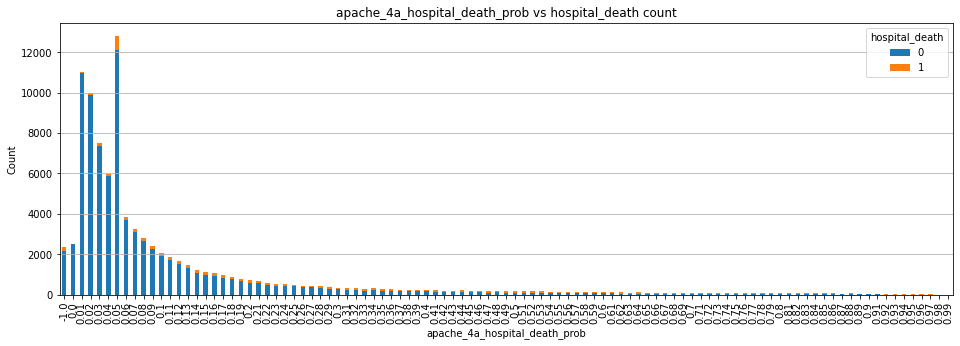

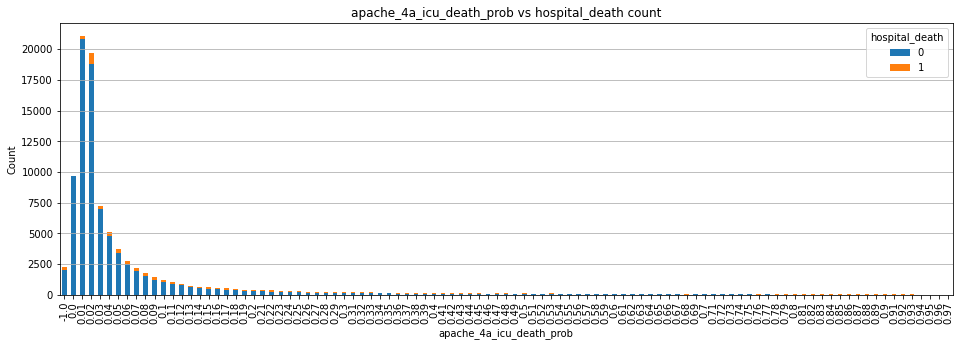

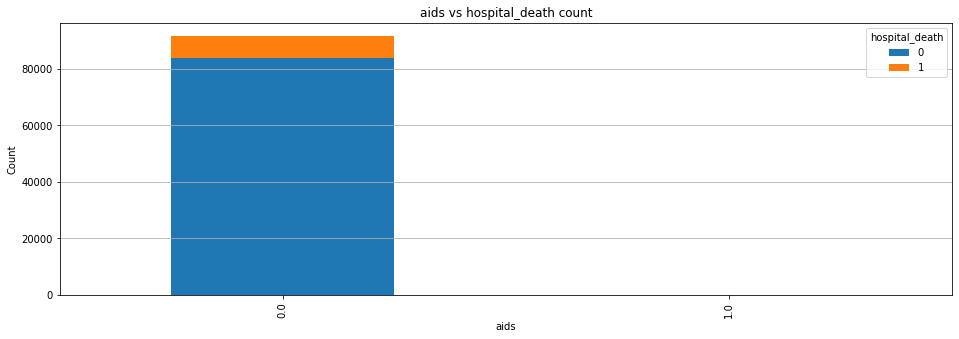

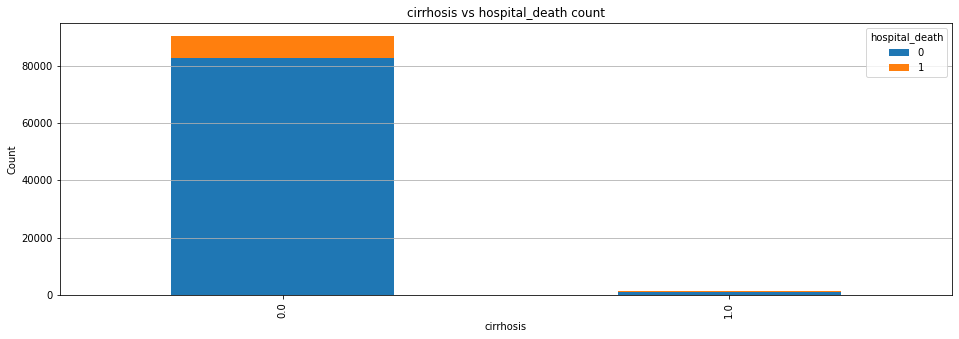

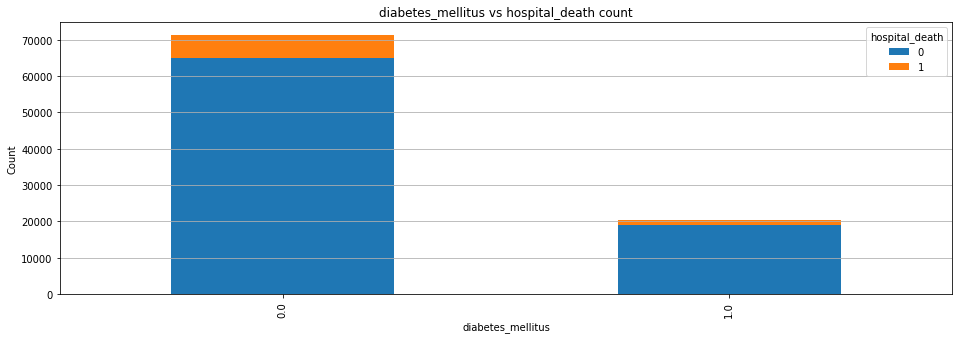

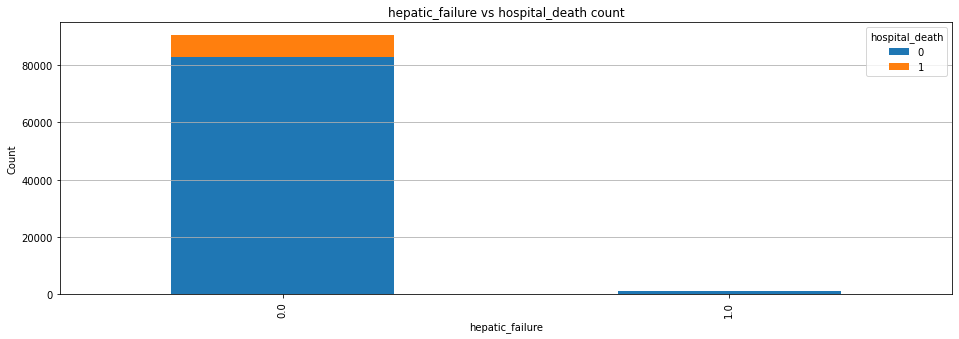

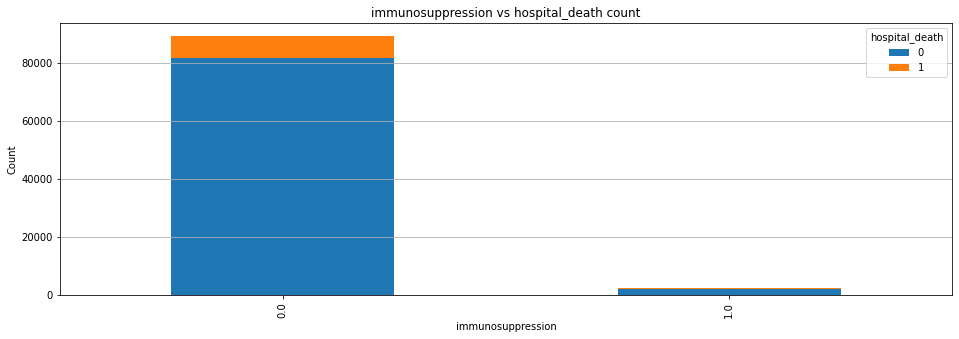

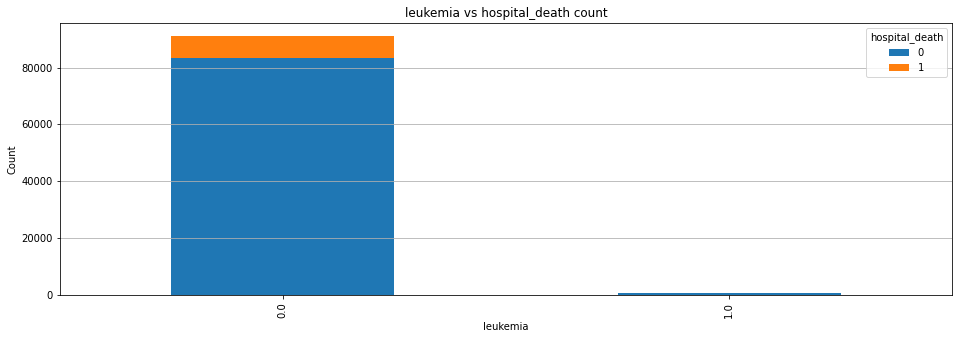

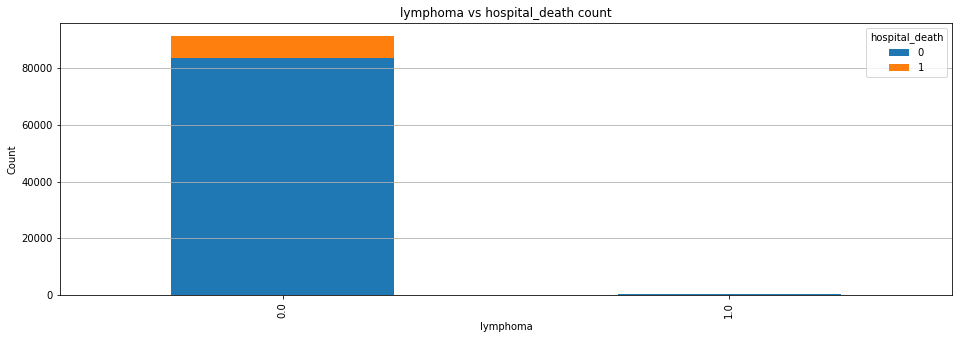

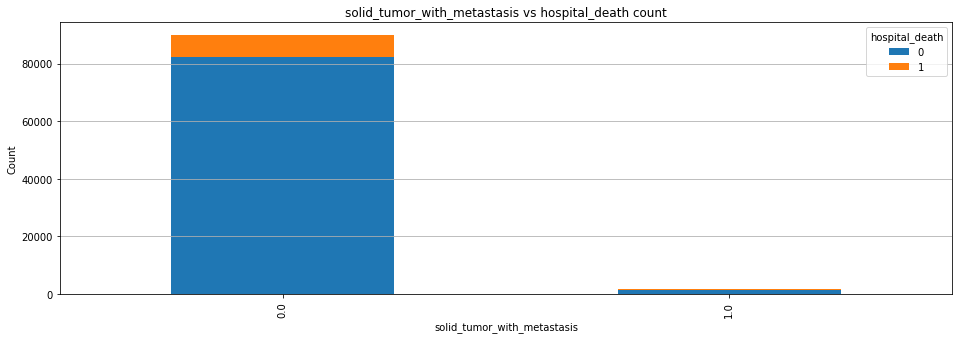

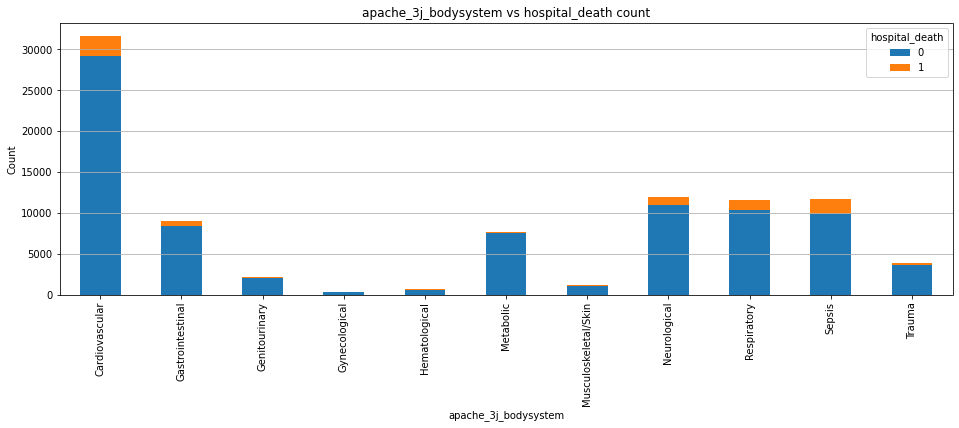

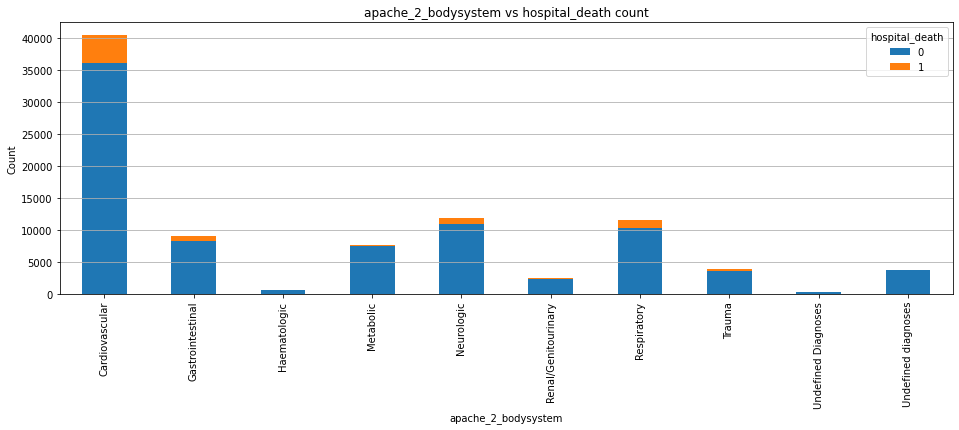

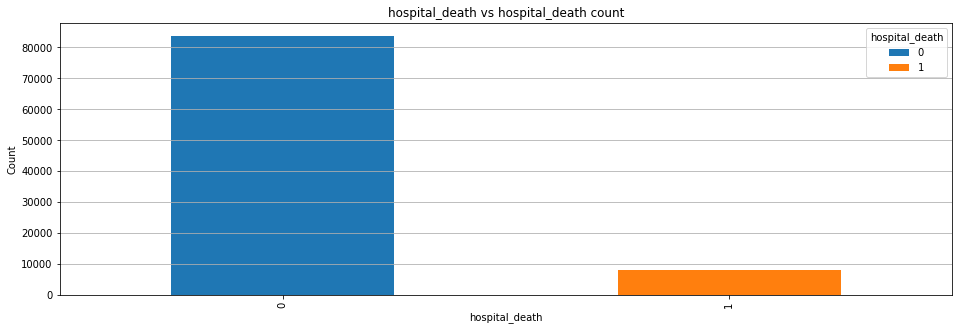

In [32]:
# Relationship count
def plotOccurence(data,colname,label):
    plot=pd.crosstab(index=data[colname],columns=data[label]).plot(kind='bar',stacked=True,figsize=(16,5))
    plt.xlabel(colname)
    plt.ylabel('Count')
    plt.grid(axis='y',linestyle='-')
    plt.title(colname+" vs "+label+" count")

for label in df.columns:
    plotOccurence(df,label,'hospital_death')
    #plotProportion(df,label,'hospital_death')